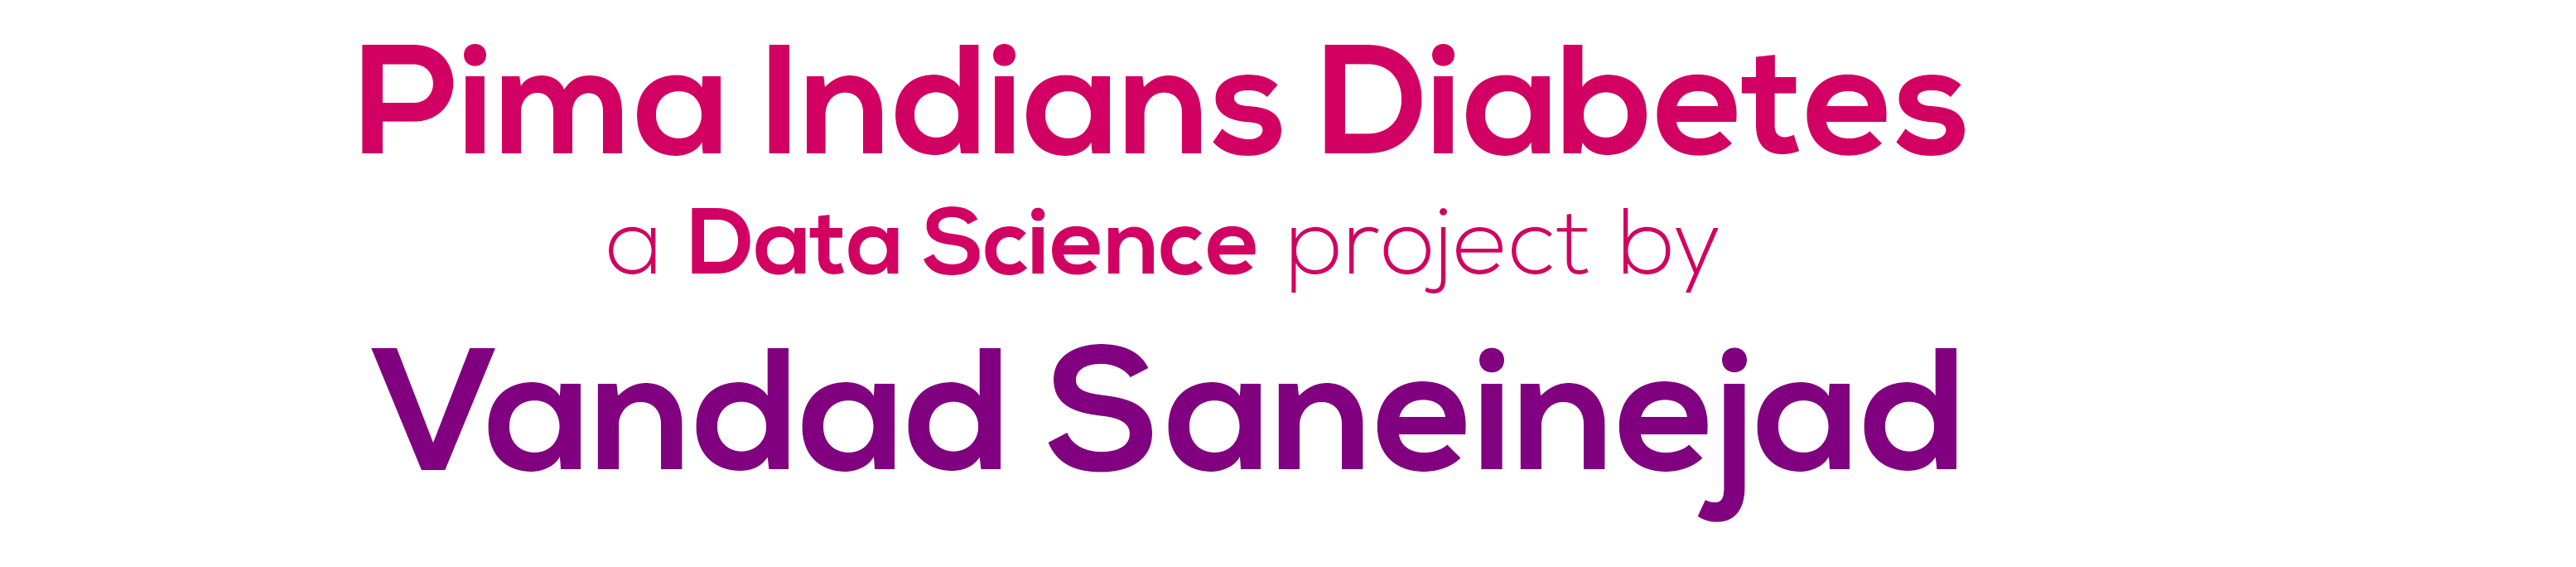

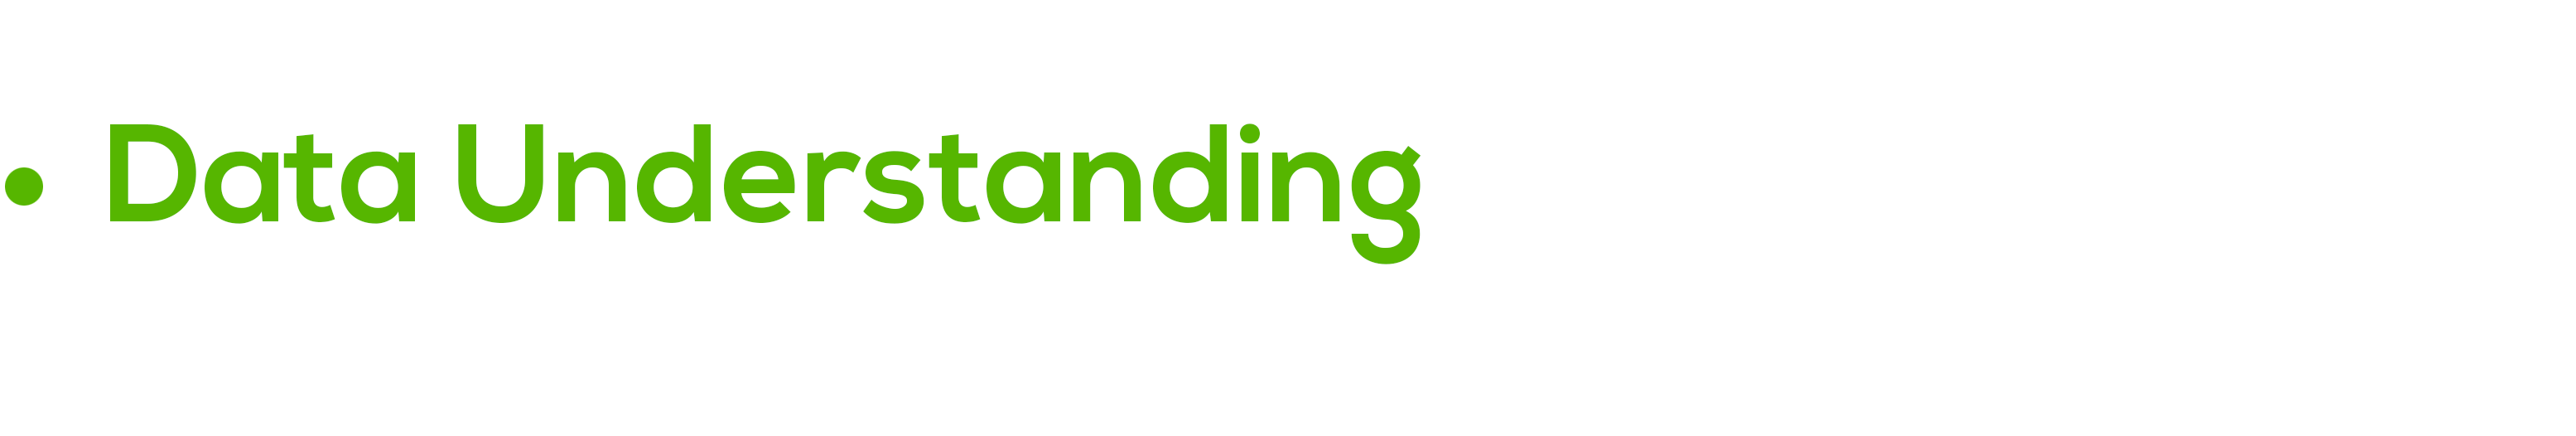

In order to study about the effects of unknown diseases on ethnicities at that point of time, case study of ***`Pima Indians and Diabetes`*** rises to the top of this list. **Pima Indians, also known as the River People, lived around the Gila and Salt Rivers of Arizona**. Agriculture was their strength and they consumed a diet filled with wheat, corn, beans, pumpkins, etc that was rich in fibers and vitamins. They also worked as cavalry scouts for Spanish and the US government. This generous and hard-working tribe has been heavily affected due to the irrigation systems built by the US government away from the Pima tribe. This led to a 40 year famine that broke down the Pima paradigms. **Diabetes is greatly affected by diet, exercise and genetics.** Due to this rough and enduring period, Pima community received a massive hit on it's diet and exercise as farming had been affected by the famines thus having an effect on the traditionaly rich diet. This dataset presents the opportunity to study the historical cause - effect on the Pima females and back it with numerical data.

### Context
This dataset is originally from the *National Institute of Diabetes and Digestive and Kidney Diseases*. The objective of the dataset is to diagnostically **predict whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and **one target variable, `Outcome`**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.<br></br>
<ul>
    <b>Aim</b> :
    To <u>classify / predict</u> whether a patient is prone to diabetes depending on multiple features.<br></br>
    It is a <b>binary classification</b> with multiple numerical features.
    </ul>
<br></br>

## Dataset Attributes :
<br></br>
<ul>
<b>Pregnancis :</b> Number of times pregnant <br></br>
<b>Glucose :</b> Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br></br>
<b>BloodPressure :</b> Diastolic blood pressure (mm Hg) <br></br>
<b>SkinThickness :</b> Triceps skin fold thickness (mm) <br></br>
<b>Insulin :</b> 2-Hour serum insulin (mu U/ml) <br></br>
<b>BMI :</b> Body mass index (weight in kg/(height in m)^2) <br></br> 
<b>DiabetesPedigreeFunction :</b> Diabetes pedigree function <br></br>
<b>Age :</b> Age (years) <br></br>
<b>Outcome :</b> Class variable (0 or 1) 268 of 768 are 1, the others are 0
    </ul>

#### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from itertools import product
from scipy import stats

In [2]:
diabetes = pd.read_csv(r"D:\Data Science\DataSet\Pima Indians Diabetes Database\diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* there are *no categorical features* in this dataset. all features have numerical values.
* it seems there are no missing values in this dataset (at least not in a conventional way)

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


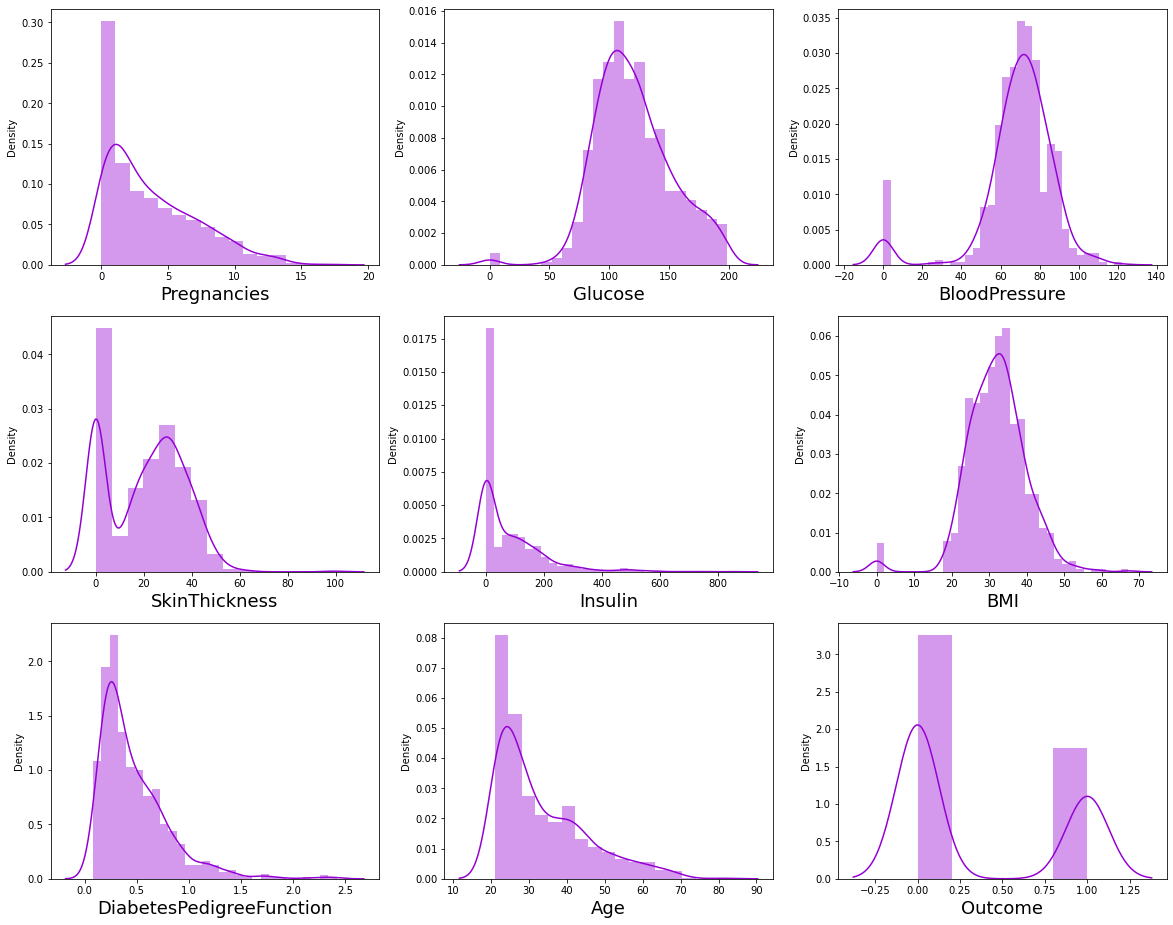

In [5]:
fig, ax = plt.subplots( 3, 3 , figsize=(20,16) )
ax_idx = list(product( [0,1,2], [0,1,2] ))

for i, col in enumerate(diabetes.columns):
    sns.distplot( diabetes[col], ax=ax[ax_idx[i][0]][ax_idx[i][1]], kde=True, color="darkviolet")
    ax[ax_idx[i][0]][ax_idx[i][1]].set_xlabel(col, fontsize=18)

plt.show()

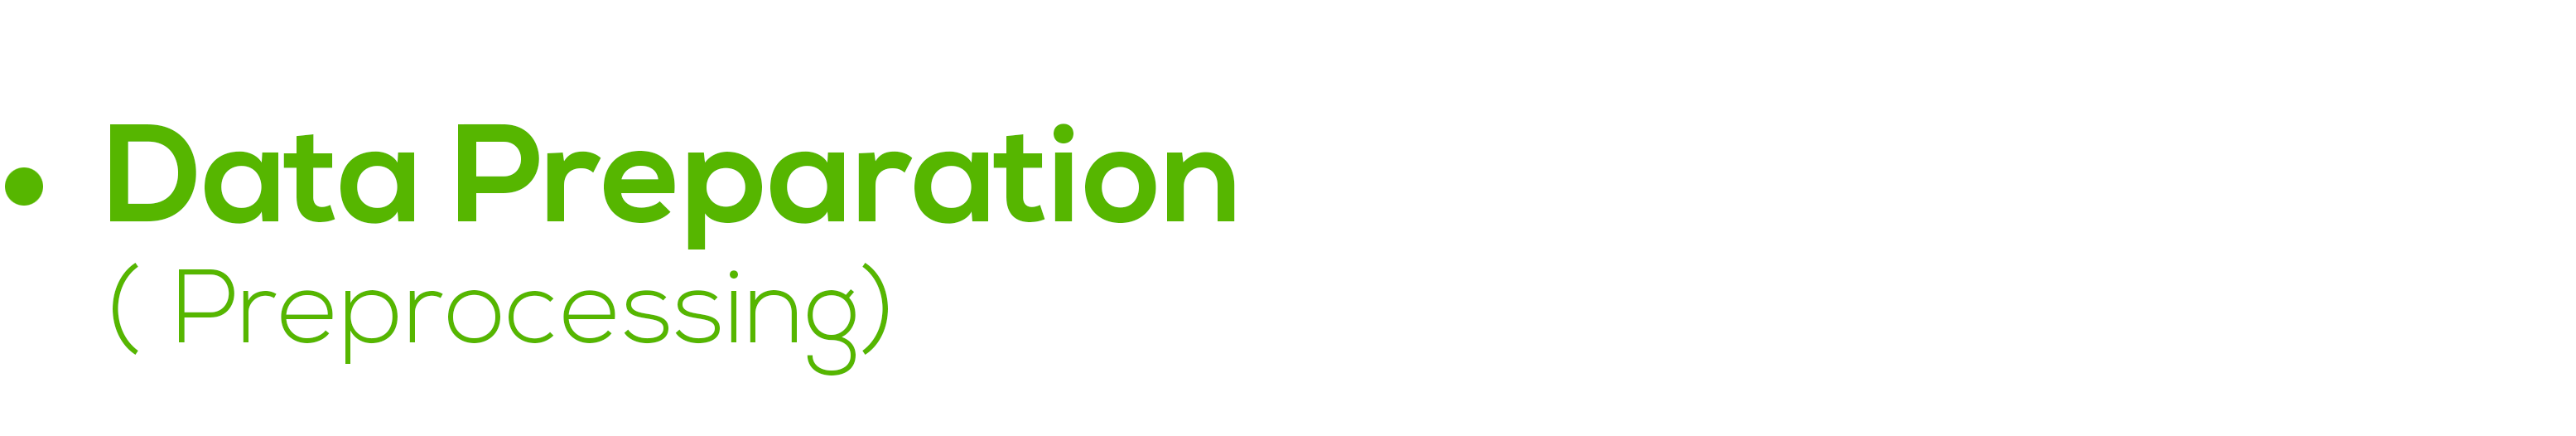

<u><b>we are going to keep 30 random rows as the Test data (not Validation). which means we will not show these 30 row to the machine at any point during the project until the very and this 30 rows will be treated as a completely new data</b></u>

In [6]:
from sklearn.model_selection import train_test_split

Features = diabetes.drop('Outcome', axis=1)
Target = diabetes['Outcome']

X, X_test, y, y_test = train_test_split(Features, Target, stratify=Target, shuffle=True,
                                        test_size=round(30/diabetes.shape[0], 3),random_state=42)

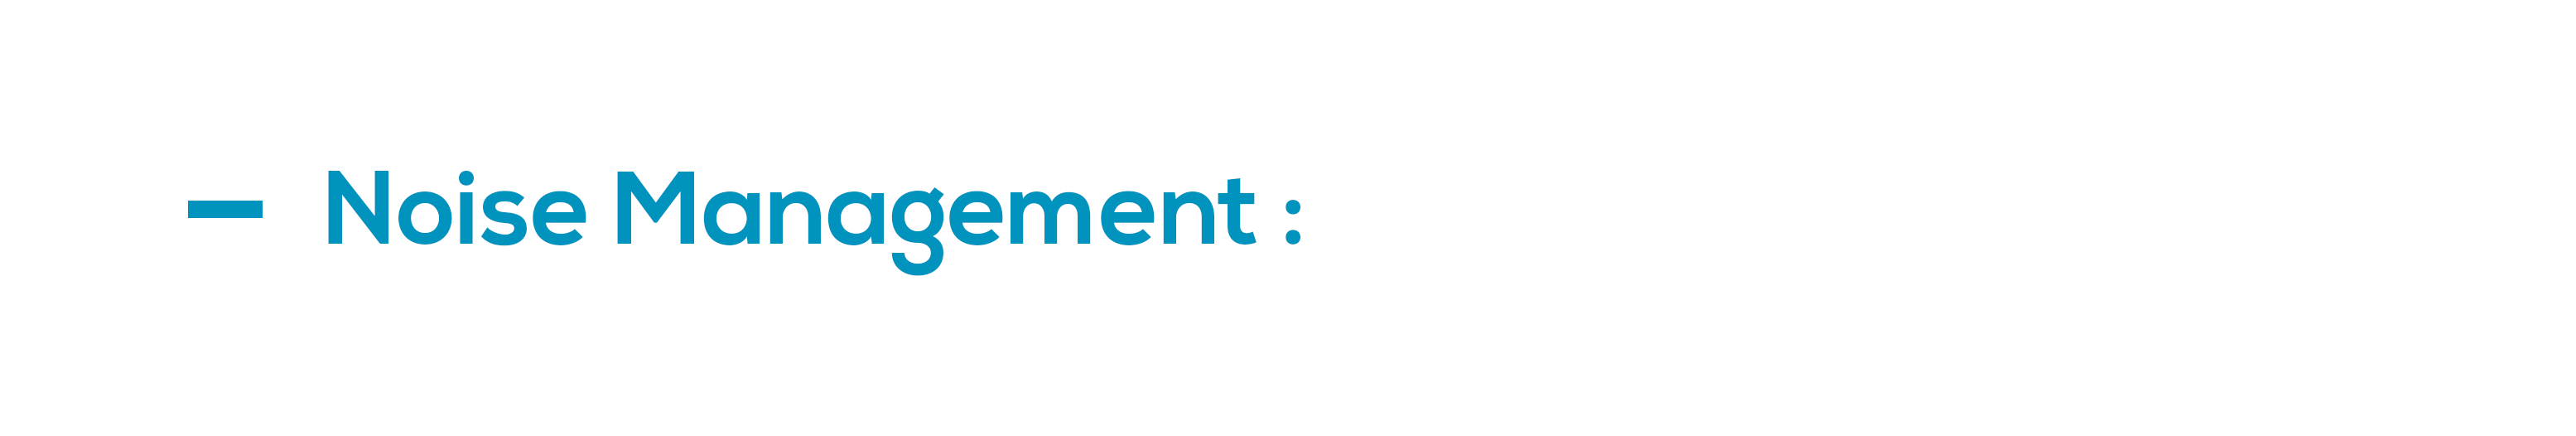

* just by looking at the distribution plots down, it is obvious that in the columns ***BloodPressure and BMI*** **the value "0" is `noise`**. we can assume that in these columns **missing data** have been replaced by the integer "0"

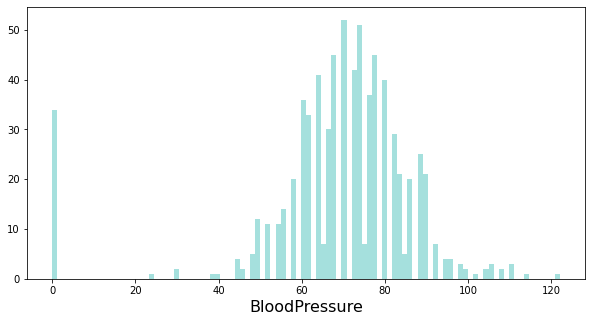

number of rows with 0 as the BloodPressure value:  34

minimum amount of BloodPressure (beside 0):  24


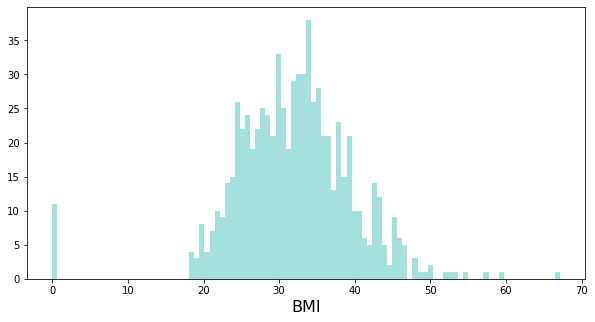

number of rows with 0 as the BMI value:  11

minimum amount of BMI (beside 0):  18.2


In [7]:
for col in ['BloodPressure','BMI']:
    
    plt.figure(figsize=(10,5))
    p = sns.distplot(X[col], color="lightseagreen", bins=100, kde=False)
    p.set_xlabel(col, fontsize=16)
    plt.show()
    
    print( "number of rows with 0 as the {} value: ".format(col), X[col][X[col]==0].count() )
    print( "\nminimum amount of {} (beside 0): ".format(col), X[col][X[col]>0].min() )

* **the value 0** also looks suspicious in the columns ***Glucose, SkinThickness, Insulin*** so we are gonna have a closer look

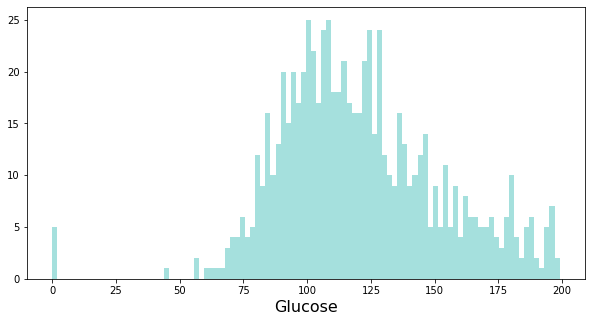

number of rows with 0 as the Glucose value:  5

minimum amount of Glucose (beside 0):  44


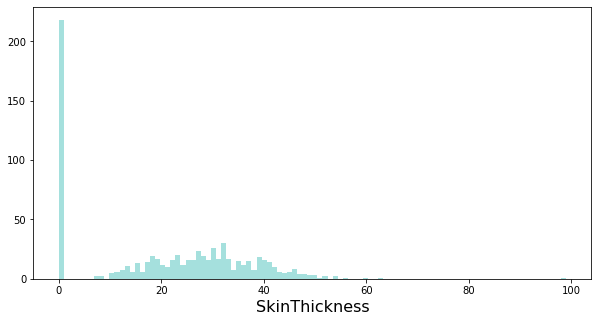

number of rows with 0 as the SkinThickness value:  218

minimum amount of SkinThickness (beside 0):  7


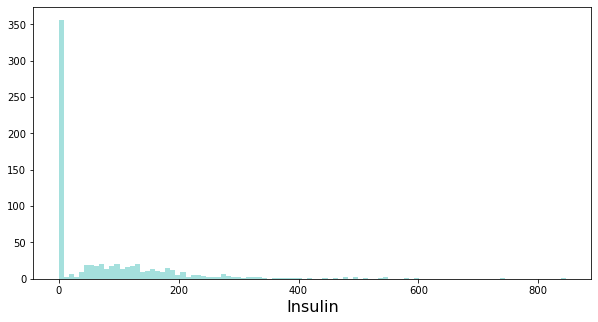

number of rows with 0 as the Insulin value:  356

minimum amount of Insulin (beside 0):  14


In [8]:
for col in ['Glucose', 'SkinThickness', 'Insulin']:
    
    plt.figure(figsize=(10,5))
    p = sns.distplot(X[col], color="lightseagreen", bins=100, kde=False)
    p.set_xlabel(col, fontsize=16)
    plt.show()
    
    print( "number of rows with 0 as the {} value: ".format(col), X[col][X[col]==0].count() )
    print( "\nminimum amount of {} (beside 0): ".format(col), X[col][X[col]>0].min() )

* again just by looking at the distribution plots above and the distance between 0 and the next minimum value we can assume that in the columns ***`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` and `BMI`, the value "0" is noise*** and in these columns missing data have been replaced by the integer "0" <br></br>
* also biologically speaking these medical variables can not have 0 as their value

<u> now in an attemp to handle these missing values we will nullify these zeros </u>

In [9]:
noise_col = {"zeros":['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']}

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class noise_management_zeros(BaseEstimator, TransformerMixin):
    
    def fit(self, Data, y = None):
        
        self.noise_col_ = list(Data.columns)

        return self
    
    def transform(self, Data):
        
        # make sure that it was fitted
        check_is_fitted(self, 'noise_col_')
        
        Data = Data.copy() # This is so we do not make changes to the original dataframe
        
        from numpy import nan
        
        for col in self.noise_col_:
            Data[col][Data[col]==0] = nan
            
        return Data

* checking **the percentage of missing values** if we replace `0` values with `Nan` in the columns that include this type of noise :

In [11]:
X_copy = X.copy()

In [12]:
X_copy[ noise_col["zeros"] ] = noise_management_zeros().fit_transform( X_copy[ noise_col["zeros"] ] )

X_copy.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.677507
BloodPressure                4.607046
SkinThickness               29.539295
Insulin                     48.238482
BMI                          1.490515
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

In [13]:
# number of missing values in each column
# rows = 738
X_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                34
SkinThickness               218
Insulin                     356
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

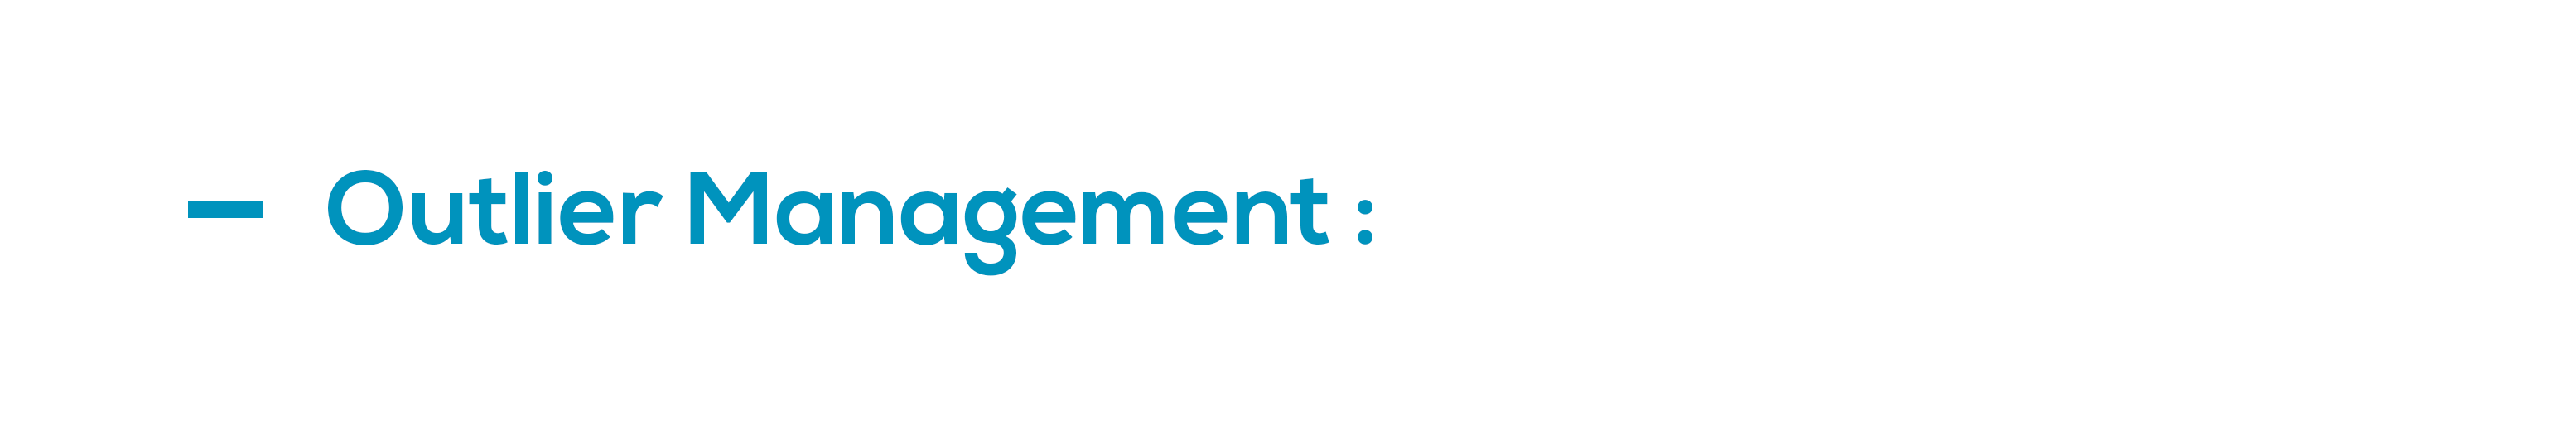

<u> first I would build a **dictionary** that includes columns with outlier values and the way I am going to handle these outliers later</u>

In [14]:
outlier_col = {"iqr":[], "zscore":[], "mad":[], "nullify":[]}

### IQR method
* **building functions for detecting and managing outliers using IQR method:**

In [15]:
def outliers_detection_iqr(df, column):
    
    '''
    returns a data frame of outliers for the specific column
    using IQR method for outlier detection
    '''
    
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)
    IQR = Q3 - Q1
    
    Lower_tail = Q1 - 1.5 * IQR
    Upper_tail = Q3 + 1.5 * IQR
    
    outliers_low = df[[column]][ df[column] < Lower_tail ]
    outliers_low["Condition"] = "Low"
    
    outliers_high = df[[column]][ df[column] > Upper_tail ]
    outliers_high["Condition"] = "High"
    
    iqr_outliers_df = pd.concat( [outliers_high, outliers_low] )
    
    return iqr_outliers_df.sort_index()

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class outliers_management_iqr(BaseEstimator, TransformerMixin):
    
    '''
    manage outliers that are detected using IQR method
    by coercing their values to the iqr alowed limits
    '''
        
    def fit(self, Data, y = None):
        
        Q1 = Data.quantile(.25)
        Q3 = Data.quantile(.75)
        IQR = Q3 - Q1

        self.Lower_tail_ = ( Q1 - 1.5 * IQR )
        self.Upper_tail_ = ( Q3 + 1.5 * IQR )
        
        return self
    
    def transform(self, Data):
        # make sure that it was fitted
        check_is_fitted(self, 'Lower_tail_')
        check_is_fitted(self, 'Upper_tail_')
        
        Data = Data.copy() # This is so we do not make changes to the original dataframe
        
        for col in Data.columns:
            Data[col][ Data[col] < self.Lower_tail_[col] ] = self.Lower_tail_[col]
            Data[col][ Data[col] > self.Upper_tail_[col] ] = self.Upper_tail_[col]
        
        return Data

### Zscore method
* **building functions for detecting and managing outliers using zscore method:**

In [17]:
def outliers_detection_zscore(df, column):
        
    '''
    returns a data frame of outliers for the specific column
    using zscore method for outlier detection
    '''
    
    mean = np.mean( df[column] )
    std = np.std( df[column])
    
    Lower_tail = mean - 3*std
    Upper_tail = mean + 3*std
    
    outliers_low = df[[column]][ df[column] < Lower_tail ]
    outliers_low["Condition"] = "Low"
    
    outliers_high = df[[column]][ df[column] > Upper_tail ]
    outliers_high["Condition"] = "High"
    
    zscore_outliers_np_df = pd.concat( [outliers_high, outliers_low] )
    zscore_outliers_np_df["Zscore"] = ( zscore_outliers_np_df[column] - mean ) / std
    
    return zscore_outliers_np_df

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class outliers_management_zscore(BaseEstimator, TransformerMixin):
    
    '''
    manage outliers that are detected using zscore method
    by coercing their values to the zscore alowed limits
    '''
    
    def fit(self, Data):
        
        import numpy as np
        
        mean = np.mean( Data )
        std = np.std( Data )
    
        self.Lower_tail_ = mean - 3*std
        self.Upper_tail_ = mean + 3*std
        
        return self
    
    def transform(self, Data):
        # make sure that it was fitted
        check_is_fitted(self, 'Lower_tail_')
        check_is_fitted(self, 'Upper_tail_')
        
        Data = Data.copy() # This is so we do not make changes to the original dataframe
        
        for col in Data.columns:
            Data[col][ Data[col] < self.Lower_tail_[col] ] = self.Lower_tail_[col]
            Data[col][ Data[col] > self.Upper_tail_[col] ] = self.Upper_tail_[col]
        
        return Data

### MAD (Median Absolute Deviation) method
* **building functions for detecting and managing outliers using MAD method:**

In [19]:
def outliers_detection_mad(df, column):
    
    '''
    returns a data frame of outliers for the specific column
    using MAD (Median Absolute Deviation) method for outlier detection
    '''
    
    from statsmodels import robust
    
    cdf =  df[[column]].dropna(axis=0)
    
    median = np.median( cdf[column] )
    mad = robust.mad( cdf[column] )
    z =  (0.6745*( cdf[column] - median )) / (mad)
    
    outliers_low = cdf[[column]][ z<-3 ]
    outliers_low["Condition"] = "Low"
    
    outliers_high = cdf[[column]][z>3]
    outliers_high["Condition"] = "High"
    
    
    MAD_outliers_df = pd.concat( [outliers_high, outliers_low] )
    MAD_outliers_df["Modified Zscore"] = z.loc[MAD_outliers_df.index]
    
    return MAD_outliers_df

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class outliers_management_mad(BaseEstimator, TransformerMixin):
    
    '''
    manage outliers that are detected using IQR method
    by coercing their values to the iqr alowed limits
    '''
        
    def fit(self, Data, y = None):
        
        from statsmodels import robust

        lower_dict = dict()
        upper_dict = dict()

        for col in Data.columns:
            NanFree_col = Data[col].dropna(axis=0)
    
            median = np.median( NanFree_col )
            mad = robust.mad( NanFree_col )
    
            lower_bound = median - ( (3*mad)/0.6745 )
            lower_dict[col] = lower_bound
    
            upper_bound = median + ( (3*mad)/0.6745 )
            upper_dict[col] = upper_bound

        self.Lower_tail_ = pd.Series(lower_dict)
        self.Upper_tail_ = pd.Series(upper_dict)
        
        return self
    
    def transform(self, Data):
        # make sure that it was fitted
        check_is_fitted(self, 'Lower_tail_')
        check_is_fitted(self, 'Upper_tail_')
        
        Data = Data.copy() # This is so we do not make changes to the original dataframe
        
        for col in Data.columns:
            Data[col][ Data[col] < self.Lower_tail_[col] ] = self.Lower_tail_[col]
            Data[col][ Data[col] > self.Upper_tail_[col] ] = self.Upper_tail_[col]
        
        return Data

### Nullify outliers detected by MAD method
* **building functions for nullifying outliers detected by MAD method for handling them with the rest of missing values:**

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class outliers_management_nullify(BaseEstimator, TransformerMixin):
    
    '''
    manage outliers that are detected using IQR method
    by coercing their values to the iqr alowed limits
    '''
        
    def fit(self, Data, y = None):
        
        from statsmodels import robust

        lower_dict = dict()
        upper_dict = dict()

        for col in Data.columns:
            NanFree_col = Data[col].dropna(axis=0)
    
            median = np.median( NanFree_col )
            mad = robust.mad( NanFree_col )
    
            lower_bound = median - ( (3*mad)/0.6745 )
            lower_dict[col] = lower_bound
    
            upper_bound = median + ( (3*mad)/0.6745 )
            upper_dict[col] = upper_bound

        self.Lower_tail_ = pd.Series(lower_dict)
        self.Upper_tail_ = pd.Series(upper_dict)
        
        return self
    
    def transform(self, Data):
        # make sure that it was fitted
        check_is_fitted(self, 'Lower_tail_')
        check_is_fitted(self, 'Upper_tail_')
        
        Data = Data.copy() # This is so we do not make changes to the original dataframe
        
        for col in Data.columns:
            Data[col][ Data[col] < self.Lower_tail_[col] ] = np.nan
            Data[col][ Data[col] > self.Upper_tail_[col] ] = np.nan
        
        return Data

# feature 1 : Pregnancies

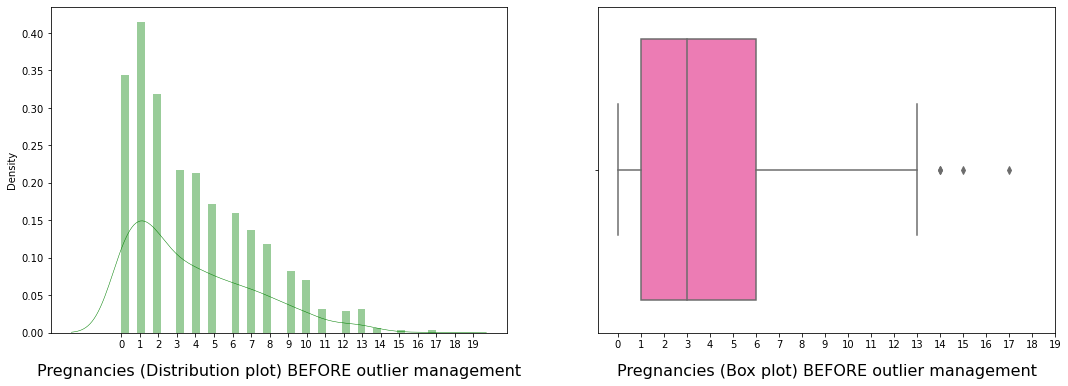

In [22]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X.Pregnancies, bins=40, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(0,20,1))
ax[0].set_xlabel("Pregnancies (Distribution plot) BEFORE outlier management", fontsize=16, labelpad=14)

sns.boxplot(X.Pregnancies, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(0,20,1))
ax[1].set_xlabel("Pregnancies (Box plot) BEFORE outlier management", fontsize=16, labelpad=14)

plt.show()

In [23]:
outliers_detection_iqr(X, "Pregnancies")

,Pregnancies,Condition
88,15,High
159,17,High
298,14,High
455,14,High


In [24]:
outliers_detection_zscore(X, "Pregnancies")

,Pregnancies,Condition,Zscore
298,14,High,3.014973
159,17,High,3.904875
455,14,High,3.014973
88,15,High,3.311607


In [25]:
outliers_detection_mad(X, "Pregnancies")

,Pregnancies,Condition,Modified Zscore
159,17,High,3.184603


* according to the `Pregnancies` distribution, I am going to handle this feature's outliers with the **`IQR`** method

In [26]:
outlier_col["iqr"].append("Pregnancies")

* again, I am not going to apply this outlier treatment on the original dataframe (X) yet, but just to check how this treatment would effect the distribution, I will use the copy we created above

In [27]:
X_copy[["Pregnancies"]] = outliers_management_iqr().fit_transform(X_copy[["Pregnancies"]])

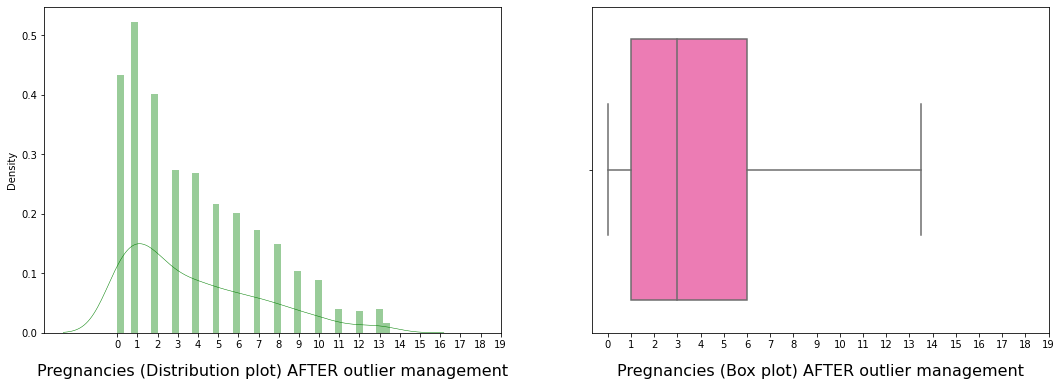

In [28]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.Pregnancies, bins=40, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(0,20,1))
ax[0].set_xlabel("Pregnancies (Distribution plot) AFTER outlier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.Pregnancies, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(0,20,1))
ax[1].set_xlabel("Pregnancies (Box plot) AFTER outlier management", fontsize=16, labelpad=14)

plt.show()

# feature 2 : Glucose

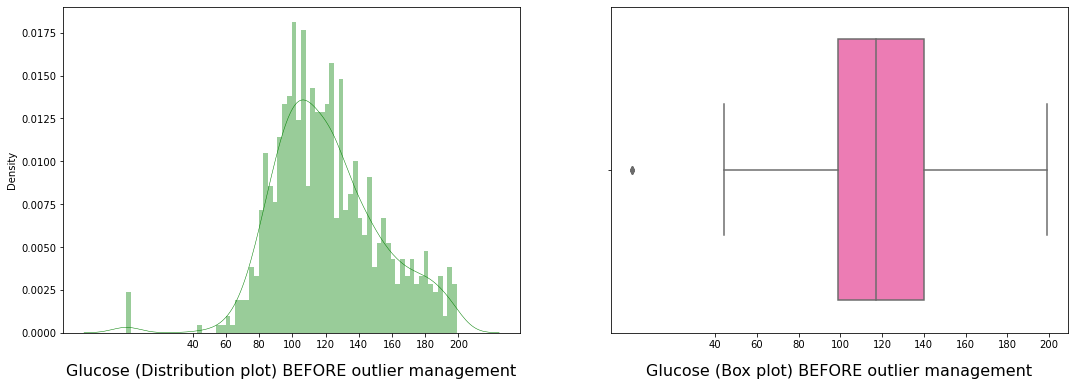

In [29]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X.Glucose, bins=70, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(40,210,20))
ax[0].set_xlabel("Glucose (Distribution plot) BEFORE outlier management", fontsize=16, labelpad=14)

sns.boxplot(X.Glucose, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(40,210,20))
ax[1].set_xlabel("Glucose (Box plot) BEFORE outlier management", fontsize=16, labelpad=14)

plt.show()

In [30]:
outliers_detection_iqr(X, "Glucose")

,Glucose,Condition
75,0,Low
182,0,Low
342,0,Low
349,0,Low
502,0,Low


In [31]:
outliers_detection_zscore(X, "Glucose")

,Glucose,Condition,Zscore
502,0,Low,-3.78806
75,0,Low,-3.78806
182,0,Low,-3.78806
349,0,Low,-3.78806
342,0,Low,-3.78806


In [32]:
outliers_detection_mad(X, "Glucose")

,Glucose,Condition,Modified Zscore


* the only outlier value in this column is the value *Zero* which we *treated* that in the noise section above.<br></br>
* here we will see if we drop all zeros we won't have any ouliers left :

In [33]:
# in X_copy we already treated 0 as noise and droped all 0 values
X_copy['Glucose'][X_copy['Glucose']==0].count()

0

* as you can see once we get rid of all the zeros, there will be no more outliers:

In [34]:
pd.concat([
    outliers_detection_iqr(X_copy, "Glucose"),
    outliers_detection_zscore(X_copy, "Glucose").iloc[:,:2],
    outliers_detection_mad(X_copy, "Glucose").iloc[:,:2]],
    axis=1)

,Glucose,Condition,Glucose,Condition,Glucose,Condition


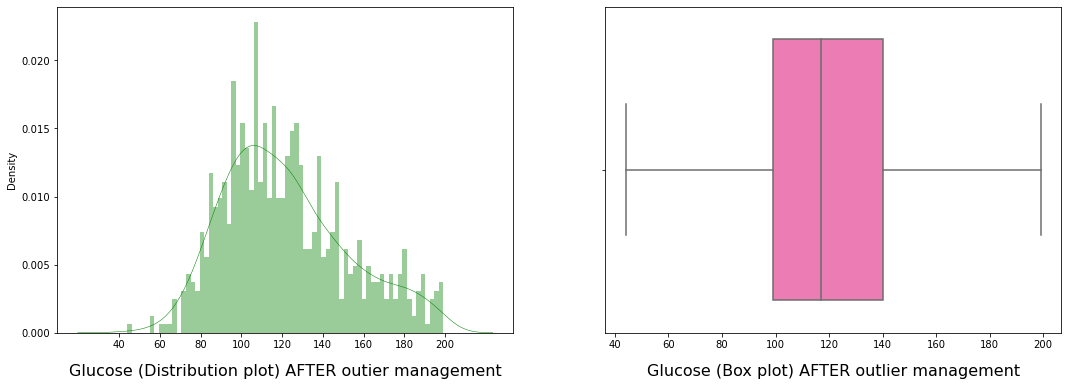

In [35]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.Glucose, bins=70, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(40,210,20))
ax[0].set_xlabel("Glucose (Distribution plot) AFTER outier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.Glucose, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(40,210,20))
ax[1].set_xlabel("Glucose (Box plot) AFTER outlier management", fontsize=16, labelpad=14)

plt.show()

but I will use <u>MAD outlier detection as a threshold</u> for Glucose in case some outliers appear in a new data set (or in this case `X_test`)

In [36]:
outlier_col['mad'].append('Glucose')

# feature 3 : BloodPressure

* we already know that this column have a lot of zero values as noise, which will appear as outliers too

In [37]:
print( "number 0 values as outliers by IQR method: ",
      ( outliers_detection_iqr(X, "BloodPressure")["BloodPressure"] == 0 ).sum() )

print( "number 0 values as outliers by Zscore method: ",
      ( outliers_detection_zscore(X, "BloodPressure")["BloodPressure"] == 0 ).sum() )

print( "number 0 values as outliers by MAD method: ",
      ( outliers_detection_mad(X, "BloodPressure")["BloodPressure"] == 0 ).sum() )

number 0 values as outliers by IQR method:  34
number 0 values as outliers by Zscore method:  34
number 0 values as outliers by MAD method:  34


* also, these values **will extremely effect zscore method**
* so instead we are going to use `x_copy` dataframe in which we already handled noise values

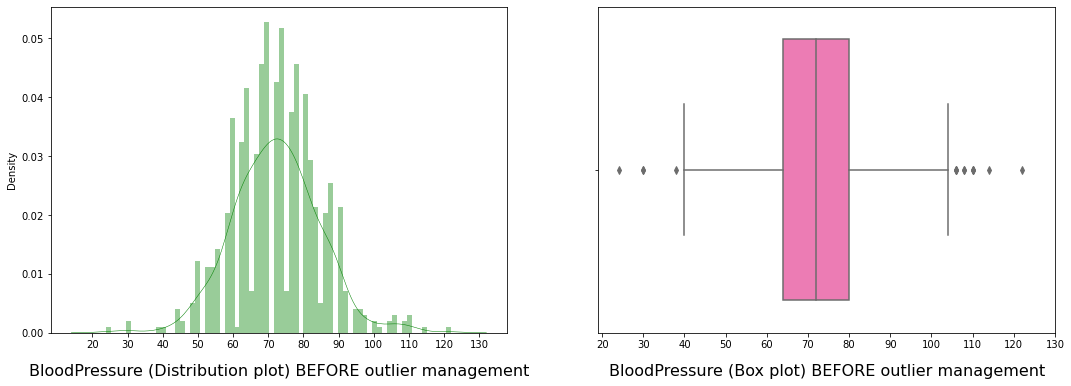

In [38]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.BloodPressure, bins=70, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(20,140,10))
ax[0].set_xlabel("BloodPressure (Distribution plot) BEFORE outlier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.BloodPressure, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(20,140,10))
ax[1].set_xlabel("BloodPressure (Box plot) BEFORE outlier management", fontsize=16, labelpad=14)

plt.show()

In [39]:
outliers_detection_iqr(X_copy, "BloodPressure")

,BloodPressure,Condition
18,30.0,Low
43,110.0,High
84,108.0,High
106,122.0,High
125,30.0,Low
177,110.0,High
362,108.0,High
549,110.0,High
597,24.0,Low
599,38.0,Low


In [40]:
outliers_detection_zscore(X_copy, "BloodPressure")

,BloodPressure,Condition,Zscore
43,110.0,High,3.055723
691,114.0,High,3.379618
177,110.0,High,3.055723
106,122.0,High,4.027407
549,110.0,High,3.055723
597,24.0,Low,-3.908017
18,30.0,Low,-3.422175
125,30.0,Low,-3.422175


In [41]:
outliers_detection_mad(X_copy, "BloodPressure")

,BloodPressure,Condition,Modified Zscore


* according to the `BloodPressure` distribution shape, I am going to handle this feature's outliers with the **`zscore`** method

In [42]:
outlier_col["zscore"].append("BloodPressure")

* again, I am not going to apply this outlier treatment on the original dataframe (X) yet, but just to check how this treatment would effect the distribution, I will use the copy (`X_copy`) we created above

In [43]:
X_copy[["BloodPressure"]] = outliers_management_zscore().fit_transform(X_copy[["BloodPressure"]])

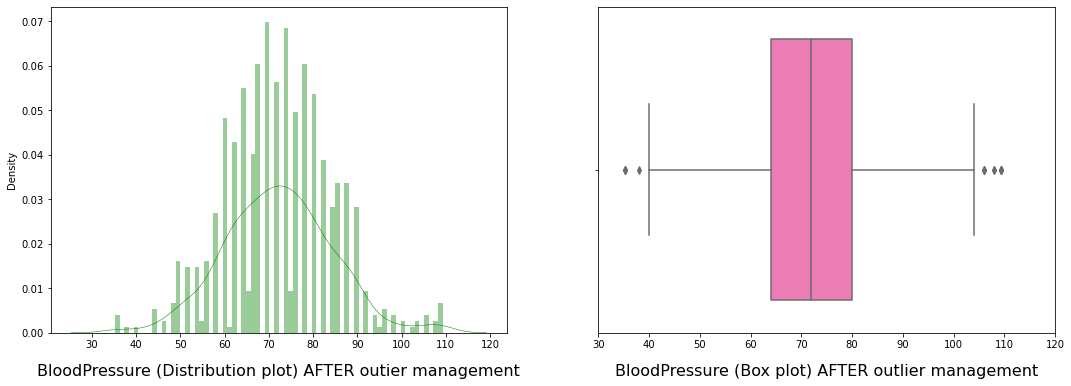

In [44]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.BloodPressure, bins=70, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(30,130,10))
ax[0].set_xlabel("BloodPressure (Distribution plot) AFTER outier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.BloodPressure, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(30,130,10))
ax[1].set_xlabel("BloodPressure (Box plot) AFTER outlier management", fontsize=16, labelpad=14)

plt.show()

# feature 4 : SkinThickness

* we already know that this column have a lot of zero values as noise, which **might** appear as outliers too
* also, these values will effect zscore method
* so instead we are going to use `X_copy` dataframe in which we already handled noise values

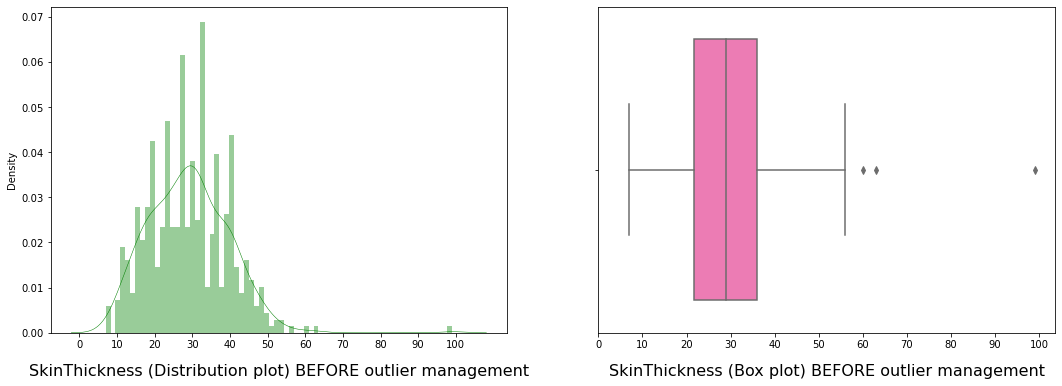

In [45]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.SkinThickness, bins=70, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(0,110,10))
ax[0].set_xlabel("SkinThickness (Distribution plot) BEFORE outlier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.SkinThickness, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(0,110,10))
ax[1].set_xlabel("SkinThickness (Box plot) BEFORE outlier management", fontsize=16, labelpad=14)

plt.show()

In [46]:
outliers_detection_iqr(X_copy, "SkinThickness")

,SkinThickness,Condition
57,60.0,High
445,63.0,High
579,99.0,High


In [47]:
outliers_detection_zscore(X_copy, "SkinThickness")

,SkinThickness,Condition,Zscore
579,99.0,High,6.607634
445,63.0,High,3.203062


In [48]:
outliers_detection_mad(X_copy, "SkinThickness")

,SkinThickness,Condition,Modified Zscore
579,99.0,High,4.549433


* according to the `SkinThickness` distribution shape and the outcomes of the outlier detection functions we used above , I am going to handle this feature's outliers with the **`zscore`** method

In [49]:
outlier_col["zscore"].append("SkinThickness")

* again, I am not going to apply this outlier treatment on the original dataframe (X) yet, but just to check how this treatment would effect the distribution, I will use `X_copy` dataframe

In [50]:
X_copy[["SkinThickness"]] = outliers_management_zscore().fit_transform(X_copy[["SkinThickness"]])

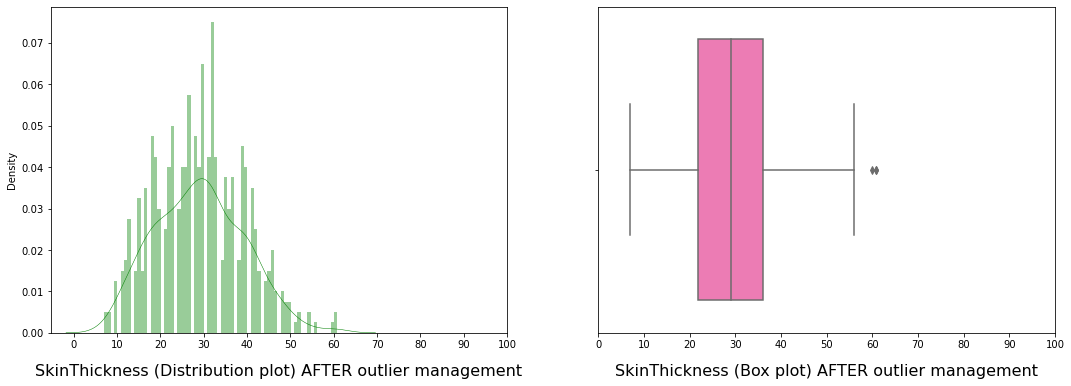

In [51]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.SkinThickness, bins=70, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(0,110,10))
ax[0].set_xlabel("SkinThickness (Distribution plot) AFTER outlier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.SkinThickness, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(0,110,10))
ax[1].set_xlabel("SkinThickness (Box plot) AFTER outlier management", fontsize=16, labelpad=14)

plt.show()

# feature 5 : Insulin

* we already know that this column have a lot of zero values as noise, which **might** appear as outliers too
* also, these values will effect zscore method
* so instead we are going to use `X_copy` dataframe in which we already handled noise values

* first a notable matter for this feature is that *close to 50% of data in this column is missing* :

In [52]:
print( 'count of missing values in Insulin column : ' ,X_copy.Insulin.isnull().sum())
print( 'percentage of missing values in Insulin column {}%: '.format( round(X_copy.Insulin.isnull().mean()*100,2) ) )

count of missing values in Insulin column :  356
percentage of missing values in Insulin column 48.24%: 


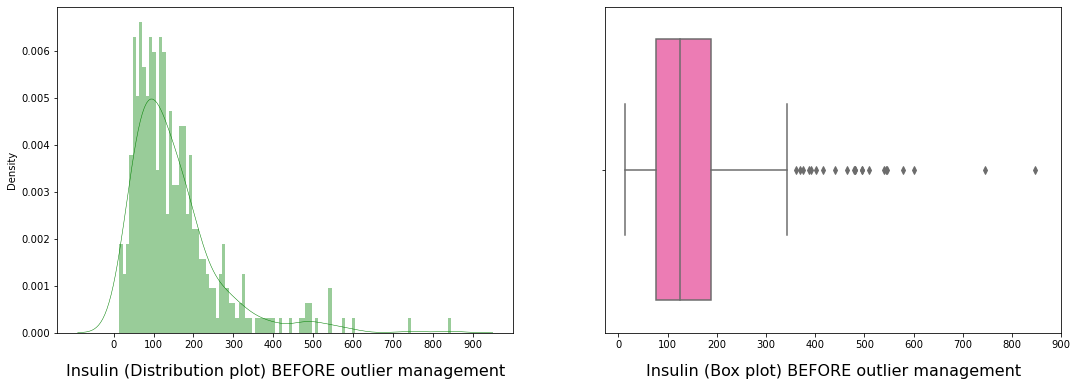

In [53]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.Insulin, bins=100, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(0,1000,100))
ax[0].set_xlabel("Insulin (Distribution plot) BEFORE outlier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.Insulin, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(0,1000,100))
ax[1].set_xlabel("Insulin (Box plot) BEFORE outlier management", fontsize=16, labelpad=14)

plt.show()

In [54]:
print("{} outliers according to IQR method".format( outliers_detection_iqr(X_copy, "Insulin").shape[0] ))
outliers_detection_iqr(X_copy, "Insulin")

22 outliers according to IQR method


,Insulin,Condition
8,543.0,High
13,846.0,High
111,495.0,High
186,495.0,High
220,478.0,High
228,744.0,High
231,370.0,High
248,402.0,High
258,375.0,High
286,545.0,High


In [55]:
outliers_detection_zscore(X_copy, "Insulin")

,Insulin,Condition,Zscore
753,510.0,High,3.144359
286,545.0,High,3.451982
655,540.0,High,3.408036
13,846.0,High,6.097541
228,744.0,High,5.201040
8,543.0,High,3.434404
584,600.0,High,3.935390
409,579.0,High,3.750816
111,495.0,High,3.012521
186,495.0,High,3.012521


In [56]:
outliers_detection_mad(X_copy, "Insulin")

,Insulin,Condition,Modified Zscore
753,510.0,High,3.243577
286,545.0,High,3.538448
655,540.0,High,3.496324
13,846.0,High,6.074336
228,744.0,High,5.214999
8,543.0,High,3.521598
584,600.0,High,4.001816
409,579.0,High,3.824894
111,495.0,High,3.117204
186,495.0,High,3.117204


* the Insulin distribution has a great amount of skewness and it is not close to a normal distribution, but IQR method detected 22 rows as outliers, which is a lot for a column that has close to 50% missing values.
* using MAD method with the detection of 10 outliers seems wiser.
* let's check how would the distribution change if we use MAD function for managing these outliers :

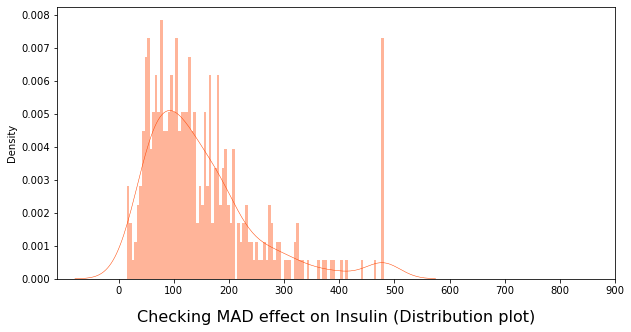

In [57]:
plt.figure(figsize=(10,5))

sns.distplot(outliers_management_mad().fit_transform(X_copy[["Insulin"]]),
             bins=100, kde_kws={"linewidth":0.5}, color="orangered")

plt.xticks(np.arange(0,1000,100))
plt.xlabel("Checking MAD effect on Insulin (Distribution plot)", fontsize=16, labelpad=14)

plt.show()

* as we can see this far from a good solution to manage the outliers because it changes the distribution a lot
* then again we have 48.24% missing values on this col <u>so a wiser solution is to nullify the outliers that MAD method detected and handle them with the rest of missing values</u>

In [58]:
outlier_col['nullify'].append('Insulin')

* again, I am not going to apply this outlier treatment on the original dataframe (X) yet, but just to check how this treatment would effect the distribution, I will use `X_copy` dataframe

In [59]:
X_copy[['Insulin']] = outliers_management_nullify().fit_transform(X_copy[['Insulin']])

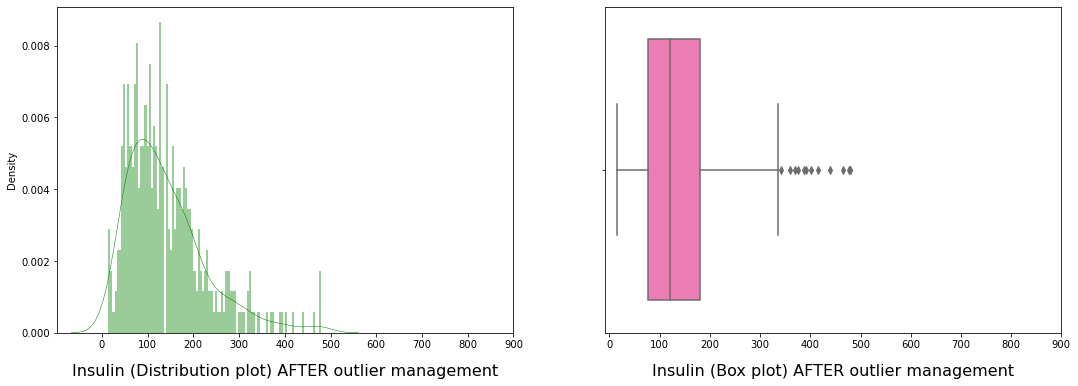

In [60]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.Insulin, bins=100, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(0,1000,100))
ax[0].set_xlabel("Insulin (Distribution plot) AFTER outlier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.Insulin, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(0,1000,100))
ax[1].set_xlabel("Insulin (Box plot) AFTER outlier management", fontsize=16, labelpad=14)

plt.show()

# feature 6 : BMI

* we already know that this column have a lot of zero values as noise, which will appear as outliers too

In [61]:
print( "number 0 values as outliers by IQR method: ",
      ( outliers_detection_iqr(X, "BMI")["BMI"] == 0 ).sum() )

print( "number 0 values as outliers by Zscore method: ",
      ( outliers_detection_zscore(X, "BMI")["BMI"] == 0 ).sum() )

print( "number 0 values as outliers by MAD method: ",
      ( outliers_detection_mad(X, "BMI")["BMI"] == 0 ).sum() )

number 0 values as outliers by IQR method:  11
number 0 values as outliers by Zscore method:  11
number 0 values as outliers by MAD method:  11


* also, these values will effect zscore method
* so instead we are going to use `X_copy` dataframe in which we already handled noise values

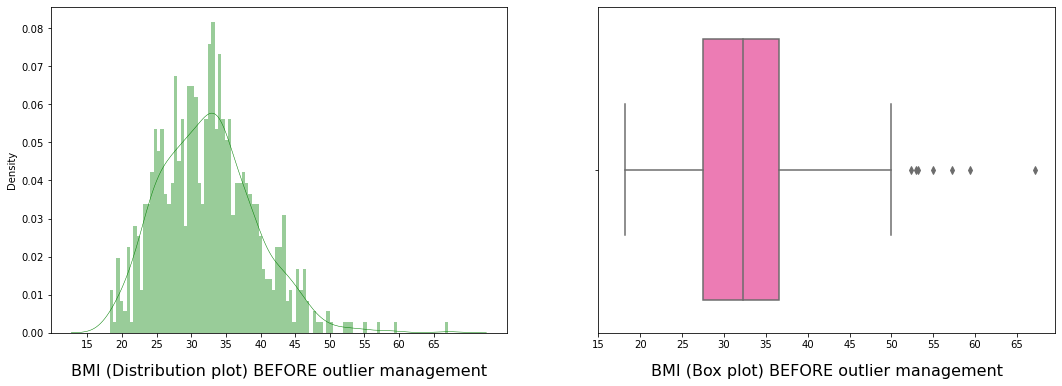

In [62]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.BMI, bins=100, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(15,70,5))
ax[0].set_xlabel("BMI (Distribution plot) BEFORE outlier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.BMI, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(15,70,5))
ax[1].set_xlabel("BMI (Box plot) BEFORE outlier management", fontsize=16, labelpad=14)

plt.show()

In [63]:
outliers_detection_iqr(X_copy, "BMI")

,BMI,Condition
120,53.2,High
125,55.0,High
177,67.1,High
193,52.3,High
303,52.9,High
445,59.4,High
673,57.3,High


In [64]:
outliers_detection_zscore(X_copy, "BMI")

,BMI,Condition,Zscore
177,67.1,High,5.039893
445,59.4,High,3.921282
673,57.3,High,3.616206
120,53.2,High,3.020583
125,55.0,High,3.282076


In [65]:
outliers_detection_mad(X_copy, "BMI")

,BMI,Condition,Modified Zscore
177,67.1,High,3.368517


* according to the `BMI` distribution shape and the outcomes of the outlier detection functions we used above , I am going to handle this feature's outliers with the **`zscore`** method

In [66]:
outlier_col["zscore"].append("BMI")

* again, I am not going to apply this outlier treatment on the original dataframe (X) yet, but just to check how this treatment would effect the distribution, I will use `X_copy` dataframe

In [67]:
X_copy[['BMI']] = outliers_management_zscore().fit_transform(X_copy[['BMI']])

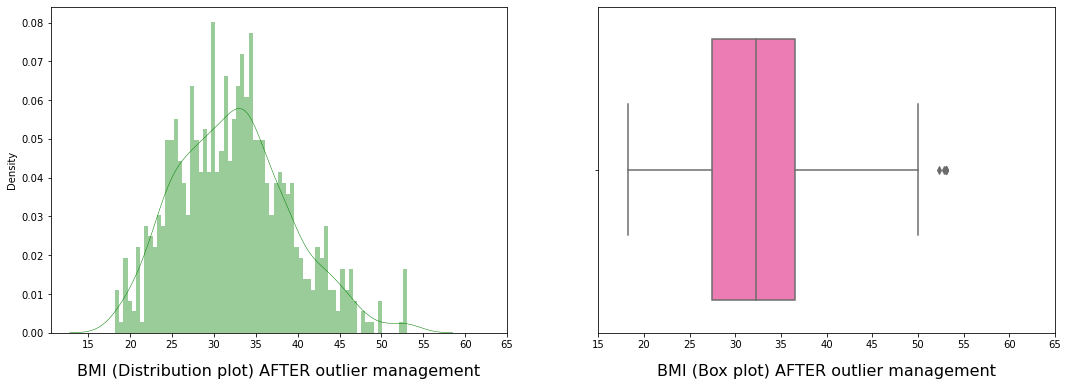

In [68]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.BMI, bins=70, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(15,70,5))
ax[0].set_xlabel("BMI (Distribution plot) AFTER outlier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.BMI, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(15,70,5))
ax[1].set_xlabel("BMI (Box plot) AFTER outlier management", fontsize=16, labelpad=14)

plt.show()

# feature 7 : DiabetesPedigreeFunction

* this feature did not have any noise, so we are going to use the original data frame `X`

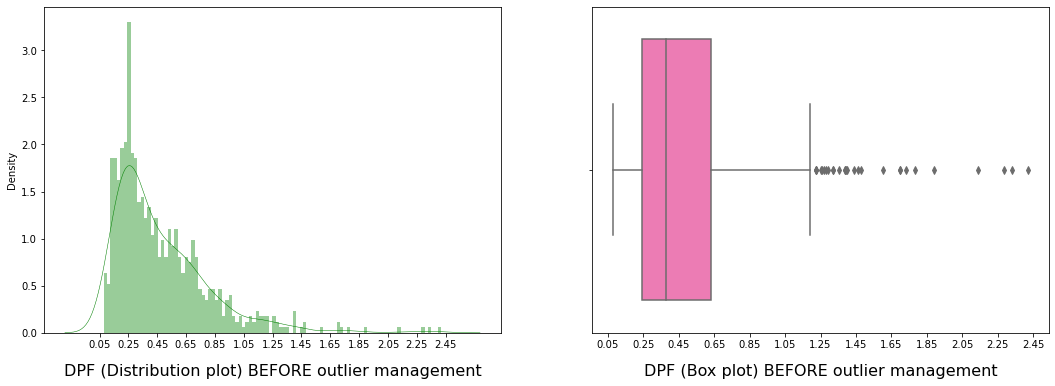

In [69]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X.DiabetesPedigreeFunction, bins=100, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(0.05,2.5,0.2))
ax[0].set_xlabel("DPF (Distribution plot) BEFORE outlier management", fontsize=16, labelpad=14)

sns.boxplot(X.DiabetesPedigreeFunction, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(0.05,2.5,0.2))
ax[1].set_xlabel("DPF (Box plot) BEFORE outlier management", fontsize=16, labelpad=14)

plt.show()

In [70]:
print(
    "{} outliers according to IQR method".format(
        outliers_detection_iqr(X, "DiabetesPedigreeFunction").shape[0]
    )
)

outliers_detection_iqr(X, "DiabetesPedigreeFunction")

28 outliers according to IQR method


,DiabetesPedigreeFunction,Condition
4,2.288,High
12,1.441,High
39,1.390,High
45,1.893,High
58,1.781,High
100,1.222,High
147,1.400,High
187,1.321,High
218,1.224,High
228,2.329,High


In [71]:
print(
    "{} outliers according to zscore method".format(
        outliers_detection_zscore(X, "DiabetesPedigreeFunction").shape[0]
    )
)

outliers_detection_zscore(X, "DiabetesPedigreeFunction")

10 outliers according to zscore method


,DiabetesPedigreeFunction,Condition,Zscore
395,1.600,High,3.368995
593,1.699,High,3.665576
4,2.288,High,5.430082
228,2.329,High,5.552908
445,2.420,High,5.825523
58,1.781,High,3.911228
621,1.698,High,3.662580
45,1.893,High,4.246754
370,2.137,High,4.977721
371,1.731,High,3.761440


In [72]:
print(
    "{} outliers according to MAD method".format(
        outliers_detection_mad(X, "DiabetesPedigreeFunction").shape[0]
    )
)

outliers_detection_mad(X, "DiabetesPedigreeFunction")

10 outliers according to MAD method


,DiabetesPedigreeFunction,Condition,Modified Zscore
395,1.600,High,3.229569
593,1.699,High,3.491426
4,2.288,High,5.049342
228,2.329,High,5.157788
445,2.420,High,5.398485
58,1.781,High,3.708317
621,1.698,High,3.488781
45,1.893,High,4.004559
370,2.137,High,4.649944
371,1.731,High,3.576066


* the **DiabetesPedigreeFunction** distribution has a great amount of skewness and it is not close to a normal distribution, but IQR method detected 28 rows as outliers, which is a lot
* using MAD method with the detection of 10 outliers seems wiser.
* let's check how would the distribution change if we use MAD function for managing these outliers :

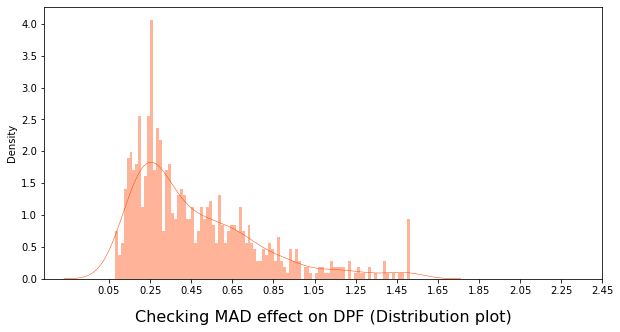

In [73]:
plt.figure(figsize=(10,5))

sns.distplot(outliers_management_mad().fit_transform(X[["DiabetesPedigreeFunction"]]),
             bins=100, kde_kws={"linewidth":0.5}, color="orangered")

plt.xticks(np.arange(0.05,2.5,0.2))
plt.xlabel("Checking MAD effect on DPF (Distribution plot)", fontsize=16, labelpad=14)

plt.show()

* it might not be the best solution considering the shape change of the distribution. but it is our best option

In [74]:
outlier_col['mad'].append('DiabetesPedigreeFunction')

* again, I am not going to apply this outlier treatment on the original dataframe (X) yet, but just to check how this treatment would effect the distribution, I will use `X_copy` dataframe

In [75]:
X_copy[['DiabetesPedigreeFunction']] = outliers_management_mad().fit_transform(X_copy[['DiabetesPedigreeFunction']])

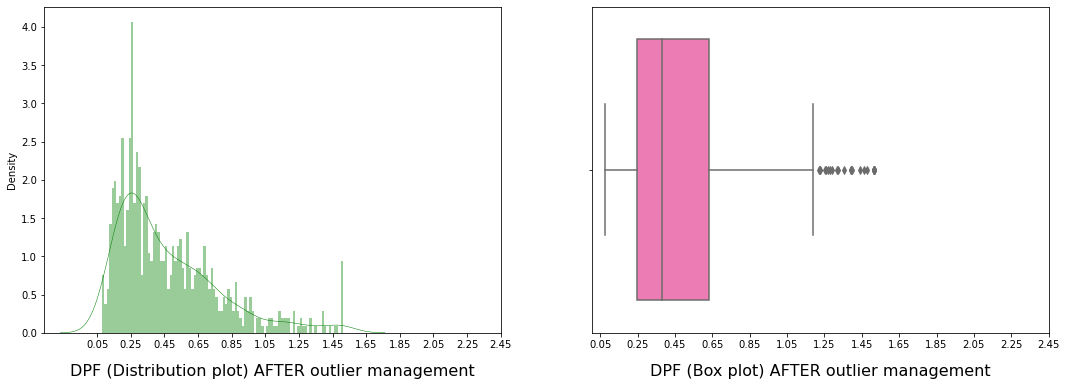

In [76]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.DiabetesPedigreeFunction, bins=100, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(0.05,2.5,0.2))
ax[0].set_xlabel("DPF (Distribution plot) AFTER outlier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.DiabetesPedigreeFunction, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(0.05,2.5,0.2))
ax[1].set_xlabel("DPF (Box plot) AFTER outlier management", fontsize=16, labelpad=14)

plt.show()

# feature 8 : Age

* this feature did not have any noise, so we are going to use the original data frame `X`

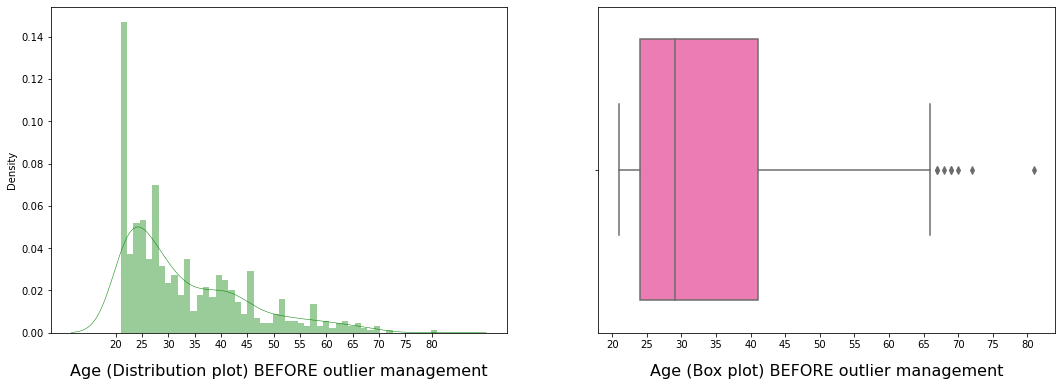

In [77]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X.Age, bins=50, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(20,85,5))
ax[0].set_xlabel("Age (Distribution plot) BEFORE outlier management", fontsize=16, labelpad=14)

sns.boxplot(X.Age, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(20,85,5))
ax[1].set_xlabel("Age (Box plot) BEFORE outlier management", fontsize=16, labelpad=14)

plt.show()

In [78]:
outliers_detection_iqr(X, "Age")

,Age,Condition
123,69,High
363,67,High
453,72,High
459,81,High
489,67,High
666,70,High
674,68,High
684,69,High


In [79]:
outliers_detection_zscore(X, "Age")

,Age,Condition,Zscore
459,81,High,4.071391
684,69,High,3.048142
123,69,High,3.048142
453,72,High,3.303954
666,70,High,3.133412


In [80]:
outliers_detection_mad(X, "Age")

,Age,Condition,Modified Zscore
459,81,High,3.379579


* the **Age** distribution has a great amount of skewness and it is not even close to a normal distribution
* using `IQR` method with the detection of 8 outliers seems wiser.

In [81]:
outlier_col['iqr'].append('Age')

* again, I am not going to apply this outlier treatment on the original dataframe (X) yet, but just to check how this treatment would effect the distribution, I will use the copy we created above

In [82]:
X_copy[['Age']] = outliers_management_iqr().fit_transform(X_copy[['Age']])

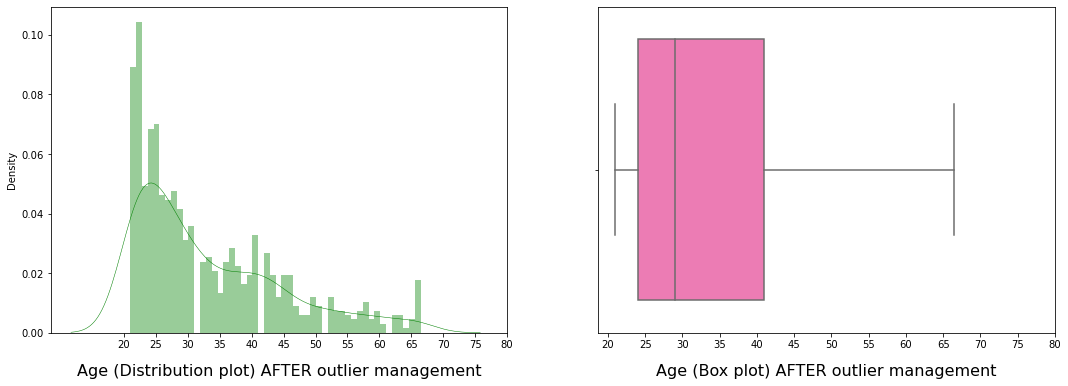

In [83]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.distplot(X_copy.Age, bins=50, ax=ax[0], kde_kws={"linewidth":0.5}, color="green")
ax[0].set_xticks(np.arange(20,85,5))
ax[0].set_xlabel("Age (Distribution plot) AFTER outlier management", fontsize=16, labelpad=14)

sns.boxplot(X_copy.Age, ax=ax[1], color="hotpink")
ax[1].set_xticks(np.arange(20,85,5))
ax[1].set_xlabel("Age (Box plot) AFTER outlier management", fontsize=16, labelpad=14)

plt.show()

# Conclusion
### (Outliers Management) :

In [84]:
outlier_col

{'iqr': ['Pregnancies', 'Age'],
 'zscore': ['BloodPressure', 'SkinThickness', 'BMI'],
 'mad': ['Glucose', 'DiabetesPedigreeFunction'],
 'nullify': ['Insulin']}

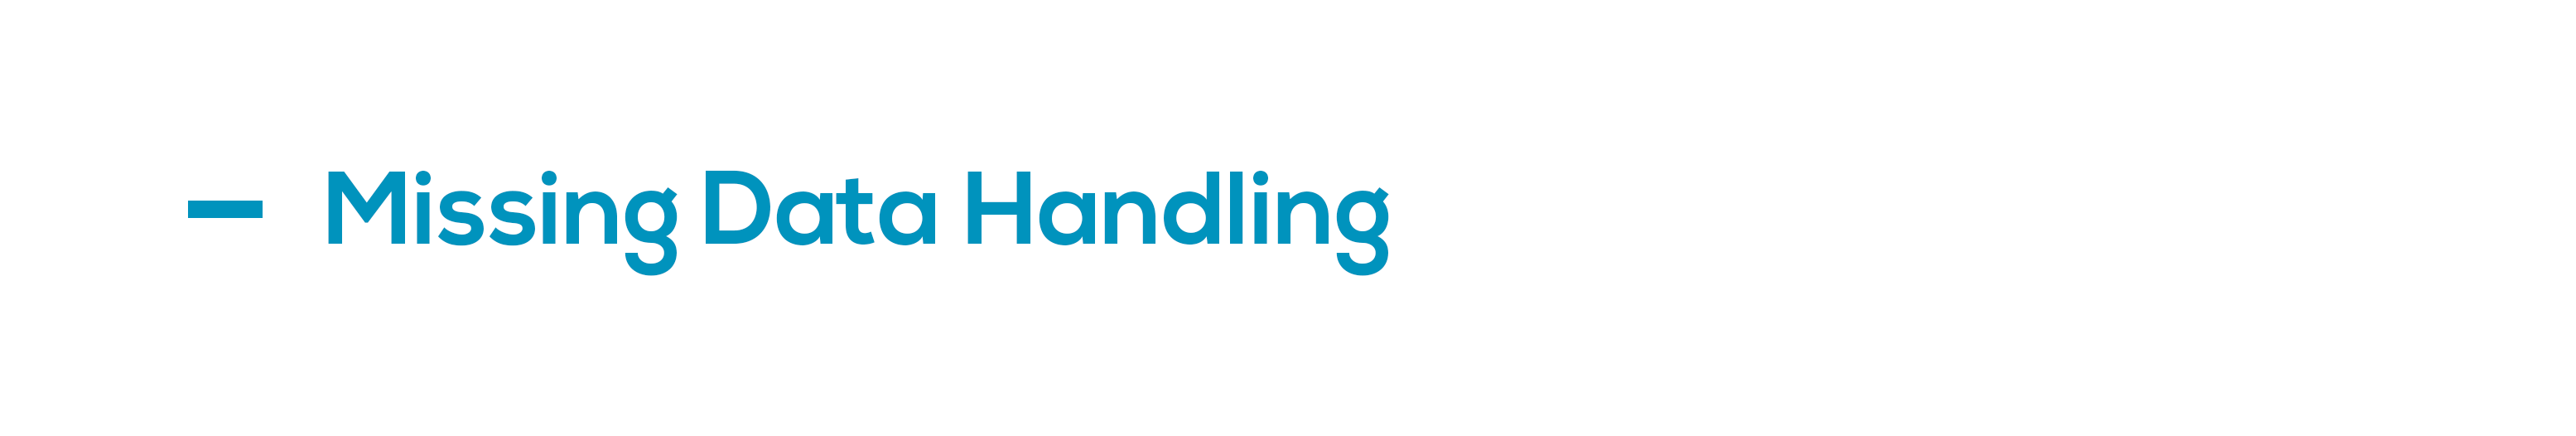

* the **percentage of missing values** in each column :

In [85]:
X_copy.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.677507
BloodPressure                4.607046
SkinThickness               29.539295
Insulin                     49.593496
BMI                          1.490515
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

* the **number of missing values** in each column :

In [86]:
X_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                34
SkinThickness               218
Insulin                     366
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

## KNN Imputer

* Imputation for completing missing values using `k-Nearest Neighbors`.<br></br>

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

* **sklearn.impute.KNNImputer** returns an array-like of shape, not a pandas.DataFrame which is a problem if your later actions require a DataFrame-like of shape, for example if you are creating a pipeline in which the function that comes after the Scaler in pipline's steps requires a DataFrame as an input

so first we are going to create a function using **sklearn.impute.KNNImputer** to do the same thing with only one difference, and that is to return a pandas DataFrame :

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class DataFrameKNNImputer(BaseEstimator, TransformerMixin):
    
    from numpy import nan
    
    def __init__(self, missing_values=nan, n_neighbors=5, weights='uniform'):
        
        self.missing_values = missing_values
        self.n_neighbors = n_neighbors
        self.weights = weights
    
    def fit(self, Data, y = None):
        
        from sklearn.impute import KNNImputer
        
        self.KNNImputer_ = KNNImputer(
            missing_values=self.missing_values,
            n_neighbors=self.n_neighbors,
            weights=self.weights
        ).fit(Data)

        return self
    
    def transform(self, Data):
        
        # make sure that it was fitted
        check_is_fitted(self, 'KNNImputer_')
        
        Data = Data.copy() # This is so we do not make changes to the original dataframe
        
        Data = pd.DataFrame( self.KNNImputer_.transform(Data), index=Data.index, columns=Data.columns )
            
        return Data

* again, in this stage we are not going to apply **KNNImputer** on the original dataframe (`X`) yet, but just to check out how this imputation will effect the features distribution, we are going to apply this to `X_copy`:

In [88]:
X_copy = DataFrameKNNImputer().fit_transform(X_copy)

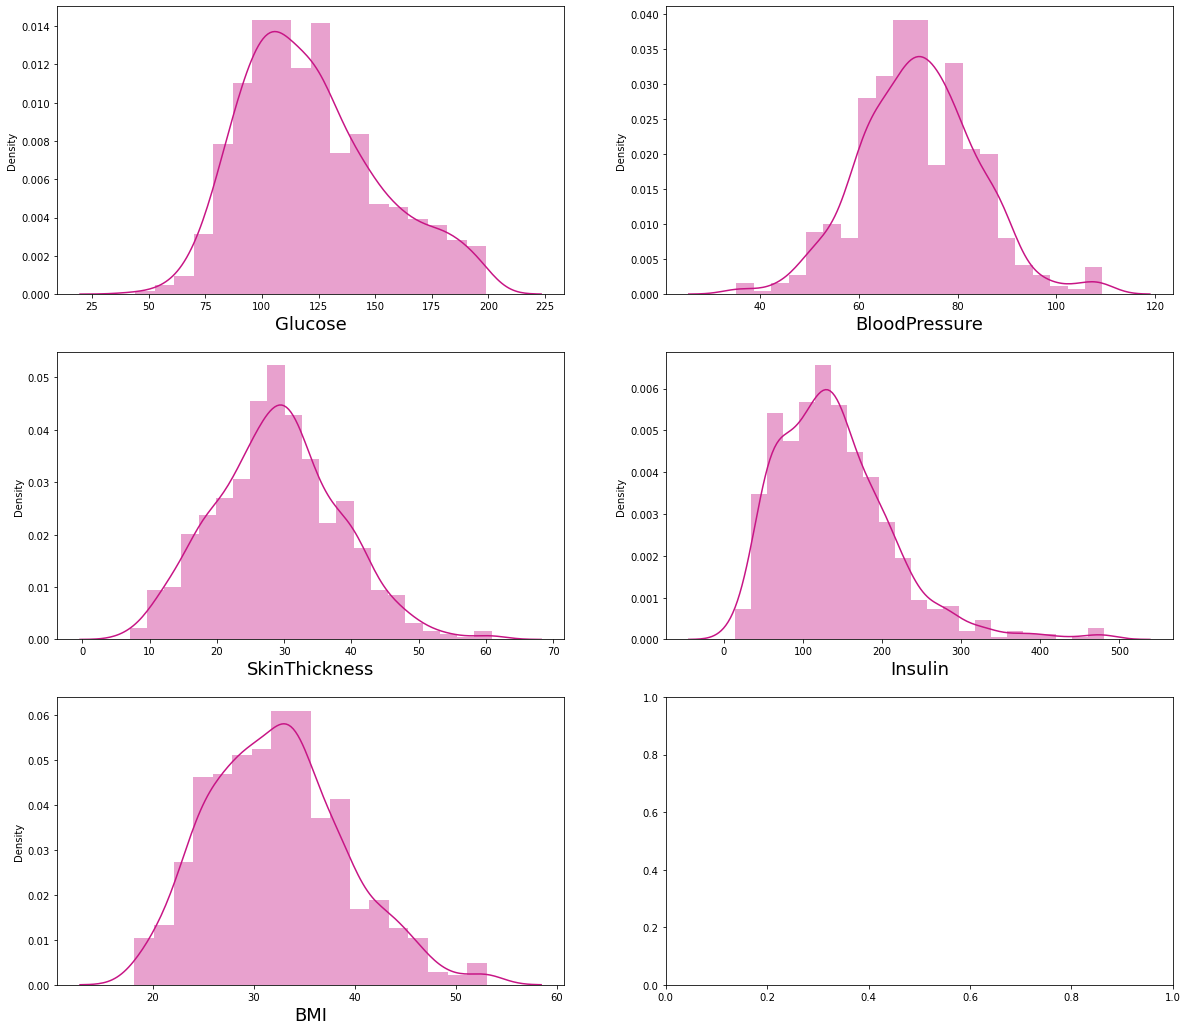

In [89]:
fig, ax = plt.subplots( 3, 2 , figsize=(20,18) )
ax_idx = list(product( [0,1,2,3], [0,1] ))

for i, col in enumerate(X_copy.drop(["Pregnancies", "Age","DiabetesPedigreeFunction"], axis=1).columns):
    sns.distplot( X_copy[col], ax=ax[ax_idx[i][0]][ax_idx[i][1]], kde=True, color="mediumvioletred")
    ax[ax_idx[i][0]][ax_idx[i][1]].set_xlabel(col, fontsize=18)

plt.show()

## Simple Imputer (Mean)

* As an alternative strategy, we also create a simple imputation function powered by **`sklearn.impute.SimpleImputer`** to impute missing values of each column with the mean of the column.

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class MeanImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, Data, y = None):
        
        from sklearn.impute import SimpleImputer
        
        self.MeanImputer_ = SimpleImputer(strategy='mean').fit(Data)

        return self
    
    def transform(self, Data):
        
        # make sure that it was fitted
        check_is_fitted(self, 'MeanImputer_')
        
        Data = Data.copy() # This is so we do not make changes to the original dataframe
        
        Data = pd.DataFrame( self.MeanImputer_.transform(Data), index=Data.index, columns=Data.columns )
            
        return Data

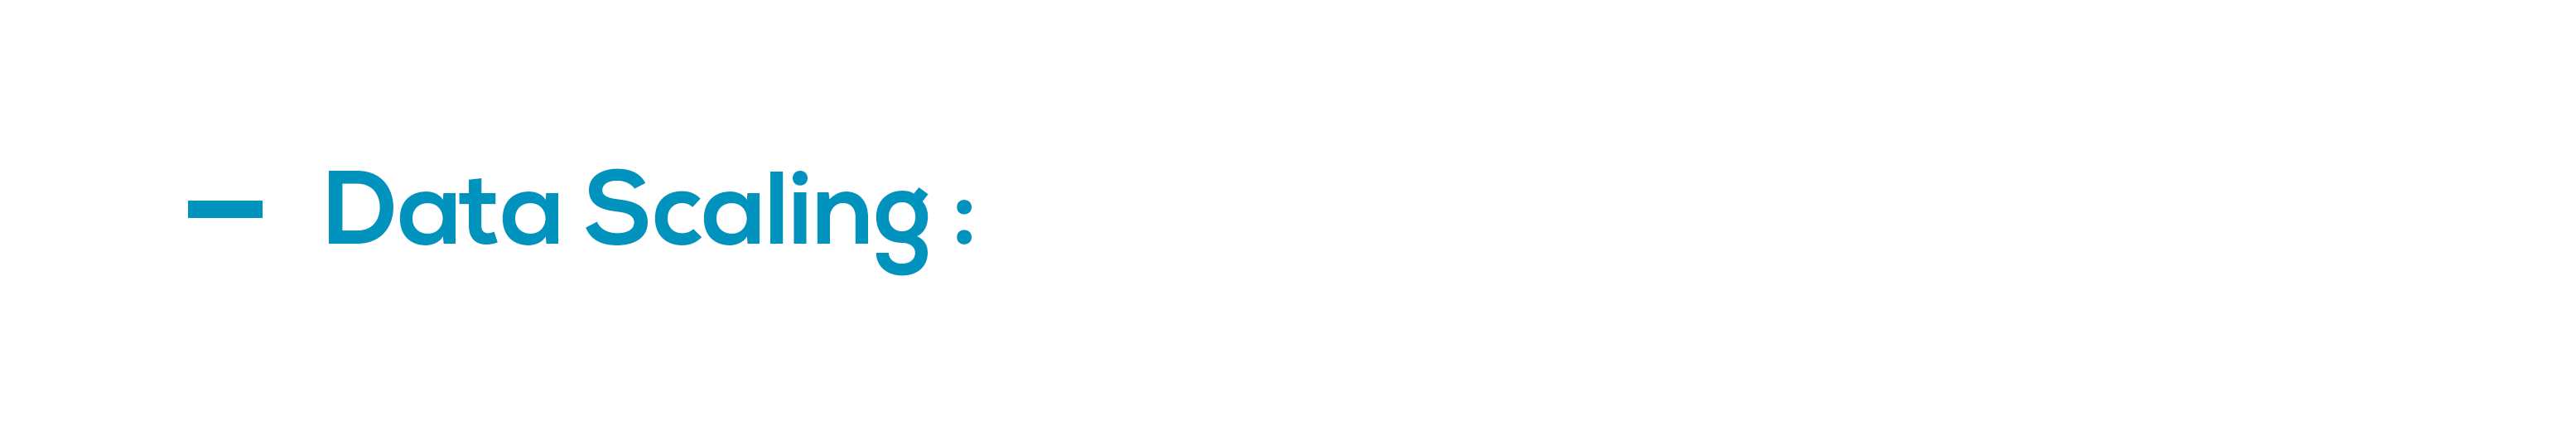

* although not all machine learning algorithms are sensitive to unscaled data, this step is preferred to avoid any unwanted mistake. in algorithms that relies on computing the distances, for features with a higher scale, the calculated distances can be very high and might produce poor results

* **sklearn.preprocessing.MinMaxScaler** returns an array-like of shape, not a pandas.DataFrame which is a problem if your later actions require a DataFrame-like of shape, for example if you are creating a pipeline in which the function that comes after the Scaler in pipline's steps requires a DataFrame as an input

so first we are going to create a function using sklearn.preprocessing.MinMaxScaler to do the same thing with only one difference, and that is to return a pandas DataFrame :

In [91]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class DataFrameMinMaxScaler(BaseEstimator, TransformerMixin):
    
    '''
    sklearn.preprocessing.MinMaxScaler return an array-like, sparse matrix of shape
    using this function we make it to return a pandas dataframe of chosen columns
    '''     
        
    def fit(self, Data, y = None):
        
        from sklearn.preprocessing import MinMaxScaler
        self.MinMaxScaler = MinMaxScaler().fit(Data)
        
        return self
        
        
    def transform(self, Data):
        
        # make sure that it was fitted
        check_is_fitted(self, 'MinMaxScaler')
        
        Data_copy = Data.copy() # This is so we do not make changes to the original dataframe
        
        ScaledData = pd.DataFrame( self.MinMaxScaler.transform(Data)
                                   ,index=Data.index,
                                   columns=Data.columns)
     
        return ScaledData

* in this stage we are not going to apply scaling on the original dataframe (X) yet, but just to finish the preprocessing of `X_copy` Dataset will scale it's Features

In [92]:
X_copy = DataFrameMinMaxScaler().fit_transform(X_copy)

In [93]:
X_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,0.283549,0.500044,0.499623,0.409544,0.269505,0.405537,0.272708,0.268382
std,0.247925,0.195949,0.161885,0.170757,0.156971,0.192596,0.214986,0.254940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.354839,0.388489,0.297106,0.152897,0.266794,0.116360,0.065934
50%,0.222222,0.470968,0.496454,0.408521,0.248927,0.397323,0.209726,0.175824
75%,0.444444,0.619355,0.604419,0.519936,0.356223,0.524982,0.384439,0.439560
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


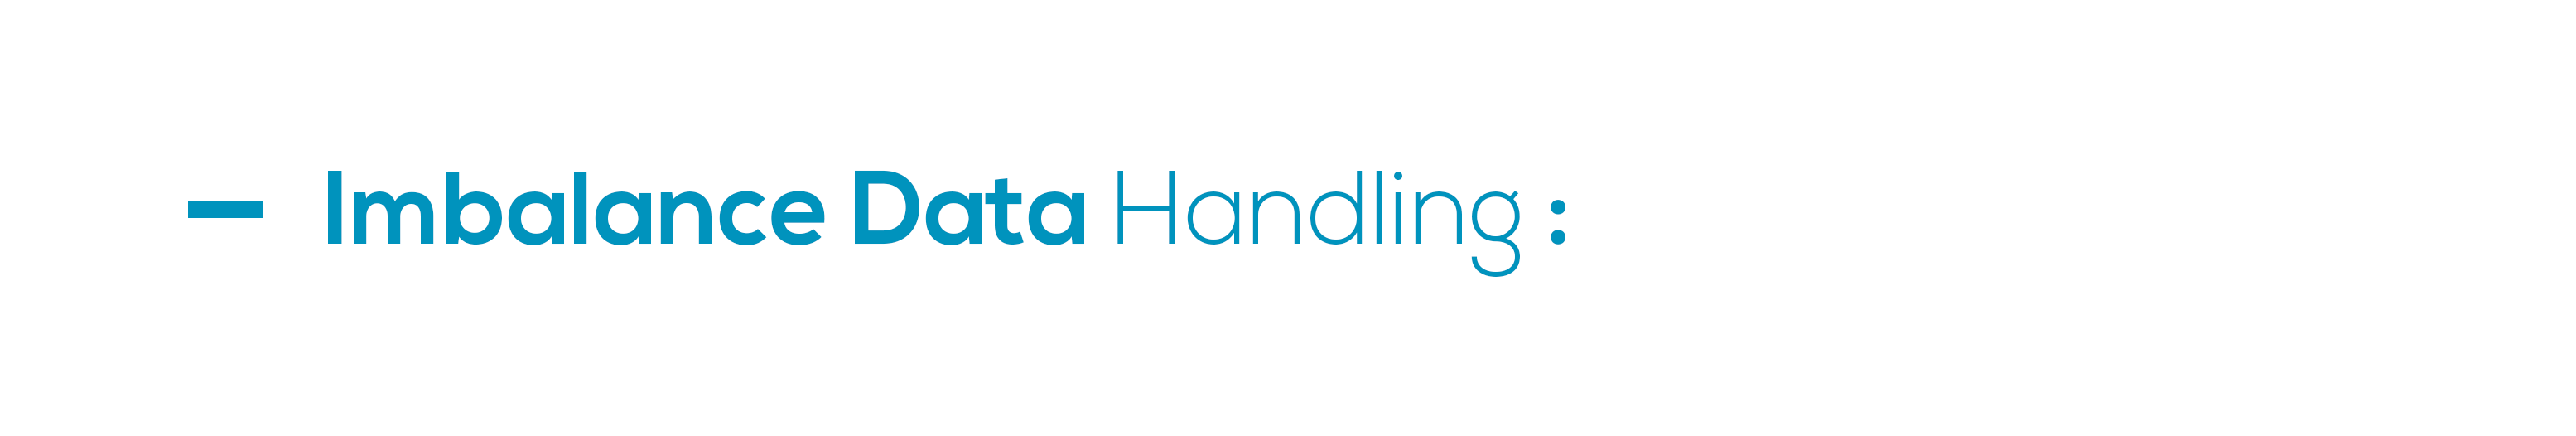

In [94]:
y.value_counts()

0    480
1    258
Name: Outcome, dtype: int64

In [95]:
round( (y.value_counts()/y.shape[0])*100, 2 )

0    65.04
1    34.96
Name: Outcome, dtype: float64

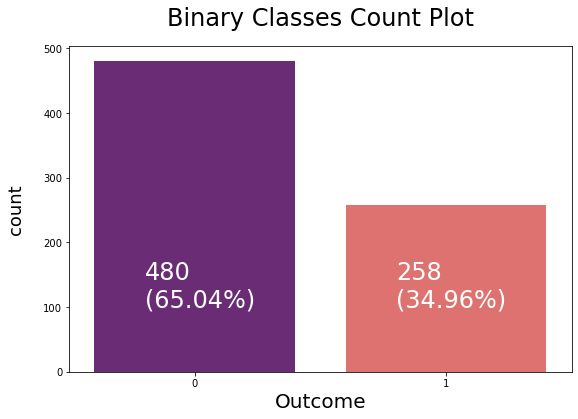

In [96]:
plt.figure(figsize=(9,6))

sns.countplot(y, palette="magma" )
plt.xlabel("Outcome", fontsize=20)
plt.ylabel("count", fontsize=18, labelpad=18)
plt.title("Binary Classes Count Plot", fontsize=24, pad=20)

plt.annotate('{}\n({}%)'.format( y.value_counts()[0], round( (y.value_counts()/y.shape[0])*100, 2 )[0]),
             fontsize=24, xy=(-0.2,100), color="w")

plt.annotate('{}\n({}%)'.format( y.value_counts()[1], round( (y.value_counts()/y.shape[0])*100, 2 )[1]),
             fontsize=24, xy=(0.8,100), color="w")


plt.show()

* it is safe to say that with a **30.08 %** difference between the population of these binary classes we are facing an **Imbalanced** dataset

but the question is, how to handle this **Imbalanced** data set. let's see our options:

<ul>
    <b>Under-Sampling:</b> with the total amount of 738 rows, it is obvious this is a small dataset, hence, using any kind of Under-Sampling will cost us losing valuable data.<br></br>
    <b>Over-Sampling:</b> A big con to consider when overersampling is that it can cause data leakage and thus overfitting and poor generalization to your test set <br></br>
    <b>SMOTE:</b> (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors. although it is a much better option than the regular over sampling, we should consider the fact that this new generated data, are not real observations. but all in all it is definitely a good option.<br></br>
    <b>Weighting Method:</b> Penalize Algorithms (Cost-Sensitive Training) increase the cost of classification mistakes on the minority class. During training, we can use the argument <b>class_weight='balanced'</b> to penalize mistakes on the minority class by an amount proportional to how under-represented it is, without generating any new data. but there is a con to consider for this method as well. and that is the fact that <u>class_weight='balanced' does not return the best accurate performance</u>. it will reduce Falsely Negative labeled predictions but it often comes with unwanted increased False Positive rate. also tuning this parameter would be time-consuming. and an another very considerable con of this method is that, not all the algorithms have this hyperparameter. (for example MLPClassifier)
</ul>
<br></br>

## conclusion:
* to handle this **Imbalanced** data set, we are using **`SMOTE`** method.

## Using "Jensen-Shannon Divergence" to find the best "k_neighbors" for "SMOTE" :
<br></br>
* as mentioned above SMOTE randomly picks a point from the minority class and computing the k-nearest neighbors for this point to generate the synthetic points. but we want during this synthetic generation of data, is **to maintain the distribution of features closest to what it was before the oversampling**. to do so we tune the `k_neighbors` parameter of SMOTE Using **`Jensen-Shannon Divergence`**.<br></br>
* The Kullback-Leibler Divergence score, or **`KL divergence score`**, quantifies how much one probability distribution differs from another probability distribution.<br></br>
<ul>
    KL divergence can be calculated as the positive sum of probability of each event in P multiplied by the log of the probability of the event in P over the probability of the event in Q. <br></br>
    <b> KL(P || Q) = sum x in X P(x) * log(P(x) / Q(x)) </b>
    
    </ul>
<br></br>
* The **`Jensen-Shannon divergence`**, or **`JS divergence`** for short, is another way to quantify the difference (or similarity) between two probability distributions.<br></br>
<ul>
    It uses the <b>KL divergence</b> to calculate a normalized score that is symmetrical. This means that the divergence of P from Q is the same as Q from P, or stated formally:<br></br>

    <b>JS(P || Q) == JS(Q || P)</b> <br></br>
    The JS divergence can be calculated as follows:

    <b>JS(P || Q) = 1/2 * KL(P || M) + 1/2 * KL(Q || M)</b> <br></br>
Where M is calculated as:

    <b>M = 1/2 * (P + Q)</b> <br></br>

It is more useful as a measure as it provides a smoothed and normalized version of KL divergence, with **scores between 0 (identical) and 1 (maximally different)**, when using the base-2 logarithm.

In [97]:
def best_k_neighbors(X, y, k_lower_range, k_upper_range):

    JSscore = pd.DataFrame(columns=X.columns )

    from imblearn.over_sampling import SMOTE
    from scipy.spatial.distance import jensenshannon
    from sklearn.model_selection import train_test_split

    for k in range( k_lower_range, k_upper_range+1 ):

        smt = SMOTE(random_state=42, k_neighbors=k)
        X_smt, y_smt = smt.fit_resample(X, y)
        
        X_generated, X_drop, y_generated, y_drop = train_test_split(
            X_smt, y_smt, stratify=y_smt, shuffle=True,
            train_size=round(X.shape[0]/X_smt.shape[0], 3),random_state=180
        )
        
        js_col = list()
        for col in X_copy.columns:
            
            js_col.append( jensenshannon( X[col], X_generated[col], base=2) )
            
        JSscore.loc[k] = js_col
    
    mean_js_score = dict()
    for idx in JSscore.index:
        
        mean_js_score[idx] = np.mean(JSscore.loc[idx])
    
        
    return sorted( mean_js_score.items(), key=lambda item:item[1] )[0][0]

In [98]:
print('best k_neighbors for SMOTE using Jensen-Shannon divergence: ', best_k_neighbors(X_copy, y, 2, 40))

best k_neighbors for SMOTE using Jensen-Shannon divergence:  40


* just like all the steps above, in this stage we are not going to apply SMOTE on the original dataframe (X) yet, but just to check the result, we are going to create `X_copy_bal` which is just a balanced version of `X_copy` using **SMOTE** method:

In [99]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42, k_neighbors=40)
X_copy_bal, y_copy_bal = smt.fit_resample(X_copy, y)

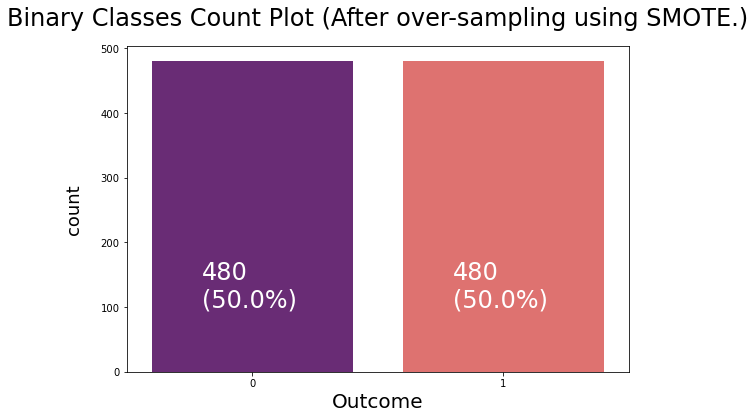

In [100]:
plt.figure(figsize=(9,6))

sns.countplot(y_copy_bal, palette="magma" )
plt.xlabel("Outcome", fontsize=20)
plt.ylabel("count", fontsize=18, labelpad=18)
plt.title("Binary Classes Count Plot (After over-sampling using SMOTE.)", fontsize=24, pad=20)

plt.annotate(
    '{}\n({}%)'.format(
        y_copy_bal.value_counts()[0],
        round( (y_copy_bal.value_counts()/y_copy_bal.shape[0])*100, 2 )[0]
    ), fontsize=24, xy=(-0.2,100), color="w"
)

plt.annotate(
    '{}\n({}%)'.format(
        y_copy_bal.value_counts()[1],
        round( (y_copy_bal.value_counts()/y_copy_bal.shape[0])*100, 2 )[1]
    ), fontsize=24, xy=(0.8,100), color="w"
)


plt.show()

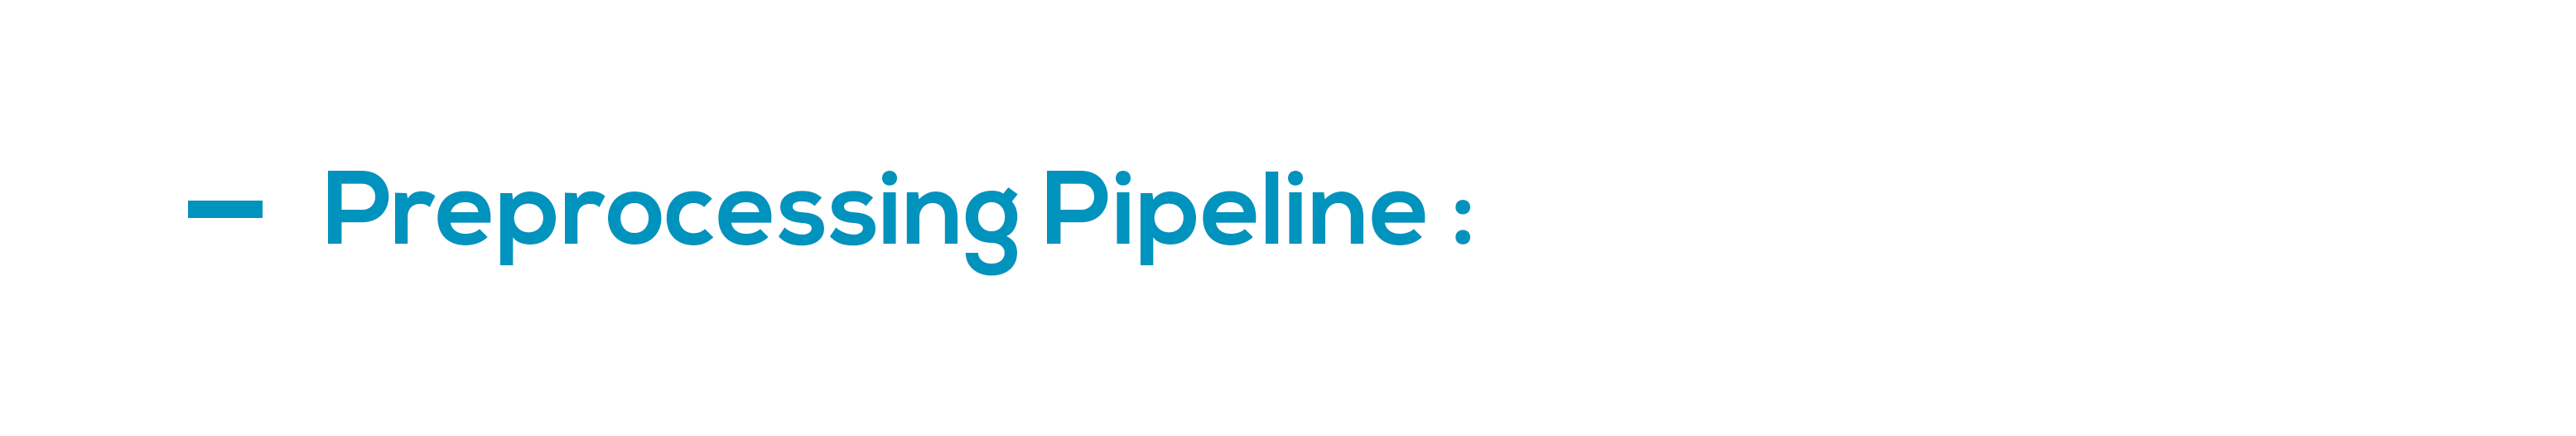

* there are two problems with `sklearn.compose.ColumnTransformer`:<br></br>
<ur>
    <b>1) </b> sklearn.compose.ColumnTransformer returns an array-like, spars matrix of shape, not a pandas.DataFrame which is a problem if your later actions require a DataFrame-like of shape, for example if you are creating a pipeline in which the function that comes after the ColumnTransformer in pipline's steps requires a DataFrame as an input <br></br>
    <b>2) </b> because of the fact that ColumnTransformer returns an array-like, spars matrix of shape, the names of the columns will be lost during this procedure
</ur>

<b>so first we are going to create a function using sklearn.compose.ColumnTransformer that solves the two problems that have been mentioned above :</b>

In [101]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class DataFrameColumnTransformer(BaseEstimator, TransformerMixin):
    
    '''
    sklearn.compose.ColumnTransformer return an array-like, sparse matrix of shape
    using this function we make it to return a pandas dataframe of transformed columns
    '''
    
    def __init__(self, transformers):
        # a list of transformers for specefic columns
        # each transformer should be inside of a tuple
        self.transformers = transformers          
        
    def fit(self, Data, y = None):
        
        from sklearn.compose import ColumnTransformer
        
        Transformer = ColumnTransformer(transformers=self.transformers, remainder='passthrough')
        self.col_transformer = Transformer.fit(Data)
        
        def get_feature_names(column_transformer):
            
            import sklearn
            """Get feature names from all transformers.
            Returns
            -------
            feature_names : list of strings
                Names of the features produced by transform.
            """
            # Remove the internal helper function
            #check_is_fitted(column_transformer)

            # Turn loopkup into function for better handling with pipeline later
            def get_names(trans):
                # >> Original get_feature_names() method
                if trans == 'drop' or (
                        hasattr(column, '__len__') and not len(column)):
                    return []
                if trans == 'passthrough':
                    if hasattr(column_transformer, '_df_columns'):
                        if ((not isinstance(column, slice))
                                and all(isinstance(col, str) for col in column)):
                            return column
                        else:
                            return column_transformer._df_columns[column]
                    else:
                        indices = np.arange(column_transformer._n_features)
                        return ['x%d' % i for i in indices[column]]
                if not hasattr(trans, 'get_feature_names'):
                # >>> Change: Return input column names if no method avaiable
                    # Turn error into a warning
                    warnings.warn("Transformer %s (type %s) does not "
                                         "provide get_feature_names. "
                                         "Will return input column names if available"
                                         % (str(name), type(trans).__name__))
                    # For transformers without a get_features_names method, use the input
                    # names to the column transformer
                    if column is None:
                        return []
                    else:
                        return [name + "__" + f for f in column]

                return [name + "__" + f for f in trans.get_feature_names()]

            ### Start of processing
            feature_names = []

            # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
            if type(column_transformer) == sklearn.pipeline.Pipeline:
                l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
            else:
                # For column transformers, follow the original method
                l_transformers = list(column_transformer._iter(fitted=True))


            for name, trans, column, _ in l_transformers: 
                if type(trans) == sklearn.pipeline.Pipeline:
                    # Recursive call on pipeline
                    _names = get_feature_names(trans)
                    # if pipeline has no transformer that returns names
                    if len(_names)==0:
                        _names = [name + "__" + f for f in column]
                    feature_names.extend(_names)
                else:
                    feature_names.extend(get_names(trans))

            return feature_names
        
        
        self.columns_names = list()

        for col in get_feature_names(self.col_transformer):
            if len( col.split('__') ) > 1 :
                self.columns_names.append(col.split('__')[-1])
            else:
                self.columns_names.append( Data.iloc[:,[ int( col.split('x')[-1] ) ]].columns[0] )

        
        return self
        
        
    def transform(self, Data):
        
        # make sure that it was fitted
        check_is_fitted(self, 'col_transformer')
        check_is_fitted(self, 'columns_names')
        
        Data = Data.copy() # This is so we do not make changes to the original dataframe
        Transformed = pd.DataFrame( self.col_transformer.transform(Data),
                                   columns=self.columns_names,
                                   index=Data.index).loc[:,Data.columns]

     
        return Transformed

## Step I: Noise-Outliers " Transformer " :

In [102]:
# here are the columns that include noise

noise_col

{'zeros': ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']}

In [103]:
# here are the columns that include outliers and the methods to manage these outliers

outlier_col

{'iqr': ['Pregnancies', 'Age'],
 'zscore': ['BloodPressure', 'SkinThickness', 'BMI'],
 'mad': ['Glucose', 'DiabetesPedigreeFunction'],
 'nullify': ['Insulin']}

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [105]:
noise_outlier_iqr = Pipeline(
    steps=[
        ( 'outliers_management_iqr', outliers_management_iqr() )
    ]
)

noise_outlier_zscore = Pipeline(
    steps=[
        ( 'noise_management', noise_management_zeros() ),
        ( 'outliers_management_zscore', outliers_management_zscore() )
    ]
)

noise_outlier_mad = Pipeline(
    steps=[
        ( 'noise_management', noise_management_zeros() ),
        ( 'outliers_management_mad', outliers_management_mad() )
    ]
)

noise_outlier_nullify = Pipeline(
    steps=[
        ( 'noise_management', noise_management_zeros() ),
        ( 'outliers_management_nullify', outliers_management_nullify() )
    ]
)

In [106]:
# using the function we created above (DataFrameColumnTransformer) to manage columns that include noise or outliers

noise_outlier_transformer = DataFrameColumnTransformer(
    transformers=[
        ("outlier_transformer_iqr", noise_outlier_iqr, outlier_col["iqr"]),
        ("outlier_transformer_zscore", noise_outlier_zscore, outlier_col["zscore"]),
        ("outlier_transformer_mad", noise_outlier_mad, outlier_col["mad"]),
        ("outlier_transformer_nullify", noise_outlier_nullify, outlier_col["nullify"]),
    ]
)

## Step II: adding Imputation and Scaler

In [107]:
preprocessor = Pipeline(
    steps=[
        ('noise_outlier_transformer', noise_outlier_transformer),
        ('KNNImputer', DataFrameKNNImputer() ),
        ('Scaler', DataFrameMinMaxScaler() )
    ]
)

* now just to check out our Preprocessor pipline and its reliability, we compare it to `X_copy` DataFrame which we have applied every steps of preparing on it:

In [108]:
( X_copy == preprocessor.fit_transform(X) ).all()

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
dtype: bool

* `X_copy` and `preprocessor.fit_transform(X)` are the same, hence ***the Preprocessor Pipline Works Perfectly***

## Step III: adding SMOTE

In [109]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [110]:
imb_preprocessor = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) )
    ]
)

In [111]:
X_copy, y_copy = imb_preprocessor.fit_resample(X,y)

* now just to check out our Preprocessor pipline and its reliability, we compare it to `X_copy_bal` DataFrame which we have applied every steps of preparing on it, plus we used SMOTE method to balancec the binary classes:

In [112]:
( X_copy == X_copy_bal ).all()

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
dtype: bool

* `X_copy` and `X_copy_bal` are the same, hence ***the Preprocessor Pipline Works Perfectly***

# End of Preprocessing

now we have a `Preprocessor Pipeline` to do all the preparing steps at once
* <u>but why did we bother to create this pipe line? and why didn't we apply any of the changes on our Original DataFrame `(X)`</u> ? <br></br>
    the answer: `to AVOID LEAKAGE`
    <br></br>The key benefit of building a pipeline is **improved readability**. Pipelines are able to execute a series of transformations with one call, allowing users to attain results with less code. but more importantly by using `Pipeline` we avoid any kind of `Data Leakage` meaning that along side the estimator, the preprocessing steps will only be **FITTED** on the **TRAIN** data and the **Validation** data will remain unseen

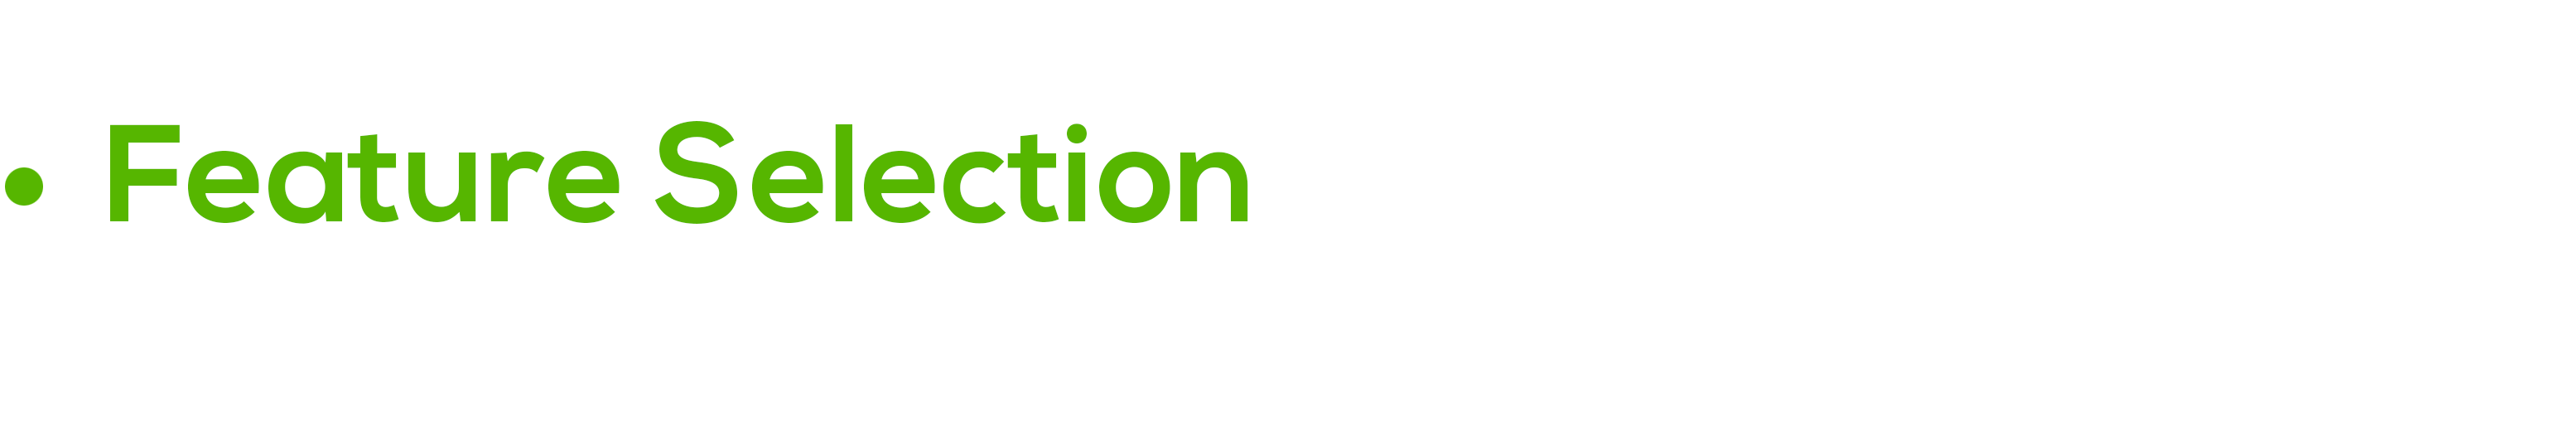

* in this section, we are going to find the best combination of Features to use for the Modling step

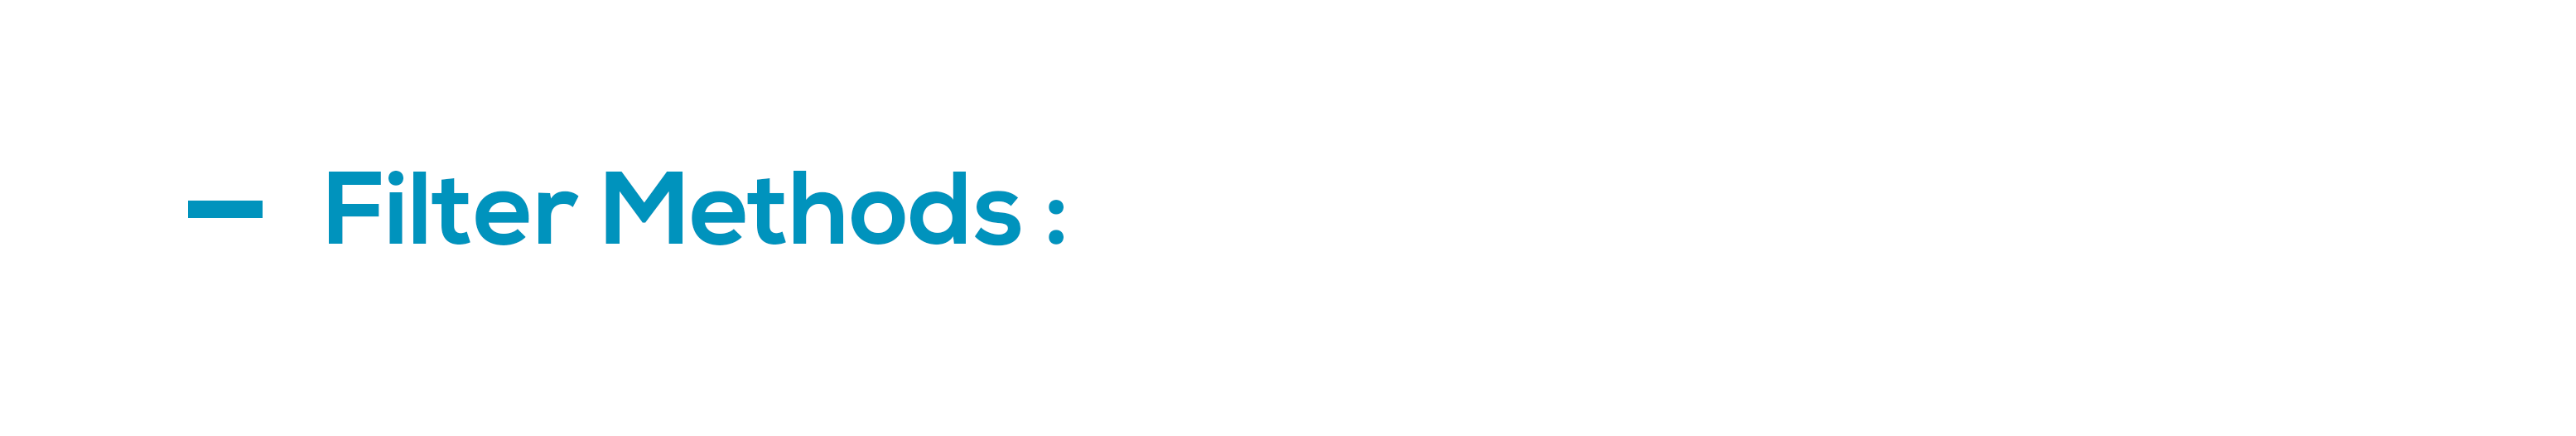

## Statistical Tests

* A statistical test is a way to determine whether the random variable is following the null hypothesis or alternate hypothesis. It basically tells whether two/ more samples have significant differences.<br></br>

We will be using Pima Inians Diabetes features and check whether one feature effect affects other features using **ANOVA F-value Test** and **Pearson Correlation Coefficient**

* ANOVA stands for Analysis of variance. As the name, suggests it uses variance as its parameter to compare multiple independent groups. <br></br>

* The procedure for implementing each statistical test will be as follows<b></b>
<ur> :
    * If `p-value> 0.05` we accept the null hypothesis else we reject it <b></b>
</ur>
<br></br>

In [113]:
Corr = pd.concat([X_copy,y_copy], axis=1).corr()
Corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.140700,0.212578,0.108389,0.068175,0.008898,-0.029310,0.553324,0.233551
Glucose,0.140700,1.000000,0.214322,0.239276,0.623803,0.234803,0.104588,0.282148,0.501837
BloodPressure,0.212578,0.214322,1.000000,0.234059,0.150838,0.282819,0.025096,0.340933,0.185384
SkinThickness,0.108389,0.239276,0.234059,1.000000,0.280070,0.663969,0.115956,0.125437,0.313879
Insulin,0.068175,0.623803,0.150838,0.280070,1.000000,0.308516,0.103958,0.198127,0.337014
BMI,0.008898,0.234803,0.282819,0.663969,0.308516,1.000000,0.156333,0.021030,0.315637
DiabetesPedigreeFunction,-0.029310,0.104588,0.025096,0.115956,0.103958,0.156333,1.000000,0.022475,0.168379
Age,0.553324,0.282148,0.340933,0.125437,0.198127,0.021030,0.022475,1.000000,0.242226
Outcome,0.233551,0.501837,0.185384,0.313879,0.337014,0.315637,0.168379,0.242226,1.000000


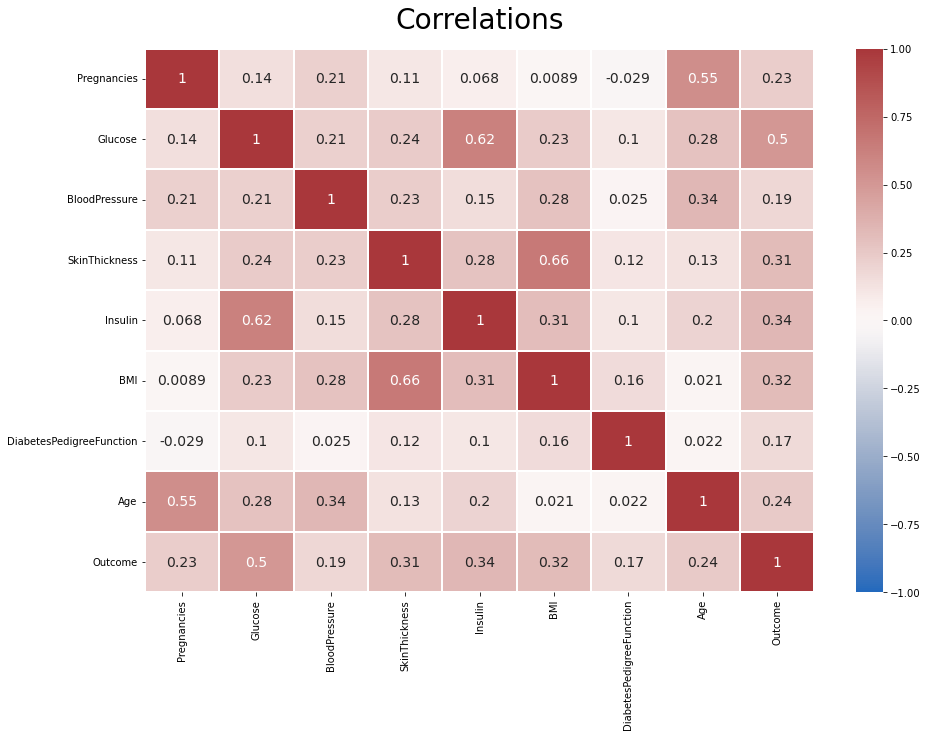

In [114]:
plt.figure( figsize=(15,10) )

heatmap = sns.heatmap(
    Corr,
    cmap="vlag",
    vmax=1,
    vmin=-1,
    annot=True,
    annot_kws={'fontsize':14},
    linewidths=0.1
)

heatmap.set_title("Correlations", fontsize=28, pad=20)
plt.show()

In [115]:
# best correlated features with "Outcome" (target)

best_corr = Corr[["Outcome"]].sort_values(by='Outcome',ascending=False)[1:]
best_corr.columns = ['Pearson Correlation']
best_corr

,Pearson Correlation
Glucose,0.501837
Insulin,0.337014
BMI,0.315637
SkinThickness,0.313879
Age,0.242226
Pregnancies,0.233551
BloodPressure,0.185384
DiabetesPedigreeFunction,0.168379


* by this statistical logic `Glucose` are the most correlated feature with the Target (Outcome)

### Checking for Multi-Collinearity:
* Correlation and ANOVA test for f_statistic and p-value

In [116]:
def highly_correlated(df, min_threshold):
    
    from sklearn.feature_selection import f_classif
    
    corr = df.corr()
    
    h_c = dict()
    cnt = 0
    
    for i in range( corr.shape[0] ):
        for j in range( corr.shape[1] ):
            if i > j:
                if corr.iloc[i,j] > min_threshold:
                    
                    h_c[cnt] = [
                        corr.index[i],
                        corr.columns[j],
                        corr.iloc[i,j],
                        round( f_classif( df[[corr.index[i]]], df[[corr.columns[j]]] )[0][0], 8),
                        round( f_classif( df[[corr.index[i]]], df[[corr.columns[j]]] )[1][0], 8) 
                    ]
                    
                    cnt += 1
                else:
                    pass
            else:
                pass
    
    highly_correlated = pd.DataFrame(
        h_c, index=["1st feature", "2nd feature", "correlation","f_statistic","p_values"]).T.sort_values(by="correlation", ascending=False)
    
    return highly_correlated.reset_index().drop("index", axis=1)

In [117]:
highly_correlated(X_copy, 0.3)

,1st feature,2nd feature,correlation,f_statistic,p_values
0,BMI,SkinThickness,0.663969,3.324932,0.0
1,Insulin,Glucose,0.623803,2.722,0.0
2,Age,Pregnancies,0.553324,3.063213,0.0
3,Age,BloodPressure,0.340933,1.291727,0.004706
4,BMI,Insulin,0.308516,1.050579,0.309756


* The correlation between `BMI` and `SkinThickness` is **0.663969** . by the rule of thumb, in case of an r **above 0.65**, `multi-collinearity` is highly expected. Hence, a significant case of multi-collinearity is observed.<br></br>
<ur>
    this suggest that to reach the best result and to avoid multi-collinearity, we should drop one of the two columns, the correlation between <b>BMI and Outcome</b> (r = 0.315637) is greater than the one between <b>SkinThickness and Outcome</b> (r = 0.313879) so <b>dropping the SkinThickness column</b> would be a wiser choice
    </ur>
<br></br>
* also the correlation between `Insulin` and `Glucose` (**0.623803**) is easily noticeable and might require an action later.

## VIF Analysis
* **`VIF = 1 / (1 - r_score^2)`**
* ***Variance Inflation Factor*** or ***VIF***, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. (key word: `multicollinearity`)
* **`VIF > 10` is dangerous** : possible `multicollinearity`

In [118]:
def CheckVIF(X):
    
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    
    #pythonic
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return(vif)

In [119]:
CheckVIF(X_copy)

,Features,VIF
3,SkinThickness,13.68
1,Glucose,12.97
5,BMI,12.21
2,BloodPressure,10.50
4,Insulin,7.82
7,Age,3.75
0,Pregnancies,3.53
6,DiabetesPedigreeFunction,2.75


* as we suspected before `BMI` and `SkinThickness` are causing a significant case of ***`multicollinearity`***. also `Glucose` with the VIF of 12.97 is an another suspect of multicollinearity.
* so let's drop `SkinThickness` as we suggested before, and see how VIFs will change:

In [120]:
CheckVIF( X_copy.drop(['SkinThickness'], axis=1) )

,Features,VIF
1,Glucose,12.76
2,BloodPressure,10.17
3,Insulin,7.81
4,BMI,7.29
6,Age,3.74
0,Pregnancies,3.49
5,DiabetesPedigreeFunction,2.73


* still not safe, as we discussed the correlation between `Insulin` and `Glucose` (0.655448) is also high enough to cause multicollinearity. `Glucose` has a greater correlation with the Target (r=0.501837), so it is wiser to drop `Insulin` instead :

In [121]:
CheckVIF( X_copy.drop(['SkinThickness','Insulin'], axis=1) )

,Features,VIF
2,BloodPressure,10.13
1,Glucose,8.02
3,BMI,6.94
5,Age,3.72
0,Pregnancies,3.48
4,DiabetesPedigreeFunction,2.73


* Again still not quite safe, by the tables above, we know that `Age` and `Pregnancies` are highly correlated (r=0.553324) also the correlation between `Age` and `BloodPressure` is relativity high (r=0.340933). Among these 3 features `BloodPressure` has the lowest correlation with the target. so let's see if by dropping **BloodPressure** we can get rid of the multicollinearity:

In [122]:
CheckVIF( X_copy.drop(['SkinThickness','Insulin', 'BloodPressure'], axis=1) )

,Features,VIF
1,Glucose,6.74
2,BMI,5.38
4,Age,3.56
0,Pregnancies,3.40
3,DiabetesPedigreeFunction,2.70


* It seems much safer in terms of multicollinearity now

### Best Features by Filter Method :

In [123]:
FS_Filter_Method = ( best_corr.drop(['SkinThickness','Insulin', 'BloodPressure']) ).reset_index()
FS_Filter_Method.rename(columns={'index':'Features'}, inplace=True)
FS_Filter_Method

,Features,Pearson Correlation
0,Glucose,0.501837
1,BMI,0.315637
2,Age,0.242226
3,Pregnancies,0.233551
4,DiabetesPedigreeFunction,0.168379


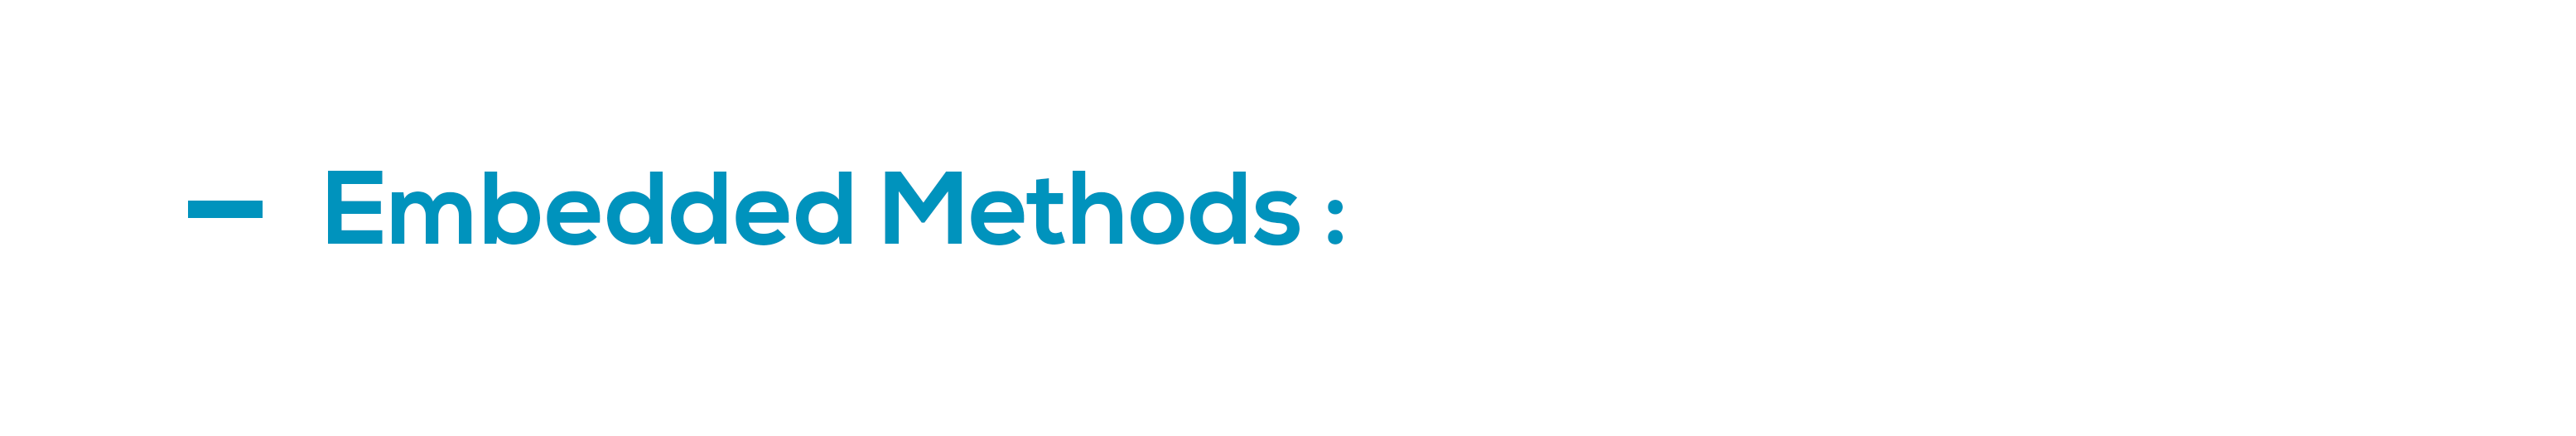

* In an embedded method, feature selection is integrated or built into the classifier algorithm. During the training step, the classifier adjusts its internal parameters and <u><b>determines the appropriate weights/importance given for each feature to produce the best classification accuracy**</b></u>
<br></br>
* here we are going to use one of the best classifiers, **Light Gradient Boosting Machine** to determine the importance of each feature

but first let's find the best **hyperparameters** for our **LGBMClassifier** by using **Bayesian Optimization** to tune our estimator :

In [124]:
import lightgbm
from skopt import BayesSearchCV
from skopt.callbacks import DeltaYStopper
from skopt.space import Real, Integer
from sklearn.model_selection import StratifiedKFold

In [125]:
overdone_control = DeltaYStopper(delta=0.00001)  # We stop if the gain of the optimization becomes too small
skf = StratifiedKFold(10, shuffle=True, random_state=42)

In [126]:
search_spaces = {
    'estimator__max_depth':Integer(3, 13),
    'estimator__num_leaves':Integer(20, 3000),
    'estimator__min_child_samples': Integer(1, 256),
    'estimator__subsample': Real(0.01, 1.0, 'uniform'),
    'estimator__subsample_freq': Integer(0, 10),
    'estimator__min_data_in_leaf':Integer(5, 100),
    'estimator__learning_rate':Real(0.01, 0.31, 'uniform'),
    'estimator__n_estimators':Integer(30, 5000),
    'estimator__reg_lambda': Real(0, 100.0, 'uniform'), 
    'estimator__reg_alpha': Real(0, 100.0, 'uniform'),
    'estimator__min_split_gain':Integer(0, 15),
    'estimator__colsample_bytree': Real(0.01, 1.0, 'uniform'),
    'estimator__min_child_weight': Real(0.01, 10.0, 'uniform')
}


lgbm_fs_opt = lightgbm.LGBMClassifier(
    objective='binary',
    metrics='logloss',
    random_state=42
)


lgbm_fs_pipe_opt = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', lgbm_fs_opt)
    ]
)

In [127]:
opt = BayesSearchCV(
    estimator=lgbm_fs_pipe_opt,
    search_spaces=search_spaces,
    scoring='f1',
    n_iter=100,
    fit_params={
        'estimator__eval_class_weight':[{0:0.349593,1:0.650407}],
        'estimator__eval_metric':['logloss']
    },
    n_points=2,
    n_jobs=-1,
    cv=skf,
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    return_train_score=True
)

In [128]:
opt.fit(X, y, callback=[overdone_control])

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=256 will be ignored. Current value: min_data_in_leaf=5


BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('noise_outlier_transformer',
                                         DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                   Pipeline(steps=[('outliers_management_iqr',
                                                                                                    outliers_management_iqr())]),
                                                                                   ['Pregnancies',
                                                                                    'Age']),
                                                                                  ('outlier_transformer_zscore',
                                                                                   Pipeline(steps=[('noise_man...
                             'estimator__num_leaves': Integer(low=

In [129]:
opt.best_estimator_

Pipeline(steps=[('noise_outlier_transformer',
                 DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                           Pipeline(steps=[('outliers_management_iqr',
                                                                            outliers_management_iqr())]),
                                                           ['Pregnancies',
                                                            'Age']),
                                                          ('outlier_transformer_zscore',
                                                           Pipeline(steps=[('noise_management',
                                                                            noise_management_zeros()),
                                                                           ('outliers_management_zscore',
                                                                            outliers_management_...
                ('SMO

In [130]:
opt.best_params_

OrderedDict([('estimator__colsample_bytree', 0.01),
             ('estimator__learning_rate', 0.01),
             ('estimator__max_depth', 3),
             ('estimator__min_child_samples', 256),
             ('estimator__min_child_weight', 10.0),
             ('estimator__min_data_in_leaf', 5),
             ('estimator__min_split_gain', 0),
             ('estimator__n_estimators', 5000),
             ('estimator__num_leaves', 2103),
             ('estimator__reg_alpha', 16.04003717596279),
             ('estimator__reg_lambda', 69.68858671082913),
             ('estimator__subsample', 0.9295801853030409),
             ('estimator__subsample_freq', 0)])

In [131]:
opt.best_score_

0.6857385546894514

In [133]:
cv_results = pd.DataFrame(
    opt.cv_results_
).loc[:, ['params', 'mean_test_score','rank_test_score','mean_train_score',
          'rank_train_score', 'std_test_score','std_train_score']].sort_values(
    by=['rank_test_score','rank_train_score'],ascending=[True,False]
)
cv_results.insert(1, 'Train/Test Difference', (cv_results['mean_train_score'] - cv_results['mean_test_score'])*100 )

cv_results.head()

,params,Train/Test Difference,mean_test_score,rank_test_score,mean_train_score,rank_train_score,std_test_score,std_train_score
97,"{'estimator__colsample_bytree': 0.01, 'estimat...",3.262305,0.685739,1,0.718362,14,0.056195,0.011931
76,{'estimator__colsample_bytree': 0.623958782229...,2.089414,0.681628,2,0.702522,36,0.055717,0.013876
18,{'estimator__colsample_bytree': 0.114566316937...,2.852447,0.680404,3,0.708928,26,0.066061,0.007201
87,"{'estimator__colsample_bytree': 0.01, 'estimat...",3.618060,0.679145,4,0.715326,17,0.059852,0.010037
42,"{'estimator__colsample_bytree': 0.01, 'estimat...",2.881144,0.678154,5,0.706965,30,0.060458,0.007318


* the second best estimator with the train/test difference of **2.09%** seems more reliable in terms of **overfitting** so we continue with that:

In [134]:
cv_results.loc[76]['params']

OrderedDict([('estimator__colsample_bytree', 0.6239587822299963),
             ('estimator__learning_rate', 0.31),
             ('estimator__max_depth', 13),
             ('estimator__min_child_samples', 1),
             ('estimator__min_child_weight', 1.1676415695405886),
             ('estimator__min_data_in_leaf', 91),
             ('estimator__min_split_gain', 0),
             ('estimator__n_estimators', 2692),
             ('estimator__num_leaves', 20),
             ('estimator__reg_alpha', 14.410438493272789),
             ('estimator__reg_lambda', 0.0),
             ('estimator__subsample', 0.4640026778586475),
             ('estimator__subsample_freq', 3)])

we are Good to Go to the next level:

# Feature Importance 
## for Feature Selection (Embedded Method)

In [135]:
lgbm_fs = lightgbm.LGBMClassifier(
    colsample_bytree=0.6239587822299963,
    learning_rate=0.31, max_depth=13,
    metrics='logloss', min_child_samples=1,
    min_child_weight=1.1676415695405886,
    min_data_in_leaf=91, min_split_gain=0,
    n_estimators=2692, num_leaves=20,
    objective='binary', random_state=42,
    reg_alpha=14.410438493272789,
    reg_lambda=0,
    subsample=0.4640026778586475,
    subsample_freq=3
)

In [136]:
def FeatureImportanceCV(model, X, y, k_split):
    
    from sklearn.model_selection import StratifiedKFold
    
    skf = StratifiedKFold(n_splits=k_split, shuffle=True, random_state=42)
    
    cols = pd.MultiIndex.from_product([list(np.arange(1,k_split+1)),['Features','Importance']])
    FI_cv = pd.DataFrame(columns=cols)
    
    cnt = 1
    for train_index, valid_index in skf.split(X,y):
    
        # features:
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    
        # targets:
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        # X_validation preprocessing
        prepare = preprocessor.fit(X_train)
        X_train = prepare.transform(X_train)
        X_valid = prepare.transform(X_valid)
        
        # balancing
        from imblearn.over_sampling import SMOTE
        smt = SMOTE(k_neighbors=40, random_state=42)
        
        X_train, y_train = smt.fit_resample(X_train, y_train)
        
    
        model.fit(X_train, y_train, eval_set=[(X_valid,y_valid)], eval_metric='logloss',
                  early_stopping_rounds=100, verbose=-1)
        
        
        cv_importance = pd.DataFrame({'Features':X.columns, 'Importance':model.feature_importances_})
        FI_cv[cnt] = cv_importance
        
        cnt += 1
    
    importance_dict = dict()
    for idx in FI_cv.index:

        temp_imp = list()

        for cv in range(1, 6):
            temp_imp.append(FI_cv[cv]['Importance'].iloc[idx])

        importance_dict[FI_cv[1]['Features'].iloc[idx]] = temp_imp



    cols = pd.MultiIndex.from_product([['Mean'],['Features','Importance']])
    mean_df = pd.DataFrame(columns=cols)

    for idx, feature in enumerate( list(importance_dict.keys()) ):
        mean_df.loc[idx] = [feature, np.mean( importance_dict[feature] )]
    
    mean_df = mean_df.sort_values(by=[('Mean','Importance')], ascending=False).reset_index().drop('index',axis=1)


    
    for idx in range(1,k_split+1):
        FI_cv[idx] = FI_cv[idx].sort_values(by='Importance', ascending=False).reset_index().drop('index',axis=1)
        
    FI_cv = pd.concat([FI_cv, mean_df], axis=1)
    
    return FI_cv

In [137]:
FeatureImportanceCV = FeatureImportanceCV(lgbm_fs, X, y, k_split=10)
FeatureImportanceCV

1                                    2             \
                   Features Importance                  Features Importance   
0                   Glucose         21                   Glucose         36   
1                       Age         11             SkinThickness         16   
2                       BMI         10                       BMI         16   
3  DiabetesPedigreeFunction         10                       Age         13   
4                   Insulin          8  DiabetesPedigreeFunction          9   
5             SkinThickness          6                   Insulin          8   
6               Pregnancies          4               Pregnancies          5   
7             BloodPressure          0             BloodPressure          0   

                          3                                    4             \
                   Features Importance                  Features Importance   
0                   Glucose         43                   Glucose         25   
1               Pregnancies         26                       BMI         14   
2  DiabetesPedigreeFunction         24                       Age         14   
3             SkinThickness         21  DiabetesPedigreeFunction         11   
4                       BMI         21                   Insulin          8   
5                       Age         19             SkinThickness          6   
6                   Insulin         16               Pregnancies          5   
7             BloodPressure          3             BloodPressure          0   

                          5             ...                         7  \
                   Features Importance  ...                  Features   
0                   Glucose         28  ...                   Glucose   
1  DiabetesPedigreeFunction         26  ...             SkinThickness   
2               Pregnancies         16  ...                       Age   
3                       BMI         13  ...                       BMI   
4                       Age         10  ...  DiabetesPedigreeFunction   
5             SkinThickness          9  ...                   Insulin   
6                   Insulin          3  ...             BloodPressure   
7             BloodPressure          1  ...               Pregnancies   

                                     8                                    9  \
  Importance                  Features Importance                  Features   
0         19                   Glucose         73                   Glucose   
1          7                       Age         27                       Age   
2          7                       BMI         23                       BMI   
3          6                   Insulin         16                   Insulin   
4          6               Pregnancies         15             SkinThickness   
5          4  DiabetesPedigreeFunction         14               Pregnancies   
6          2             SkinThickness         11  DiabetesPedigreeFunction   
7          1             BloodPressure          0             BloodPressure   

                                    10                                 Mean  \
  Importance                  Features Importance                  Features   
0         30                   Glucose         10                   Glucose   
1         15  DiabetesPedigreeFunction          9  DiabetesPedigreeFunction   
2         14                       BMI          8                       BMI   
3         12                       Age          7                       Age   
4         10                   Insulin          6             SkinThickness   
5          7               Pregnancies          4               Pregnancies   
6          7             SkinThickness          4                   Insulin   
7          0             BloodPressure          0             BloodPressure   

              
  Importance  
0       30.6  
1       16.0  
2       14.8  
3       13.4  
4       11.6  
5       11.2  
6        8.

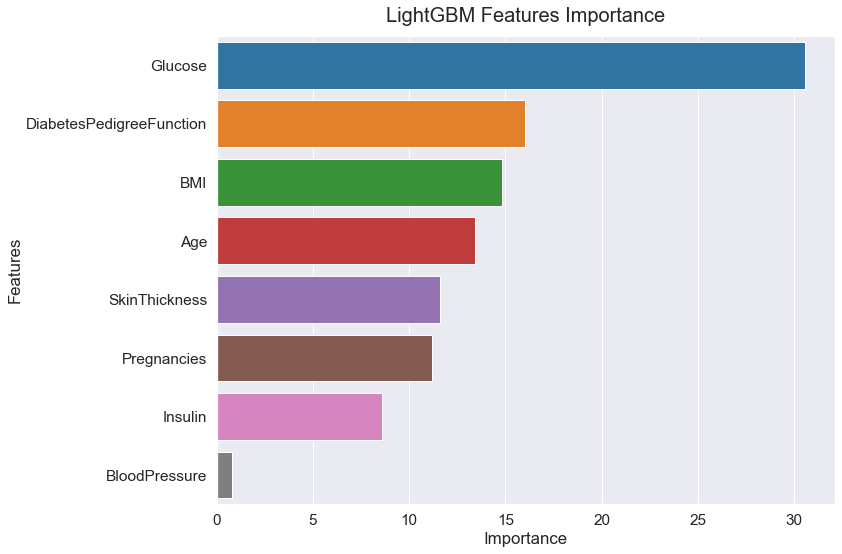

In [138]:
# notification: X_copy = preprocessor.fit_transform(X)

plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.4)

sns.barplot(
    x="Importance", y="Features",
    data=FeatureImportanceCV['Mean'],
    palette='tab10'
)

plt.title('LightGBM Features Importance', fontsize=20, pad=14)

plt.tight_layout()
plt.show()

# this lgb model is just fitted on train dataset

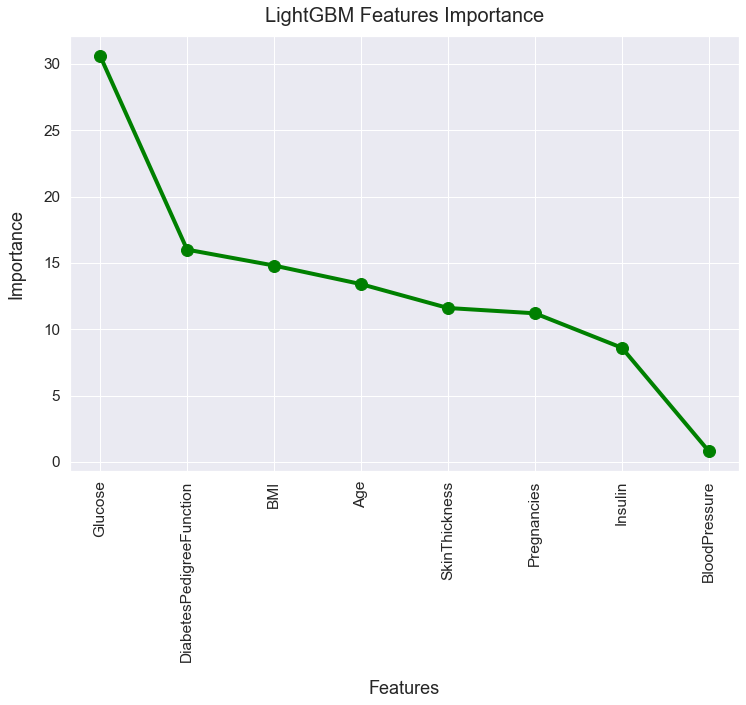

In [139]:
# another way of feature importance visualizing

plt.figure( figsize=(12, 8) )

plt.plot(FeatureImportanceCV['Mean']['Features'],
         FeatureImportanceCV['Mean']['Importance'],
         linewidth=4, markersize=12,marker='o',color = 'green')

plt.xticks( FeatureImportanceCV['Mean']['Features'],rotation=90 )
plt.title('LightGBM Features Importance', fontsize=20, pad=14)
plt.xlabel("Features", fontsize=18, labelpad=18)
plt.ylabel("Importance", fontsize=18, labelpad=18)


plt.show()

* Based on ***Embedded Method*** the best feature combinations with the highest ***Feature Importance*** are these **4 features:** <br></br>
`Glucose` , `DiabetesPedigreeFunction` , `BMI` , `Age`

In [140]:
FS_Embedded_Method = FeatureImportanceCV['Mean']
FS_Embedded_Method

,Features,Importance
0,Glucose,30.6
1,DiabetesPedigreeFunction,16.0
2,BMI,14.8
3,Age,13.4
4,SkinThickness,11.6
5,Pregnancies,11.2
6,Insulin,8.6
7,BloodPressure,0.8


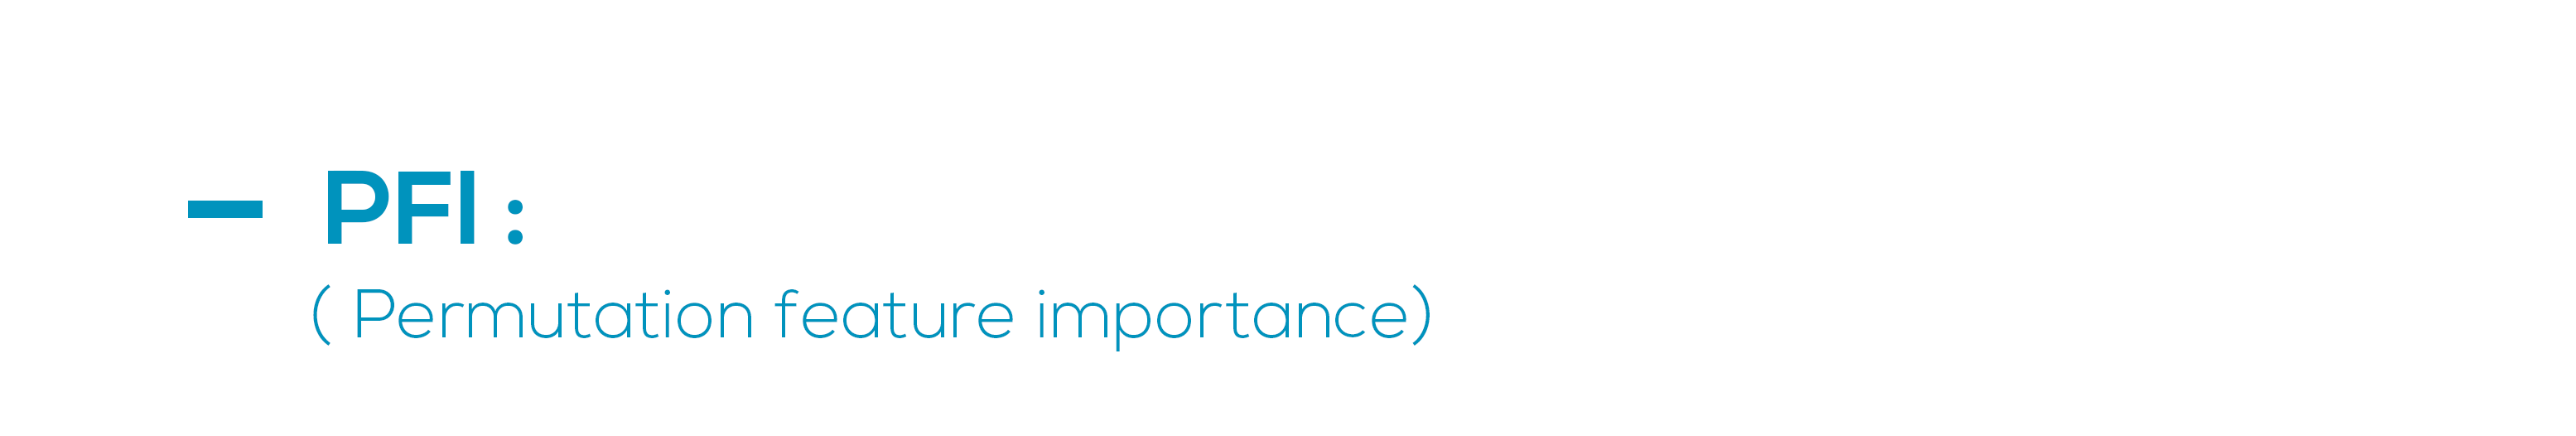

* `Permutation Feature Importance` is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. **The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature**. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.
<br></br>
* Warning Features that are deemed of low importance for a bad model (low cross-validation score) could be very important for a good model. Therefore it is always important to evaluate the predictive power of a model using a held-out set (or better with cross-validation) prior to computing importances. Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model.

* we are going to use the previous **lgbm pipeline** that we used to estimate the importance of features, also for better result using cross-validation is a must to do:

In [290]:
def PFI_cv(model, X, y, k_split):
    
    import eli5
    from eli5.sklearn import PermutationImportance
    from sklearn.model_selection import StratifiedKFold
    
    skf = StratifiedKFold(n_splits=k_split, shuffle=True, random_state=42)
    
    cols = pd.MultiIndex.from_product([list(np.arange(1,k_split+1)),['feature','weight','std']])
    PFI_cv = pd.DataFrame(columns=cols)
    
    cnt = 1
    for train_index, valid_index in skf.split(X,y):
    
        # features:
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
            
        # targets:
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        
        # X_validation preprocessing
        prepare = preprocessor.fit(X_train)
        X_train = prepare.transform(X_train)
        X_valid = prepare.transform(X_valid)
        
        # balancing
        from imblearn.over_sampling import SMOTE
        smt = SMOTE(k_neighbors=40, random_state=42)
        
        X_train, y_train = smt.fit_resample(X_train, y_train)
        
    
        model.fit(X_train, y_train, eval_set=[(X_valid,y_valid)], eval_metric='logloss',
                  early_stopping_rounds=100, verbose=-1)
        
        
        perm = PermutationImportance(model,random_state=1996).fit(X_valid, y_valid)
        
        cv_weights = eli5.format_as_dataframe(eli5.explain_weights(perm))
        PFI_cv[cnt] = cv_weights
        
        cnt += 1
        
    all_weights_std = dict()
    for k in range(1, k_split+1):

        each_cv_values=dict()
        for i in PFI_cv.index:

            feature = PFI_cv[k]['feature'][i]
            weight = PFI_cv[k]['weight'][i]
            std = PFI_cv[k]['std'][i]

            each_cv_values[feature] = {'weight':weight, 'std':std}

        all_weights_std[k] = each_cv_values


    cols = pd.MultiIndex.from_product([['Mean'],['feature','weight','std']])
    mean_df = pd.DataFrame(columns=cols)
    cnt=0
    for f in list(all_weights_std[1].keys()):

        feature_w = list()
        feature_s = list()

        for k in range(1, k_split+1):

            feature_w.append( all_weights_std[k][f]['weight'] )
            feature_s.append( all_weights_std[k][f]['std'] )

        mean_df.loc[cnt] = [f, np.mean(feature_w), np.mean(feature_s)]
        cnt+=1

    mean_df = mean_df.sort_values(by=[('Mean','weight')], ascending=False).reset_index().drop('index',axis=1)
    
    PFI_cv = pd.concat([PFI_cv, mean_df],axis=1)
        
        
    return PFI_cv

In [142]:
pfi = PFI_cv(lgbm_fs, X, y, k_split=10)

[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] min_data_in

In [143]:
pfi

1                           2                           3            \
  feature    weight       std feature    weight       std feature    weight   
0      x1  0.089189  0.034822      x1  0.121622  0.040989      x1  0.040541   
1      x6  0.032432  0.020225      x3  0.032432  0.021957      x6  0.008108   
2      x0  0.002703  0.005405      x5  0.021622  0.020225      x2       0.0   
3      x2       0.0       0.0      x7  0.018919  0.013781      x5 -0.002703   
4      x5 -0.008108  0.021957      x0  0.010811  0.010113      x0 -0.002703   
5      x7 -0.013514  0.024174      x6  0.002703   0.01324      x3 -0.010811   
6      x4 -0.021622  0.013781      x4       0.0  0.012087      x7 -0.013514   
7      x3 -0.021622  0.016216      x2       0.0       0.0      x4 -0.013514   

                  4  ...         8       9                          10  \
        std feature  ...       std feature    weight       std feature   
0  0.040989      x1  ...  0.025064      x1  0.167123  0.015975      x1   
1  0.018331      x5  ...  0.049097      x5  0.084932   0.04191      x0   
2       0.0      x7  ...  0.028346      x3  0.021918   0.01397      x6   
3  0.027562      x6  ...  0.030338      x7  0.019178  0.026844      x4   
4  0.010113      x4  ...  0.016216      x0  0.008219  0.010959      x7   
5  0.015759      x2  ...  0.005405      x2       0.0       0.0      x3   
6  0.019111      x0  ...       0.0      x6      -0.0  0.008664      x5   
7  0.019111      x3  ...  0.031979      x4 -0.010959  0.015975      x2   

                         Mean                      
     weight       std feature    weight       std  
0  0.076712  0.038356      x1  0.100059  0.038026  
1  0.043836  0.013422      x5  0.023643  0.026725  
2  0.035616  0.018582      x7  0.018438  0.022661  
3  0.032877  0.026844      x6  0.013021  0.016019  
4  0.024658  0.021918      x3  0.007345  0.015102  
5  0.013699  0.008664      x0  0.006557  0.007582  
6  0.010959  0.015975      x2 -0.001622  0.000541  
7       0.0       0.0      x4 -0.003214  0.016248  

[8 rows x 33 columns]

In [144]:
FS_PFI_Method = pfi["Mean"]
FS_PFI_Method['feature']=FS_PFI_Method['feature'].apply(lambda i : X.columns[int(i.split('x')[-1])] )

FS_PFI_Method

,feature,weight,std
0,Glucose,0.100059,0.038026
1,BMI,0.023643,0.026725
2,Age,0.018438,0.022661
3,DiabetesPedigreeFunction,0.013021,0.016019
4,SkinThickness,0.007345,0.015102
5,Pregnancies,0.006557,0.007582
6,BloodPressure,-0.001622,0.000541
7,Insulin,-0.003214,0.016248


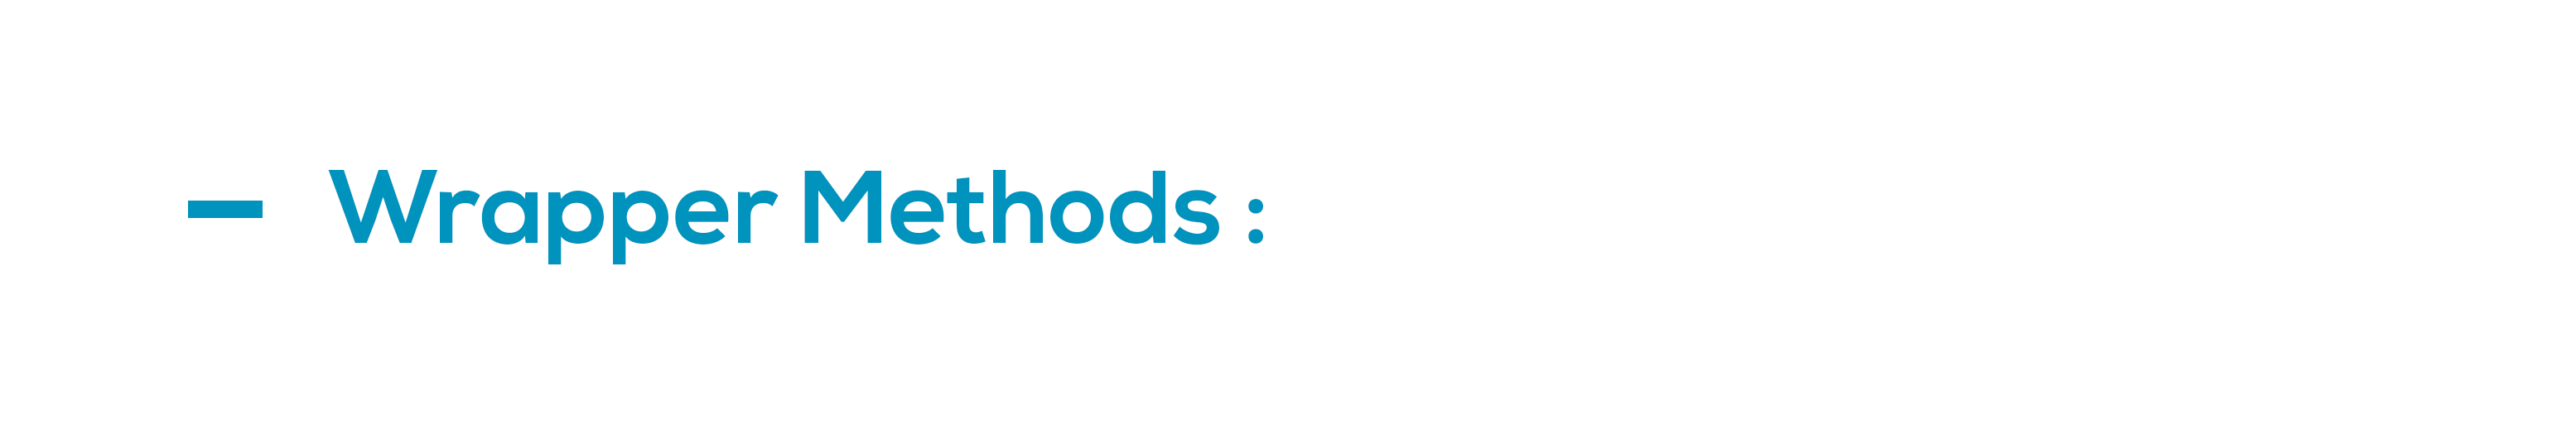

* **Wrapper Method** is a process of selecting the most significant and relevant features from a vast set of features in the given dataset.
<br></br>
* here we are going to use **Logistic Regression** to determine which combination of features gives us the highest accuracy:

but first let's find the best **hyperparameters** for our **LogisticRegression** by using **Bayesian Optimization** to tune our estimator :

In [145]:
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.linear_model import LogisticRegression

In [146]:
skf = StratifiedKFold(10, shuffle=True, random_state=42)
overdone_control = DeltaYStopper(delta=0.0001)  # We stop if the gain of the optimization becomes too small

logreg_wrp = LogisticRegression( random_state=42 )

logreg_wrp_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', logreg_wrp)
    ]
)

In [147]:
search_spaces = [
    {'estimator__penalty': ['l2'],
     'estimator__C': Real(0.01,100,'uniform'),
     'estimator__solver':['lbfgs','newton-cg','liblinear','sag','saga']},
    {'estimator__penalty': ['l1'],
     'estimator__C': Real(0.01,100,'uniform'),
     'estimator__solver':['liblinear','saga']},
    {'estimator__penalty': ['none'],
     'estimator__C': Real(0.01,100,'uniform'),
     'estimator__solver':['lbfgs','newton-cg','sag','saga'],
     'estimator__warm_start':[True]},
    {'estimator__penalty': ['elasticnet'],
     'estimator__C': Real(0.01,100,'uniform'),
     'estimator__solver':['saga'],
     'estimator__warm_start':[True],
     'estimator__l1_ratio': Real(0.01,0.99,'uniform')}
]

In [148]:
opt = BayesSearchCV(
    estimator=logreg_wrp_pipe,
    search_spaces=search_spaces,
    scoring='f1',
    n_iter=100,
    n_points=2,
    n_jobs=-1,
    cv=skf,
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    return_train_score=True
)

In [149]:
opt.fit(X, y, callback=[overdone_control])

BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('noise_outlier_transformer',
                                         DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                   Pipeline(steps=[('outliers_management_iqr',
                                                                                                    outliers_management_iqr())]),
                                                                                   ['Pregnancies',
                                                                                    'Age']),
                                                                                  ('outlier_transformer_zscore',
                                                                                   Pipeline(steps=[('noise_man...
                              'estimator__penalty': ['none'],
    

In [150]:
opt.best_estimator_

Pipeline(steps=[('noise_outlier_transformer',
                 DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                           Pipeline(steps=[('outliers_management_iqr',
                                                                            outliers_management_iqr())]),
                                                           ['Pregnancies',
                                                            'Age']),
                                                          ('outlier_transformer_zscore',
                                                           Pipeline(steps=[('noise_management',
                                                                            noise_management_zeros()),
                                                                           ('outliers_management_zscore',
                                                                            outliers_management_...
                     

In [151]:
opt.best_params_

OrderedDict([('estimator__C', 4.024963324788565),
             ('estimator__l1_ratio', 0.64080968878923),
             ('estimator__penalty', 'elasticnet'),
             ('estimator__solver', 'saga'),
             ('estimator__warm_start', True)])

In [152]:
opt.best_score_

0.6739213165330595

In [155]:
cv_results = pd.DataFrame( opt.cv_results_ )
cv_results = cv_results.loc[:,
                            ['params', 'mean_test_score', 'rank_test_score', 'mean_train_score',
                             'rank_train_score', 'std_test_score', 'std_train_score']
                           ]
cv_results = cv_results.sort_values(by=['rank_test_score','rank_train_score'], ascending=[True,False])
cv_results.head()

,params,mean_test_score,rank_test_score,mean_train_score,rank_train_score,std_test_score,std_train_score
113,"{'estimator__C': 6.207901319344682, 'estimator...",0.673921,1,0.685855,95,0.052314,0.007741
82,"{'estimator__C': 5.209579746124794, 'estimator...",0.673921,1,0.686136,78,0.052314,0.008276
43,"{'estimator__C': 4.024963324788565, 'estimator...",0.673921,1,0.686432,60,0.052314,0.008554
112,"{'estimator__C': 6.513549912000995, 'estimator...",0.673921,1,0.686643,41,0.052314,0.007582
71,"{'estimator__C': 4.716092397086108, 'estimator...",0.673921,1,0.686684,3,0.052314,0.008272


* the best estimator given by Bayesian Optimization has a difference of only **1.19 %** between mean_train_score and mean_test_score. so we are definitely **not facing an over fitting** case here.
<br></br>
we are Good to Go to the next level:

# Exhaustive Feature Selector
* The most straightforward approach for feature selection is an **Exhaustive** search (which is a wrapper method): one can **go over all possible feature combinations** and pick up the model with **the highest accuracy**

In [157]:
logreg_wrp = LogisticRegression(
    C=4.024963324788565, penalty='elasticnet',
    l1_ratio=0.64080968878923, warm_start=True,
    random_state=42, solver='saga'
)

In [158]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [159]:
efs = EFS( logreg_wrp, min_features= 1, max_features= 8, scoring='f1', cv=skf )
efs.fit(X_copy, y_copy)

Features: 255/255

ExhaustiveFeatureSelector(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                          estimator=LogisticRegression(C=4.024963324788565,
                                                       l1_ratio=0.64080968878923,
                                                       penalty='elasticnet',
                                                       random_state=42,
                                                       solver='saga',
                                                       warm_start=True),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7]],
                          max_features=8, scoring='f1')

In [160]:
efs.best_score_

0.7591968271241233

In [161]:
efs.best_feature_names_

('Pregnancies', 'Glucose', 'SkinThickness', 'Insulin')

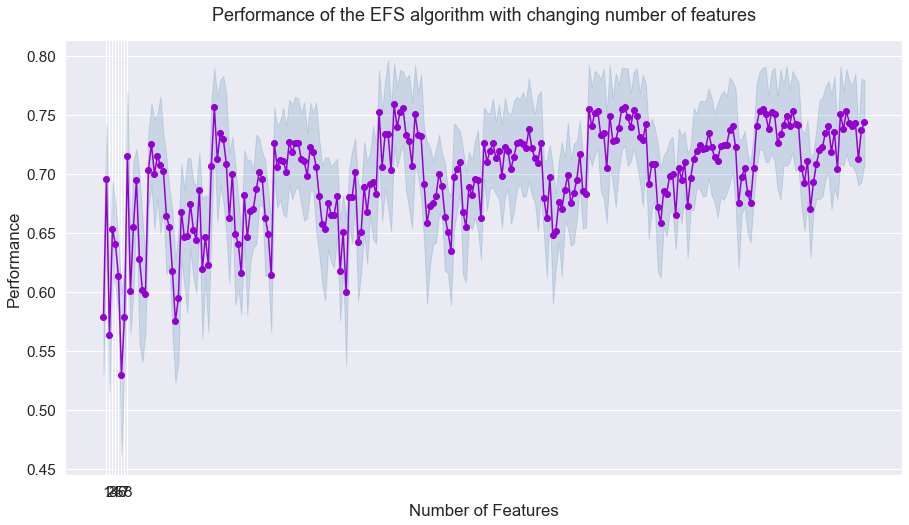

In [162]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plot_sfs(efs.get_metric_dict(), kind='std_dev', color='darkviolet', figsize=(15,8) )
plt.title('Performance of the EFS algorithm with changing number of features', fontsize=18 ,pad=20)
plt.show()

* but let's see how **Meaningful** (in terms of ***`Level of Significance`***) are these features.
* to do so we will use **statsmodels** library which uses **Z-test** to determine the Level of Significance of each feature's Logistic Regression coefficient<br></br>
:<ur>
    * null hypothesis (H_0): <b> coef = 0 </b>
    * alternativeh hypothesis (H_1): <b> coef != 0 </b>
    * p_value<0.05: <b> reject H_0 </b>
    * p_value>0.05: <b> accept H_0 (failed to reject H_0) </b>
    <ur>

In [163]:
def LogReg_LOS(X, y):
    
    from statsmodels.api import Logit, add_constant
    
    X_c = add_constant(X)
    logit_model = Logit(y,X_c)
    result = logit_model.fit()
    
    Tests = pd.concat(
        [round( result.params.iloc[1:] , 6),
         round( result.tvalues.iloc[1:] , 6),
         round( result.pvalues.iloc[1:] , 6)], axis=1
    )
    
    Tests.columns = ['coef','Z-values (Z-test)', 'p_value']
    
    return Tests

In [164]:
LogReg_LOS(
    X_copy[['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin']], y_copy
)

Optimization terminated successfully.
         Current function value: 0.510022
         Iterations 6


,coef,Z-values (Z-test),p_value
Pregnancies,1.676353,5.198749,0.000000
Glucose,6.198863,10.414969,0.000000
SkinThickness,3.373375,6.394572,0.000000
Insulin,0.018221,0.026342,0.978985


* `Insulin` p-value = 98% : complete failure of rejecting H_0, checking the Level of Significance without **Insulin**

In [165]:
LogReg_LOS(
    X_copy[['Pregnancies', 'Glucose', 'SkinThickness']], y_copy
)

Optimization terminated successfully.
         Current function value: 0.510023
         Iterations 6


,coef,Z-values (Z-test),p_value
Pregnancies,1.676035,5.201184,0.0
Glucose,6.207335,12.390598,0.0
SkinThickness,3.375594,6.481430,0.0


* all **p-values** under 5%, but now let's check for **multicollinearity** using `VIF` :

In [166]:
CheckVIF(X_copy[['Pregnancies', 'Glucose', 'SkinThickness']])

,Features,VIF
1,Glucose,6.06
2,SkinThickness,5.87
0,Pregnancies,2.44


* **VIF** for all the remaining features is under 10:<br></br>

* Based on all ***Wrapper Method***s the best feature combinations are these **3 features:** <br></br>

In [167]:
FS_Wrapper_Method = pd.DataFrame({'Features':['Pregnancies','Glucose','SkinThickness']})
FS_Wrapper_Method

,Features
0,Pregnancies
1,Glucose
2,SkinThickness


* also there is no significant case of multicollinearity:

# Final Step of Feature Selection

In [169]:
FS_Filter_Method

,Features,Pearson Correlation
0,Glucose,0.501837
1,BMI,0.315637
2,Age,0.242226
3,Pregnancies,0.233551
4,DiabetesPedigreeFunction,0.168379


In [170]:
FS_Wrapper_Method

,Features
0,Pregnancies
1,Glucose
2,SkinThickness


In [171]:
FS_Embedded_Method

,Features,Importance
0,Glucose,30.6
1,DiabetesPedigreeFunction,16.0
2,BMI,14.8
3,Age,13.4
4,SkinThickness,11.6
5,Pregnancies,11.2
6,Insulin,8.6
7,BloodPressure,0.8


In [172]:
FS_PFI_Method

,feature,weight,std
0,Glucose,0.100059,0.038026
1,BMI,0.023643,0.026725
2,Age,0.018438,0.022661
3,DiabetesPedigreeFunction,0.013021,0.016019
4,SkinThickness,0.007345,0.015102
5,Pregnancies,0.006557,0.007582
6,BloodPressure,-0.001622,0.000541
7,Insulin,-0.003214,0.016248


* in conclusion by comparing the features suggest by each selection method, the best combination of features seems to be these **six features**:<br></br>
`Pregnancies` , `Glucose` , `BMI` , `SkinThickness` , `DiabetesPedigreeFunction` , `Age`

so now let's add <b>another step to the preprocessor pipeline</b>; aka the <b>feature selection</b> step :

In [124]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class FeatureSelection(BaseEstimator, TransformerMixin):
    
    '''
    ----------
    Docstring:     
    
    Feature Selection function

    Parameters
    ----------
    model_base_type: default='tree'
    'tree' for tree-based models and 'linear'
    for  linear models
    
    '''
    def fit(self, Data, y = None):
        
            
        final_features = ['Pregnancies','Glucose','BMI','SkinThickness', 'DiabetesPedigreeFunction', 'Age']
        self.selected_features_ = list()
            
        for col in final_features:
            if col in Data.columns:
                self.selected_features_.append(col)
                    

        return self
    
    def transform(self, Data):
        
        # make sure that it was fitted
        check_is_fitted(self, 'selected_features_')
        
        Data = Data.copy() # This is so we do not make changes to the original dataframe
        
        Data = Data.loc[:,self.selected_features_]
            
        return Data

* so here is the final ***Preprocessor***:

In [125]:
imb_preprocessor = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer',noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer()),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler', DataFrameMinMaxScaler()),
        ( 'SMOTE', SMOTE(k_neighbors=40, random_state=42))
    ]
)

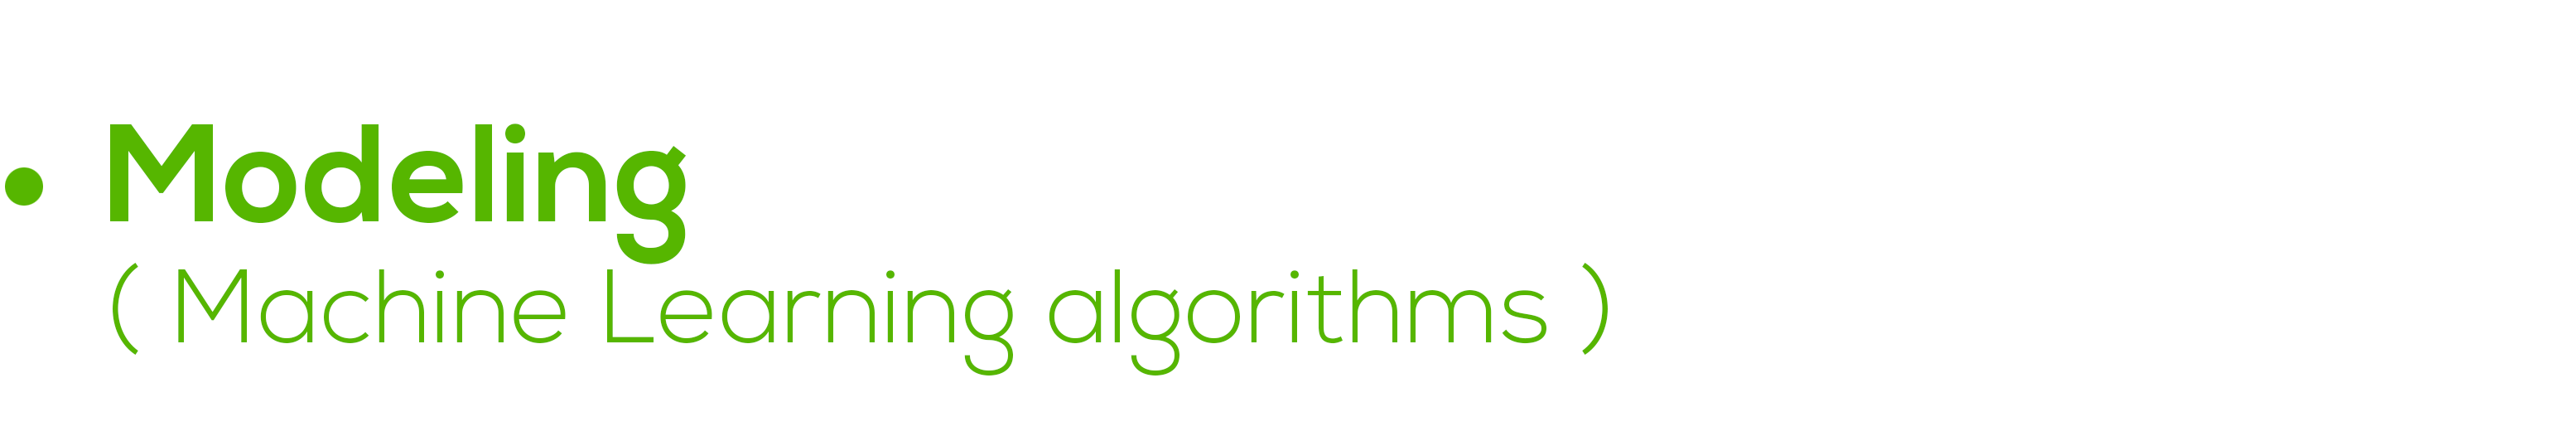

* first we define two functions:<br></br>

<ul>
    <b>+</b> one for <b>Evaluate a score by cross-validation</b> that returns both test score and train score <br></br>
    <b>+</b> and one for <b>Computing confusion matrix to evaluate the accuracy of a classification</b> by using sklearn..model_selection.cross_val_predict that generate cross-validated estimates for each input data point.

</ul>

In [126]:
# Manual Cross Validation that returns both train and test scores

def Cross_Validation_Classificaton(estimator, X, y, n_splits=5):
    
    '''
    Evaluate 'Accuracy', 'Recall', 'Precision', 'F1', 'roc_auc' score by cross-validation.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.

    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        The target variable to try to predict in the case of
        supervised learning.
        
    n_splits : int, default=5
    Number of folds. Must be at least 2.
    
    '''
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
    
    cols = pd.MultiIndex.from_product([['Accuracy','Recall','Precision','F1','roc_auc'],
                                       ['Train Score','Validation Score']])
    CV = pd.DataFrame(columns=cols)
    
    cnt = 1
    for train_index, valid_index in skf.split(X, y):
    
        # features:
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    
        # targets:
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
            
        estimator.fit(X_train, y_train)
        
        pred_train = estimator.predict(X_train)
        pred_valid = estimator.predict(X_valid)
        
        CV.loc[cnt] = [accuracy_score(y_train,pred_train), accuracy_score(y_valid,pred_valid),
                      recall_score(y_train,pred_train), recall_score(y_valid,pred_valid),
                      precision_score(y_train,pred_train), precision_score(y_valid,pred_valid),
                      f1_score(y_train,pred_train), f1_score(y_valid,pred_valid),
                      roc_auc_score(y_train,pred_train), roc_auc_score(y_valid,pred_valid)]
        
        cnt += 1
        
    CV.loc['Mean'] = [
        np.mean( CV['Accuracy']['Train Score'] ), np.mean( CV['Accuracy']['Validation Score'] ),
        np.mean( CV['Recall']['Train Score'] ), np.mean( CV['Recall']['Validation Score'] ),
        np.mean( CV['Precision']['Train Score'] ), np.mean( CV['Precision']['Validation Score'] ),
        np.mean( CV['F1']['Train Score'] ), np.mean( CV['F1']['Validation Score'] ),
        np.mean( CV['roc_auc']['Train Score'] ), np.mean( CV['roc_auc']['Validation Score'] )
    ]
        
    return CV

In [127]:
def ConfusionMatrix(estimator, X, y, n_splits=5):
    
    '''
    Parameters
    ----------
    estimator: The estimator by which the target is predicted.
    
    X: Features
    
    y: true values of the target column
    
    n_splits : int, default=5
    Number of folds. Must be at least 2.
    --------
    '''
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import cross_val_predict, StratifiedKFold
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    cross_val_prediction = cross_val_predict(estimator, X=X, y=y, cv=skf)
    
    cf_matrix = confusion_matrix(y , cross_val_prediction)
    
    # Visualizing the Confusion Matrix
    
    group_names_short = ["TN", "FP", "FN", "TP"]
    group_names_long = ["(True Negative)", "(False Positive)", "(False Negative)", "(True Positive)"]

    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [ f'{v1}\n\n{v2}\n{v3}\n{v4}' for (v1, v2, v3, v4) in zip(group_counts, group_names_short,
                                                               group_names_long, group_percentages) ]
    labels = np.asarray(labels).reshape(2, 2)

    plt.figure( figsize=(8,8) )
    sns.heatmap(cf_matrix, annot=labels, annot_kws={"size":16},
                fmt='', cmap='Set3', vmax=cf_matrix.max(), vmin=cf_matrix.min(),
                linewidths=3, cbar=False)
    
    plt.xlabel("Predicted", fontsize=20)
    plt.ylabel("Actual", fontsize=20)
    plt.title("Confusion Matrix", fontsize=30, pad=20)
    
    return plt.show()

* now we create a Data Frame to store the mean of evaluation scores brought by cross-validation of each estimator:

In [217]:
cols = pd.MultiIndex.from_product(
    [
        ['Accuracy','Recall','Precision','F1','roc_auc'],
        ['Train Score','Validation Score']
    ]
)

scores = pd.DataFrame(columns=cols)

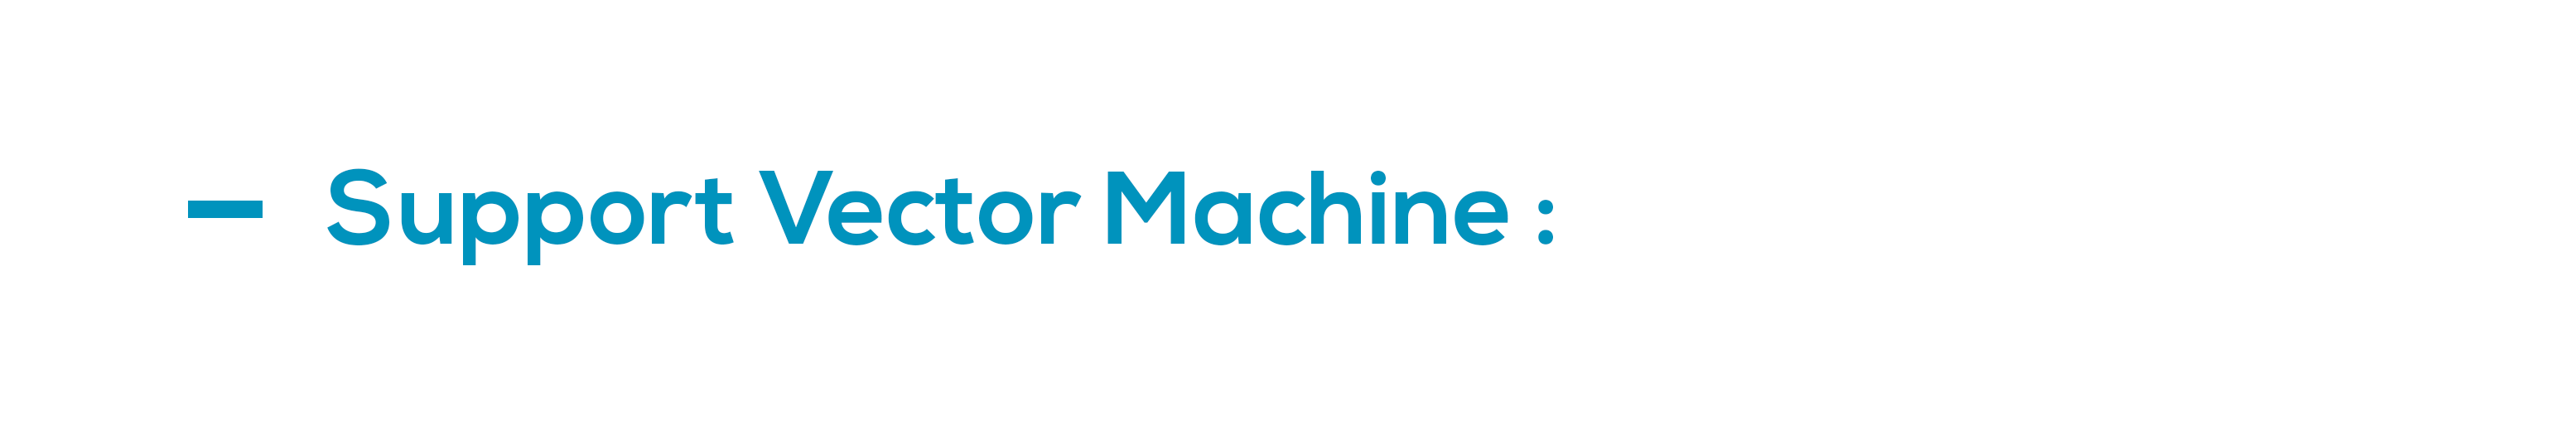

In [129]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.callbacks import DeltaYStopper, DeadlineStopper

In [178]:
overdone_control = DeltaYStopper(delta=0.00001)  # We stop if the gain of the optimization becomes too small
time_limit_control = DeadlineStopper(total_time=60 * 60 * 3)     # We impose a time limit (3 hours)

skf = StratifiedKFold(10, shuffle=True, random_state=42)

In [179]:
SVC_opt = SVC( random_state=42, probability=True)

SVC_opt_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', SVC_opt)
    ]
)

In [180]:
search_spaces = [
    {'estimator__kernel':Categorical(['linear']),
     'estimator__C': Real(0.01, 100)},
    {'estimator__kernel':Categorical(['rbf', 'sigmoid']),
     'estimator__C': Real(0.01, 100),
     'estimator__gamma':Real(0.0001, 10)}
]

In [181]:
opt = BayesSearchCV(
    estimator=SVC_opt_pipe,
    search_spaces=search_spaces,
    scoring='f1',
    n_iter=100,
    n_points=2,
    cv=skf,
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    return_train_score=True
)


In [185]:
opt.fit(X, y, callback=[overdone_control, time_limit_control])

BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('noise_outlier_transformer',
                                         DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                   Pipeline(steps=[('outliers_management_iqr',
                                                                                                    outliers_management_iqr())]),
                                                                                   ['Pregnancies',
                                                                                    'Age']),
                                                                                  ('outlier_transformer_zscore',
                                                                                   Pipeline(steps=[('noise_man...
              search_spaces=[{'estimator__C': Real(low=0.01, high=

In [186]:
opt.best_estimator_

Pipeline(steps=[('noise_outlier_transformer',
                 DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                           Pipeline(steps=[('outliers_management_iqr',
                                                                            outliers_management_iqr())]),
                                                           ['Pregnancies',
                                                            'Age']),
                                                          ('outlier_transformer_zscore',
                                                           Pipeline(steps=[('noise_management',
                                                                            noise_management_zeros()),
                                                                           ('outliers_management_zscore',
                                                                            outliers_management_...
                     

In [187]:
opt.best_params_

OrderedDict([('estimator__C', 77.68299451539727),
             ('estimator__gamma', 0.5082846014424007),
             ('estimator__kernel', 'rbf')])

In [188]:
opt.best_score_

0.6921887753006363

In [190]:
cv_results = pd.DataFrame(
    opt.cv_results_
).loc[:, ['params', 'mean_test_score', 'rank_test_score', 'mean_train_score',
          'rank_train_score', 'std_test_score', 'std_train_score']].sort_values(
    by=['rank_test_score','rank_train_score'], ascending=[True,False])

cv_results.insert(1,'Train/Test Difference %', (cv_results['mean_train_score']-cv_results['mean_test_score'])*100)

cv_results.head()

,params,Train/Test Difference %,mean_test_score,rank_test_score,mean_train_score,rank_train_score,std_test_score,std_train_score
58,"{'estimator__C': 70.98155166508838, 'estimator...",5.857173,0.692189,1,0.750761,31,0.055278,0.006175
36,"{'estimator__C': 77.68299451539727, 'estimator...",5.867041,0.692189,1,0.750859,30,0.055278,0.005748
59,"{'estimator__C': 71.47077115513584, 'estimator...",5.880502,0.692189,1,0.750994,29,0.055278,0.006343
42,"{'estimator__C': 67.25867069480603, 'estimator...",5.942771,0.692189,1,0.751616,28,0.055278,0.005986
56,"{'estimator__C': 69.46210935578512, 'estimator...",5.989325,0.692189,1,0.752082,27,0.055278,0.006159


* the best estimator given by BayesSearch has a **5.86%** difference between it's test score and train score. so we search for a model with less chance of **over fitting** in the **cv_results**:

In [191]:
cv_results[cv_results['Train/Test Difference %']<4].head()

,params,Train/Test Difference %,mean_test_score,rank_test_score,mean_train_score,rank_train_score,std_test_score,std_train_score
54,"{'estimator__C': 0.03712629417494712, 'estimat...",0.337637,0.684531,19,0.687907,32,0.042223,0.004129
32,"{'estimator__C': 0.01, 'estimator__gamma': 2.7...",0.413959,0.669148,22,0.673288,41,0.049038,0.005943
22,"{'estimator__C': 0.01, 'estimator__gamma': 0.8...",-0.033378,0.667295,23,0.666961,45,0.058376,0.008246
25,"{'estimator__C': 0.01, 'estimator__gamma': 1.5...",0.413007,0.665259,24,0.669389,43,0.054908,0.007182
26,"{'estimator__C': 0.01, 'estimator__gamma': 1.7...",0.462604,0.665259,24,0.669885,42,0.054908,0.005445


In [192]:
cv_results.loc[54]['params']

OrderedDict([('estimator__C', 0.03712629417494712),
             ('estimator__gamma', 2.238393054010782),
             ('estimator__kernel', 'rbf')])

In [218]:
clf_SVC = SVC(
    C=0.03712629417494712, kernel='rbf',
    gamma=2.238393054010782, random_state=42,
    probability=True
)

clf_SVC_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ('FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', clf_SVC)
    ]
)

In [219]:
scores_SVC = Cross_Validation_Classificaton(clf_SVC_pipe,X,y,10)
scores_SVC

Accuracy                       Recall                    Precision  \
     Train Score Validation Score Train Score Validation Score Train Score   
1       0.722892         0.770270    0.849138         0.884615    0.569364   
2       0.737952         0.716216    0.836207         0.884615    0.587879   
3       0.734940         0.716216    0.844828         0.846154    0.583333   
4       0.736446         0.689189    0.840517         0.846154    0.585586   
5       0.728916         0.702703    0.849138         0.884615    0.576023   
6       0.731928         0.770270    0.831897         0.923077    0.581325   
7       0.734940         0.689189    0.831897         0.807692    0.584848   
8       0.737952         0.743243    0.853448         0.692308    0.585799   
9       0.730827         0.808219    0.824034         0.880000    0.581818   
10      0.733835         0.698630    0.854077         0.720000    0.581871   
Mean    0.733063         0.730415    0.841518         0.836923    0.581785   

                               F1                      roc_auc  \
     Validation Score Train Score Validation Score Train Score   
1            0.621622    0.681661         0.730159    0.752115   
2            0.560976    0.690391         0.686567    0.760696   
3            0.564103    0.690141         0.676923    0.760377   
4            0.536585    0.690265         0.656716    0.760536   
5            0.547619    0.686411         0.676471    0.756745   
6            0.615385    0.684397         0.738462    0.755069   
7            0.538462    0.686833         0.646154    0.757383   
8            0.620690    0.694737         0.654545    0.764687   
9            0.666667    0.682060         0.758621    0.752295   
10           0.545455    0.692174         0.620690    0.761529   
Mean         0.581756    0.687907         0.684531    0.758143   

                       
     Validation Score  
1            0.796474  
2            0.754808  
3            0.745994  
4            0.725160  
5            0.744391  
6            0.805288  
7            0.716346  
8            0.731571  
9            0.825417  
10           0.703750  
Mean         0.754920

In [220]:
scores.loc['SVC'] = scores_SVC.loc['Mean']

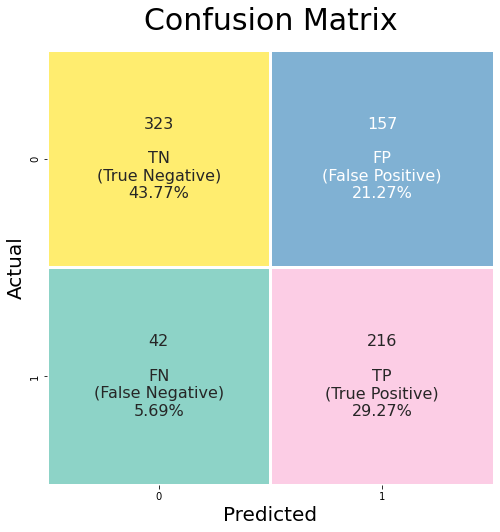

In [221]:
ConfusionMatrix(clf_SVC_pipe,X,y,10)

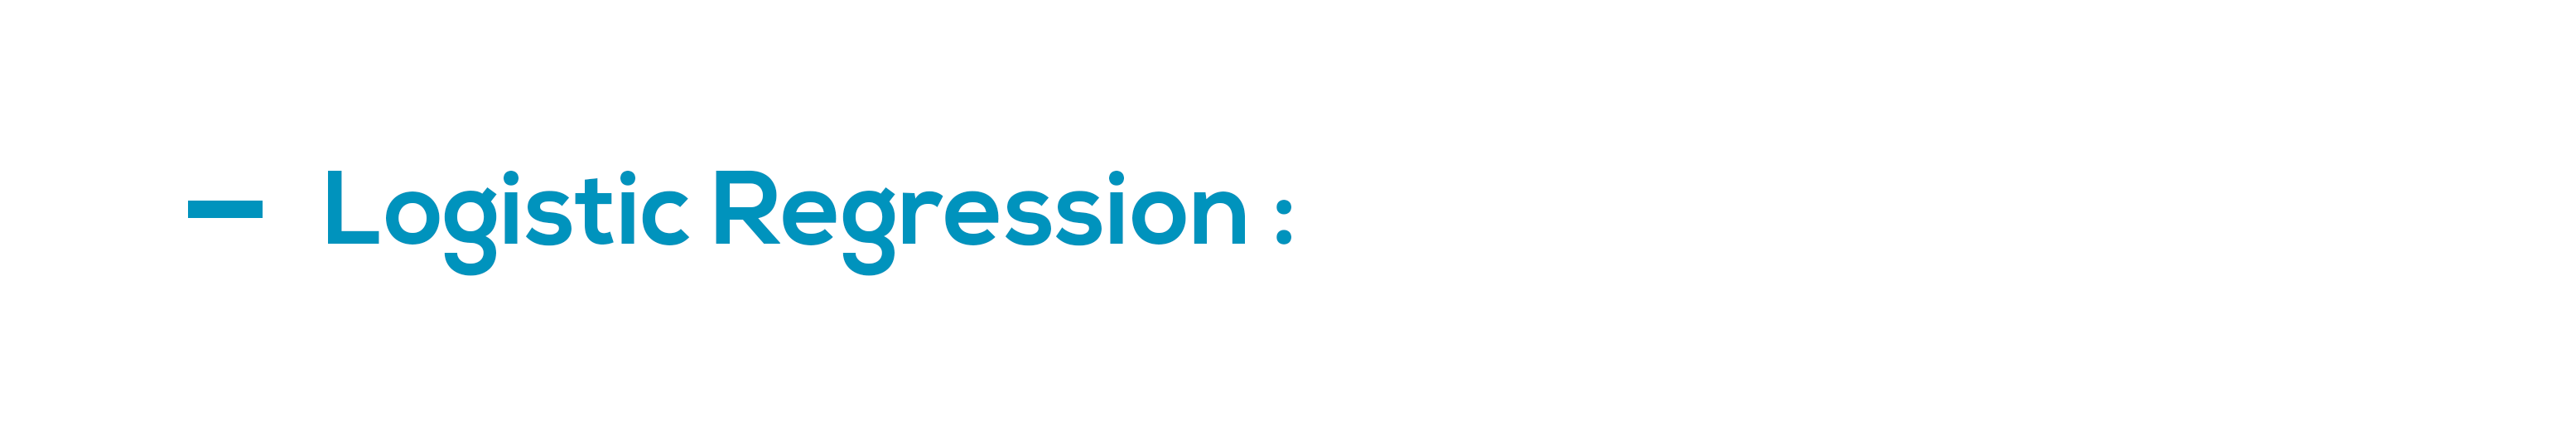

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real

In [197]:
skf = StratifiedKFold(10, shuffle=True, random_state=42)

logreg_opt = LogisticRegression( random_state=42 )

logreg_opt_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', logreg_opt)
    ]
)

In [198]:
search_spaces = [
    {'estimator__penalty': ['l2'],
     'estimator__C': Real(0.01,100,'uniform'),
     'estimator__solver':['lbfgs','newton-cg','liblinear','sag','saga']},
    {'estimator__penalty': ['l1'],
     'estimator__C': Real(0.01,100,'uniform'),
     'estimator__solver':['liblinear','saga']},
    {'estimator__penalty': ['none'],
     'estimator__C': Real(0.01,100,'uniform'),
     'estimator__solver':['lbfgs','newton-cg','sag','saga'],
     'estimator__warm_start':[True]},
    {'estimator__penalty': ['elasticnet'],
     'estimator__C': Real(0.01,100,'uniform'),
     'estimator__solver':['saga'],
     'estimator__warm_start':[True],
     'estimator__l1_ratio': Real(0.01,0.99,'uniform')}
]

In [199]:
opt = BayesSearchCV(
    estimator=logreg_opt_pipe,
    search_spaces=search_spaces,
    scoring='f1',
    n_iter=100,
    n_points=2,
    cv=skf,
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    return_train_score=True
)

In [200]:
opt.fit(X, y)

BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('noise_outlier_transformer',
                                         DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                   Pipeline(steps=[('outliers_management_iqr',
                                                                                                    outliers_management_iqr())]),
                                                                                   ['Pregnancies',
                                                                                    'Age']),
                                                                                  ('outlier_transformer_zscore',
                                                                                   Pipeline(steps=[('noise_man...
                              'estimator__penalty': ['none'],
    

In [202]:
opt.best_score_

0.6684240651587465

In [203]:
cv_results = pd.DataFrame( opt.cv_results_ )

cv_results = cv_results.loc[:, ['params', 'mean_test_score', 'rank_test_score', 'mean_train_score',
                    'rank_train_score', 'std_test_score', 'std_train_score']
               ].sort_values(by=['mean_test_score','mean_train_score'], ascending=[False,True]).head(5)
cv_results

,params,mean_test_score,rank_test_score,mean_train_score,rank_train_score,std_test_score,std_train_score
28,"{'estimator__C': 6.659708793364706, 'estimator...",0.668424,1,0.681549,378,0.055808,0.007914
65,"{'estimator__C': 6.662791221124482, 'estimator...",0.668424,1,0.681549,378,0.055808,0.007914
377,"{'estimator__C': 6.823042416914912, 'estimator...",0.668424,1,0.681689,373,0.055808,0.007949
32,"{'estimator__C': 6.981680219388547, 'estimator...",0.668424,1,0.681832,365,0.055808,0.008273
91,"{'estimator__C': 7.060359235700101, 'estimator...",0.668424,1,0.681832,365,0.055808,0.008273


In [205]:
cv_results.loc[28]['params']

OrderedDict([('estimator__C', 6.659708793364706),
             ('estimator__penalty', 'l2'),
             ('estimator__solver', 'lbfgs')])

In [222]:
clf_logreg = LogisticRegression(
    C=6.659708793364706, penalty='l2',
    solver='lbfgs', random_state=42
)


clf_logreg_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', clf_logreg)
    ]
)

In [223]:
scores_logreg = Cross_Validation_Classificaton(clf_logreg_pipe,X,y,10)
scores_logreg

Accuracy                       Recall                    Precision  \
     Train Score Validation Score Train Score Validation Score Train Score   
1       0.765060         0.756757    0.737069         0.769231    0.642857   
2       0.778614         0.662162    0.737069         0.615385    0.665370   
3       0.765060         0.743243    0.724138         0.807692    0.646154   
4       0.760542         0.729730    0.719828         0.730769    0.639847   
5       0.751506         0.783784    0.719828         0.769231    0.625468   
6       0.763554         0.783784    0.711207         0.807692    0.647059   
7       0.768072         0.716216    0.728448         0.730769    0.650000   
8       0.756024         0.756757    0.719828         0.538462    0.632576   
9       0.762406         0.835616    0.721030         0.760000    0.643678   
10      0.762406         0.767123    0.725322         0.600000    0.642586   
Mean    0.763325         0.753517    0.724377         0.712923    0.643559   

                               F1                      roc_auc  \
     Validation Score Train Score Validation Score Train Score   
1            0.625000    0.686747         0.689655    0.758581   
2            0.516129    0.699387         0.561404    0.768997   
3            0.600000    0.682927         0.688525    0.755587   
4            0.593750    0.677485         0.655172    0.751117   
5            0.666667    0.669339         0.714286    0.744173   
6            0.656250    0.677618         0.724138    0.751437   
7            0.575758    0.686992         0.644068    0.758900   
8            0.700000    0.673387         0.608696    0.747645   
9            0.760000    0.680162         0.760000    0.752876   
10           0.681818    0.681452         0.638298    0.753865   
Mean         0.637537    0.681549         0.668424    0.754318   

                       
     Validation Score  
1            0.759615  
2            0.651442  
3            0.758013  
4            0.729968  
5            0.780449  
6            0.789263  
7            0.719551  
8            0.706731  
9            0.817500  
10           0.727083  
Mean         0.743962

In [224]:
scores.loc['Logistic Regression'] = scores_logreg.loc['Mean']

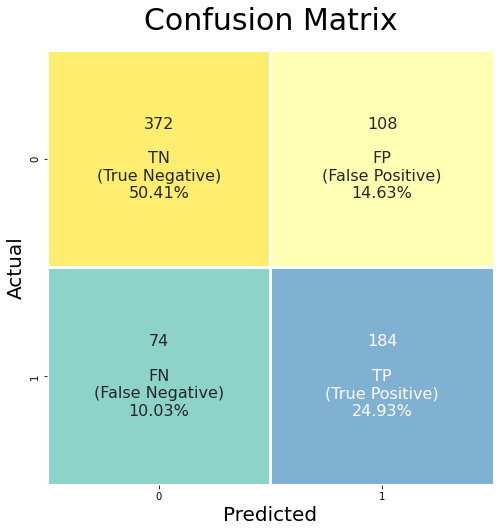

In [225]:
ConfusionMatrix(clf_logreg_pipe,X,y,10)

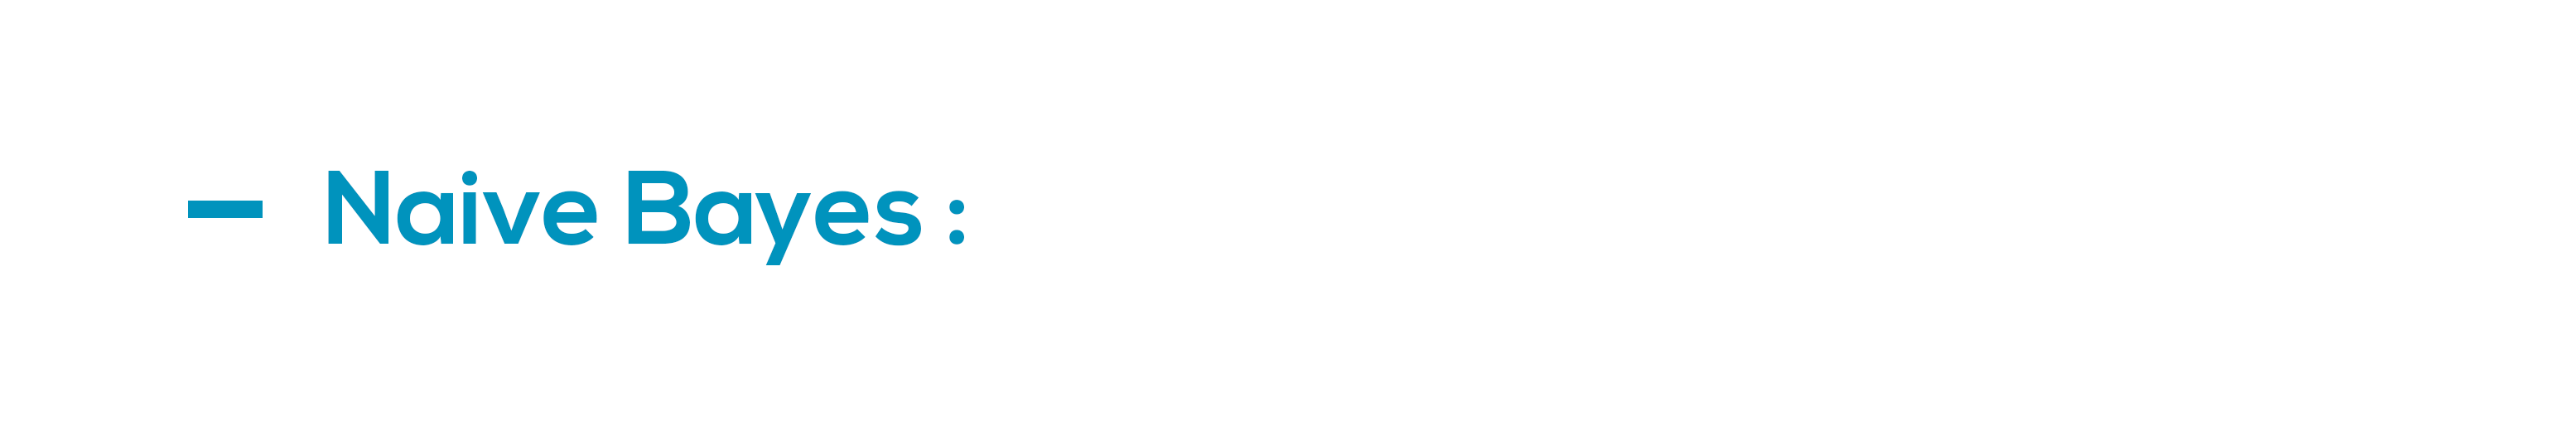

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real

In [129]:
skf = StratifiedKFold(10, shuffle=True, random_state=42)

In [211]:
gnb_opt = GaussianNB()

gnb_opt_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', gnb_opt)
    ]
)

In [212]:
search_spaces = {
    'estimator__var_smoothing':np.logspace(0,-15, num=16)
}

In [213]:
opt = BayesSearchCV(
    estimator=gnb_opt_pipe,
    search_spaces=search_spaces,
    scoring='f1',
    n_iter=100,
    n_points=2,
    cv=skf,
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    return_train_score=True
)

In [214]:
opt.fit(X, y)

BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('noise_outlier_transformer',
                                         DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                   Pipeline(steps=[('outliers_management_iqr',
                                                                                                    outliers_management_iqr())]),
                                                                                   ['Pregnancies',
                                                                                    'Age']),
                                                                                  ('outlier_transformer_zscore',
                                                                                   Pipeline(steps=[('noise_man...
                                        ('SMOTE',
                

In [220]:
opt.best_score_

0.6725295134188919

In [221]:
opt.best_params_

OrderedDict([('estimator__var_smoothing', 1e-09)])

In [222]:
cv_results = pd.DataFrame( opt.cv_results_ )

cv_results = cv_results.loc[:, ['params', 'mean_test_score', 'rank_test_score', 'mean_train_score',
                    'rank_train_score', 'std_test_score', 'std_train_score']
               ].sort_values(by=['mean_test_score','mean_train_score'], ascending=[False,True]).head(5)
cv_results

,params,mean_test_score,rank_test_score,mean_train_score,rank_train_score,std_test_score,std_train_score
0,{'estimator__var_smoothing': 1e-09},0.67253,1,0.676414,13,0.039481,0.007758
4,{'estimator__var_smoothing': 1e-08},0.67253,1,0.676414,13,0.039481,0.007758
7,{'estimator__var_smoothing': 1e-12},0.67253,1,0.676414,13,0.039481,0.007758
9,{'estimator__var_smoothing': 1e-08},0.67253,1,0.676414,13,0.039481,0.007758
10,{'estimator__var_smoothing': 1e-10},0.67253,1,0.676414,13,0.039481,0.007758


In [227]:
clf_gnb = GaussianNB(var_smoothing=1e-09)

clf_gnb_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', clf_gnb)
    ]
)

In [228]:
scores_gnb = Cross_Validation_Classificaton(clf_gnb_pipe,X,y,10)
scores_gnb

Accuracy                       Recall                    Precision  \
     Train Score Validation Score Train Score Validation Score Train Score   
1       0.746988         0.770270    0.754310         0.730769    0.611888   
2       0.763554         0.702703    0.750000         0.846154    0.637363   
3       0.750000         0.729730    0.750000         0.769231    0.617021   
4       0.750000         0.729730    0.754310         0.769231    0.616197   
5       0.742470         0.743243    0.741379         0.769231    0.607774   
6       0.751506         0.770270    0.745690         0.846154    0.620072   
7       0.757530         0.702703    0.754310         0.692308    0.627240   
8       0.743976         0.783784    0.728448         0.576923    0.612319   
9       0.741353         0.808219    0.733906         0.840000    0.608541   
10      0.751880         0.739726    0.763948         0.600000    0.618056   
Mean    0.749926         0.748038    0.747630         0.744000    0.617647   

                               F1                      roc_auc  \
     Validation Score Train Score Validation Score Train Score   
1            0.655172    0.675676         0.690909    0.748683   
2            0.550000    0.689109         0.666667    0.760417   
3            0.588235    0.677043         0.666667    0.750000   
4            0.588235    0.678295         0.666667    0.750998   
5            0.606061    0.667961         0.677966    0.742217   
6            0.628571    0.677104         0.721311    0.750160   
7            0.562500    0.684932         0.620690    0.756785   
8            0.750000    0.665354         0.652174    0.740382   
9            0.677419    0.665370         0.750000    0.739638   
10           0.625000    0.683301         0.612245    0.754659   
Mean         0.623119    0.676414         0.672530    0.749394   

                       
     Validation Score  
1            0.761218  
2            0.735577  
3            0.738782  
4            0.738782  
5            0.749199  
6            0.787660  
7            0.700321  
8            0.736378  
9            0.815833  
10           0.706250  
Mean         0.747000

In [229]:
scores.loc['Gaussian Naive Bayes'] = scores_gnb.loc['Mean']

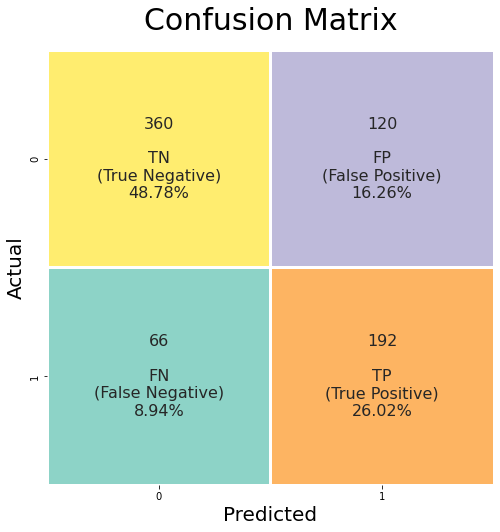

In [230]:
ConfusionMatrix(clf_gnb_pipe,X,y,10)

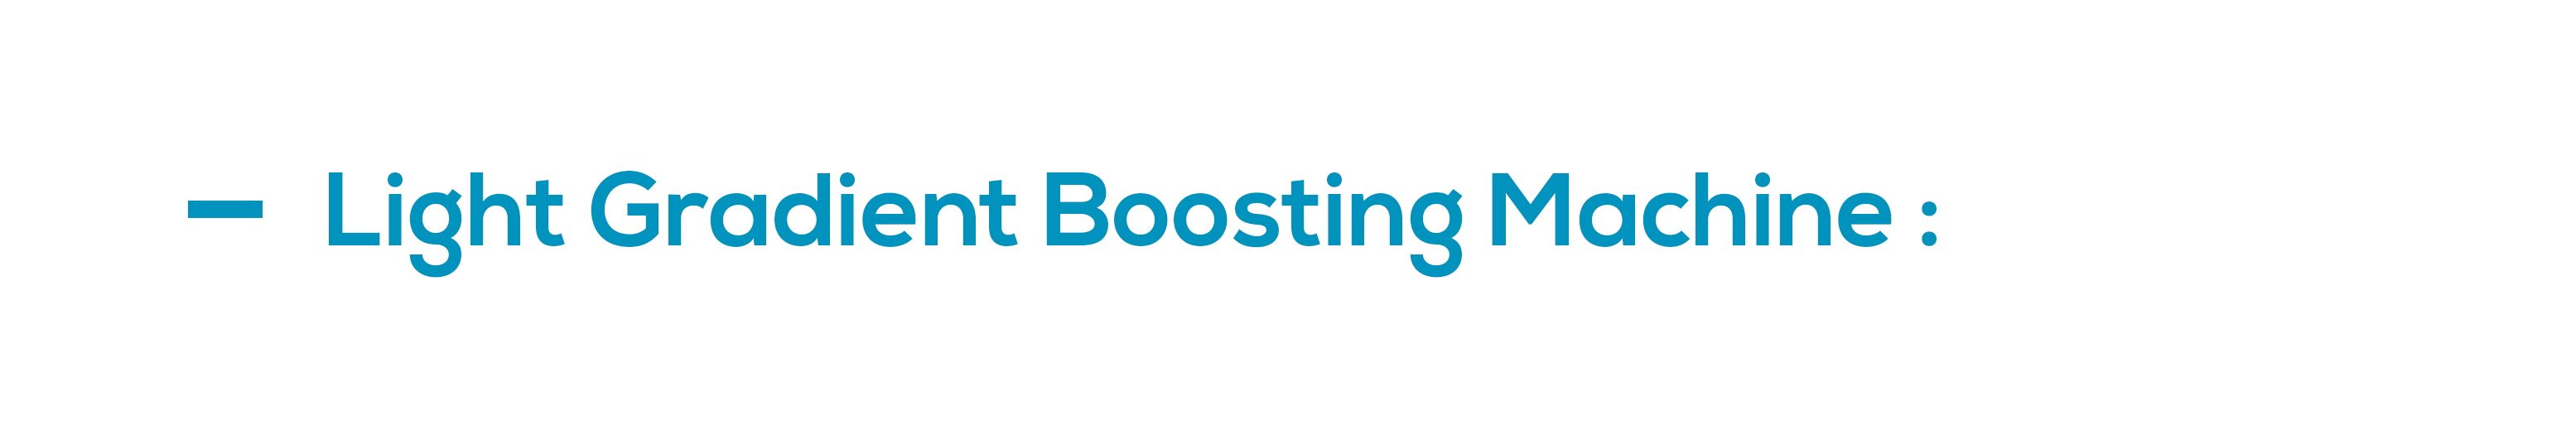

In [135]:
import lightgbm
from skopt import BayesSearchCV
from skopt.callbacks import DeltaYStopper
from skopt.space import Real, Integer
from sklearn.model_selection import StratifiedKFold

In [227]:
overdone_control = DeltaYStopper(delta=0.00001)  # We stop if the gain of the optimization becomes too small
skf = StratifiedKFold(10, shuffle=True, random_state=42)

In [228]:
search_spaces = {
    'estimator__max_depth':Integer(3, 13),
    'estimator__num_leaves':Integer(20, 3000),
    'estimator__min_child_samples': Integer(1, 256),
    'estimator__subsample': Real(0.01, 1.0, 'uniform'),
    'estimator__subsample_freq': Integer(0, 10),
    'estimator__min_data_in_leaf':Integer(5, 100),
    'estimator__learning_rate':Real(0.01, 0.31, 'uniform'),
    'estimator__n_estimators':Integer(30, 5000),
    'estimator__reg_lambda': Real(0, 100.0, 'uniform'), 
    'estimator__reg_alpha': Real(0, 100.0, 'uniform'),
    'estimator__min_split_gain':Integer(0, 15),
    'estimator__colsample_bytree': Real(0.01, 1.0, 'uniform'),
    'estimator__min_child_weight': Real(0.01, 10.0, 'uniform')
}


lgbm_opt = lightgbm.LGBMClassifier(
    objective='binary',
    metrics='logloss',
    random_state=42
)


lgbm_pipe_opt = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', lgbm_opt)
    ]
)

In [229]:
opt = BayesSearchCV(
    estimator=lgbm_pipe_opt,
    search_spaces=search_spaces,
    scoring='f1',
    n_points=3,
    n_jobs=-1,
    fit_params={'estimator__eval_metric':'logloss',
                'estimator__early_stopping_rounds':100},
    cv=skf,
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    return_train_score=True
)

In [230]:
opt.fit(X,y, callback=[overdone_control])

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100


BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('noise_outlier_transformer',
                                         DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                   Pipeline(steps=[('outliers_management_iqr',
                                                                                                    outliers_management_iqr())]),
                                                                                   ['Pregnancies',
                                                                                    'Age']),
                                                                                  ('outlier_transformer_zscore',
                                                                                   Pipeline(steps=[('noise_man...
                             'estimator__num_leaves': Integer(low=

In [233]:
opt.best_estimator_

Pipeline(steps=[('noise_outlier_transformer',
                 DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                           Pipeline(steps=[('outliers_management_iqr',
                                                                            outliers_management_iqr())]),
                                                           ['Pregnancies',
                                                            'Age']),
                                                          ('outlier_transformer_zscore',
                                                           Pipeline(steps=[('noise_management',
                                                                            noise_management_zeros()),
                                                                           ('outliers_management_zscore',
                                                                            outliers_management_...
                ('SMO

In [234]:
opt.best_params_

OrderedDict([('estimator__colsample_bytree', 1.0),
             ('estimator__learning_rate', 0.24922947016086347),
             ('estimator__max_depth', 13),
             ('estimator__min_child_samples', 138),
             ('estimator__min_child_weight', 0.01),
             ('estimator__min_data_in_leaf', 100),
             ('estimator__min_split_gain', 2),
             ('estimator__n_estimators', 30),
             ('estimator__num_leaves', 1473),
             ('estimator__reg_alpha', 7.435336896282337),
             ('estimator__reg_lambda', 8.915137263421636),
             ('estimator__subsample', 0.6528821213262754),
             ('estimator__subsample_freq', 5)])

In [235]:
opt.best_score_

0.6888216204471298

In [236]:
cv_results = pd.DataFrame( opt.cv_results_ ).loc[:, ['params', 'mean_test_score', 'rank_test_score',
                                                     'mean_train_score','rank_train_score', 'std_test_score',
                                                     'std_train_score']
                                                ].sort_values(by=['mean_test_score','mean_train_score'],
                                                              ascending=[False,True]).head(5)
cv_results

,params,mean_test_score,rank_test_score,mean_train_score,rank_train_score,std_test_score,std_train_score
32,"{'estimator__colsample_bytree': 1.0, 'estimato...",0.688822,1,0.704495,10,0.070882,0.008406
21,"{'estimator__colsample_bytree': 0.01, 'estimat...",0.677443,2,0.700012,13,0.072109,0.009283
39,"{'estimator__colsample_bytree': 0.01, 'estimat...",0.677443,2,0.700012,13,0.072109,0.009283
37,{'estimator__colsample_bytree': 0.313012955766...,0.676050,4,0.739450,3,0.049172,0.005048
34,"{'estimator__colsample_bytree': 1.0, 'estimato...",0.673782,5,0.704364,11,0.056054,0.013912


In [231]:
clf_lgbm = lightgbm.LGBMClassifier(
    objective='binary', metrics='logloss',
    colsample_bytree=1.0, learning_rate=0.24922947016086347, max_depth=13,
    min_child_samples=138, min_child_weight=0.01,
    min_data_in_leaf=100, min_split_gain=2, n_estimators=30,
    num_leaves=1473, reg_alpha=7.435336896282337, reg_lambda=8.915137263421636,
    subsample=0.6528821213262754, subsample_freq=5,
    random_state=42, verbose=-1
)

clf_lgbm_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', clf_lgbm)
    ]
)

In [232]:
scores_lgbm = Cross_Validation_Classificaton(clf_lgbm_pipe, X, y, 10)
scores_lgbm

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100


Accuracy                       Recall                    Precision  \
     Train Score Validation Score Train Score Validation Score Train Score   
1       0.775602         0.675676    0.784483         0.653846    0.647687   
2       0.778614         0.716216    0.767241         0.769231    0.656827   
3       0.765060         0.756757    0.762931         0.807692    0.636691   
4       0.775602         0.716216    0.767241         0.807692    0.652015   
5       0.760542         0.824324    0.741379         0.846154    0.634686   
6       0.769578         0.770270    0.793103         0.846154    0.636678   
7       0.783133         0.756757    0.767241         0.807692    0.664179   
8       0.777108         0.756757    0.762931         0.576923    0.655556   
9       0.780451         0.876712    0.763948         0.920000    0.661710   
10      0.783459         0.753425    0.763948         0.600000    0.666667   
Mean    0.774915         0.760311    0.767445         0.763538    0.651269   

                               F1                      roc_auc  \
     Validation Score Train Score Validation Score Train Score   
1            0.531250    0.709552         0.586207    0.777658   
2            0.571429    0.707753         0.655738    0.775982   
3            0.617647    0.694118         0.700000    0.764567   
4            0.567568    0.704950         0.666667    0.773667   
5            0.709677    0.683897         0.771930    0.756106   
6            0.628571    0.706334         0.721311    0.775024   
7            0.617647    0.712000         0.700000    0.779454   
8            0.681818    0.705179         0.625000    0.773827   
9            0.766667    0.709163         0.836364    0.776650   
10           0.652174    0.712000         0.625000    0.778965   
Mean         0.634445    0.704495         0.688822    0.773190   

                       
     Validation Score  
1            0.670673  
2            0.728365  
3            0.768429  
4            0.737179  
5            0.829327  
6            0.787660  
7            0.768429  
8            0.715545  
9            0.887083  
10           0.716667  
Mean         0.760936

In [233]:
scores.loc['lightgbm'] = scores_lgbm.loc['Mean']

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100


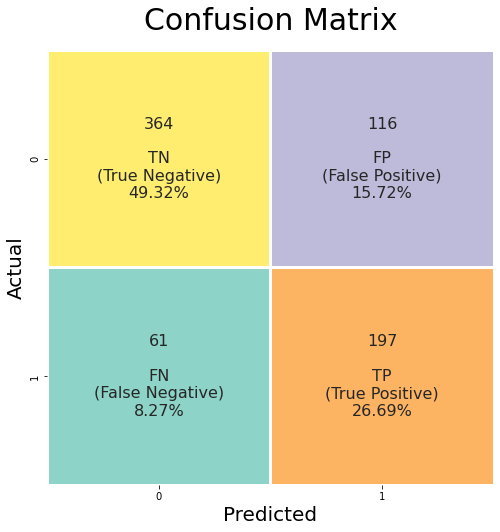

In [234]:
ConfusionMatrix(clf_lgbm_pipe,X,y,10)

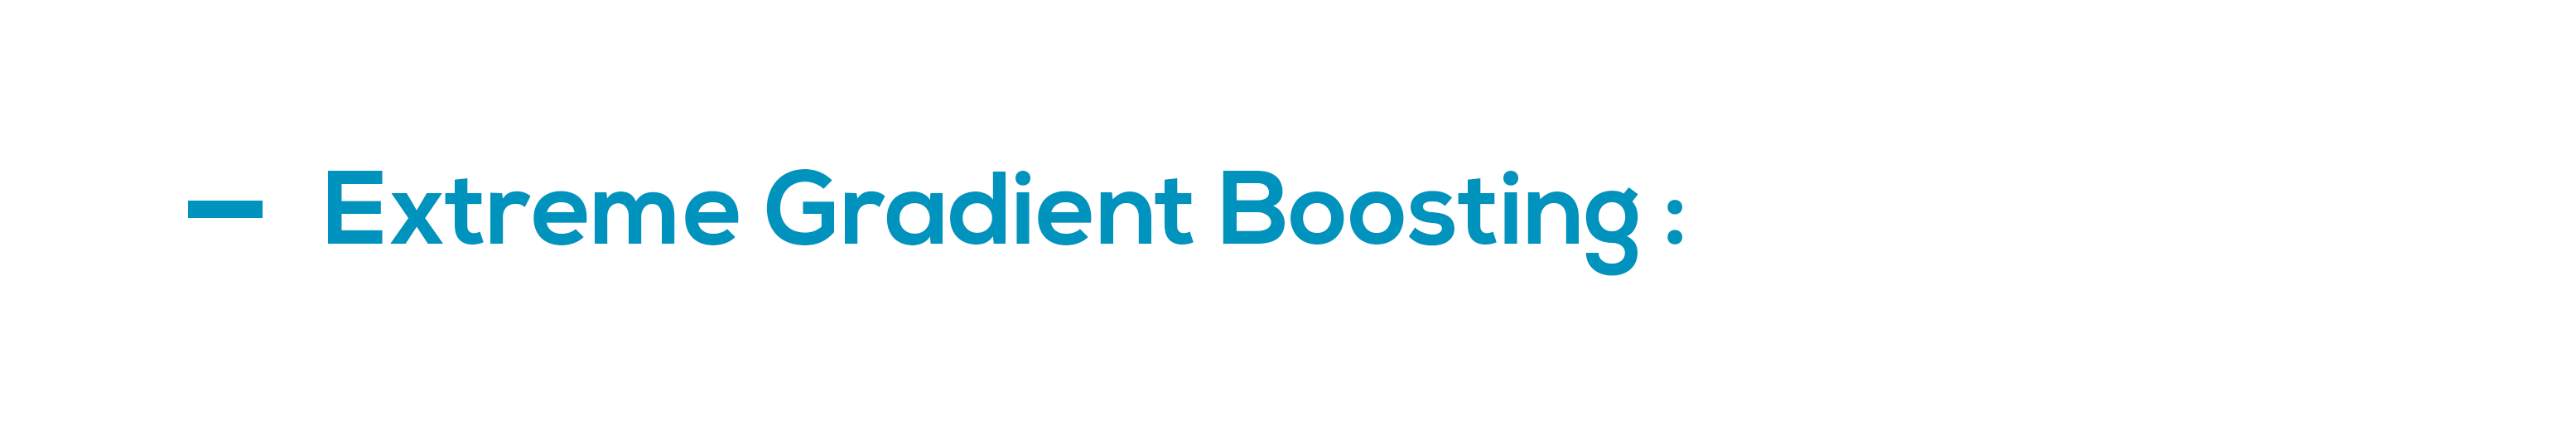

In [137]:
import xgboost
from skopt import BayesSearchCV
from skopt.callbacks import DeltaYStopper
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import StratifiedKFold

In [241]:
overdone_control = DeltaYStopper(delta=0.00001)  # We stop if the gain of the optimization becomes too small
skf = StratifiedKFold(10, shuffle=True, random_state=42)

In [242]:
xgb_opt = xgboost.XGBClassifier(
    random_state=42,
    objective='binary:logistic',
    booster='gbtree',
    tree_method='exact',
    eval_metric='logloss'
)

xgb_opt_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', xgb_opt)
    ]
)

In [243]:
search_spaces = {
    'estimator__n_estimators':Integer(30, 5000),
    'estimator__max_depth':Integer(3, 13),
    'estimator__gamma':Real(0, 15, 'uniform'),
    'estimator__scale_pos_weight':Real(1.8, 2.2, 'uniform'),  
    'estimator__learning_rate':Real(0.01, 0.31, 'uniform'),
    'estimator__min_child_weight': Real(0.01, 10.0, 'uniform'),
    'estimator__subsample': Real(0.01, 1.0, 'uniform'),
    'estimator__colsample_bytree': Real(0.01, 1.0, 'uniform'),
    'estimator__reg_alpha': Real(0, 100.0, 'uniform'),
    'estimator__reg_lambda': Real(0, 100.0, 'uniform')
}

In [244]:
opt = BayesSearchCV(
    estimator=xgb_opt_pipe,
    search_spaces=search_spaces,
    scoring='f1',
    n_points=2,
    fit_params={'estimator__eval_metric':'logloss',
                'estimator__early_stopping_rounds':50,
                'estimator__verbose':100},
    cv=skf,
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    return_train_score=True
)

In [245]:
opt.fit(X,y, callback=[overdone_control])

BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('noise_outlier_transformer',
                                         DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                   Pipeline(steps=[('outliers_management_iqr',
                                                                                                    outliers_management_iqr())]),
                                                                                   ['Pregnancies',
                                                                                    'Age']),
                                                                                  ('outlier_transformer_zscore',
                                                                                   Pipeline(steps=[('noise_man...
                             'estimator__n_estimators': Integer(lo

In [247]:
pd.DataFrame( opt.cv_results_).to_csv(r'D:\Data Science\DataSet\Pima Indians Diabetes Database\Tuning\Modeling_XGB.csv')

In [248]:
opt.best_params_

OrderedDict([('estimator__colsample_bytree', 1.0),
             ('estimator__gamma', 0.7139570658778134),
             ('estimator__learning_rate', 0.31),
             ('estimator__max_depth', 11),
             ('estimator__min_child_weight', 0.01),
             ('estimator__n_estimators', 30),
             ('estimator__reg_alpha', 0.0),
             ('estimator__reg_lambda', 100.0),
             ('estimator__scale_pos_weight', 1.8),
             ('estimator__subsample', 0.9184583626271053)])

In [249]:
opt.best_score_

0.6938363017962674

In [250]:
cv_results = pd.DataFrame( opt.cv_results_ )
cv_results = cv_results.loc[:, ['params', 'mean_test_score', 'rank_test_score',
                                'mean_train_score','rank_train_score']
                           ].sort_values(by=['mean_test_score','mean_train_score'], ascending=[False,True]).head(50)

cv_results.insert(1,'Train/Test Difference %', (cv_results['mean_train_score'] - cv_results['mean_test_score'])*100 )
cv_results[cv_results['Train/Test Difference %']<3].head()

,params,Train/Test Difference %,mean_test_score,rank_test_score,mean_train_score,rank_train_score
14,"{'estimator__colsample_bytree': 0.01, 'estimat...",2.670699,0.682326,5,0.709032,16
33,"{'estimator__colsample_bytree': 1.0, 'estimato...",2.918789,0.679376,7,0.708564,17
23,"{'estimator__colsample_bytree': 0.01, 'estimat...",2.658939,0.676843,8,0.703432,20
15,"{'estimator__colsample_bytree': 1.0, 'estimato...",2.719639,0.674863,10,0.702060,21
40,"{'estimator__colsample_bytree': 1.0, 'estimato...",2.849342,0.649555,19,0.678048,23


In [251]:
cv_results.loc[14]['params']

OrderedDict([('estimator__colsample_bytree', 0.01),
             ('estimator__gamma', 15.0),
             ('estimator__learning_rate', 0.20160073708271808),
             ('estimator__max_depth', 10),
             ('estimator__min_child_weight', 10.0),
             ('estimator__n_estimators', 4452),
             ('estimator__reg_alpha', 0.0),
             ('estimator__reg_lambda', 0.0),
             ('estimator__scale_pos_weight', 1.8),
             ('estimator__subsample', 0.9083574144359503)])

In [235]:
clf_xgb = xgboost.XGBClassifier(
    random_state=42, objective='binary:logistic', booster='gbtree',
    tree_method='exact', eval_metric='logloss',
    colsample_bytree=0.01,gamma=15.0,
    learning_rate=0.20160073708271808,
    max_depth=10, min_child_weight=10.0,
    n_estimators=4452, reg_alpha=0,
    reg_lambda=0, scale_pos_weight=1.8,
    subsample=0.9083574144359503
)

clf_xgb_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', clf_xgb)
    ]
)

In [236]:
scores_xgb = Cross_Validation_Classificaton(clf_xgb_pipe, X, y, 10)
scores_xgb

Accuracy                       Recall                    Precision  \
     Train Score Validation Score Train Score Validation Score Train Score   
1       0.733434         0.716216    0.896552         0.884615    0.576177   
2       0.745482         0.621622    0.935345         0.807692    0.584906   
3       0.736446         0.756757    0.905172         1.000000    0.578512   
4       0.737952         0.716216    0.892241         0.884615    0.581461   
5       0.742470         0.675676    0.909483         0.923077    0.584488   
6       0.743976         0.743243    0.905172         0.884615    0.586592   
7       0.721386         0.716216    0.892241         0.846154    0.564033   
8       0.748494         0.743243    0.922414         0.807692    0.589532   
9       0.741353         0.808219    0.888412         1.000000    0.586402   
10      0.750376         0.671233    0.909871         0.680000    0.593838   
Mean    0.740137         0.716864    0.905690         0.871846    0.582594   

                               F1                      roc_auc  \
     Validation Score Train Score Validation Score Train Score   
1            0.560976    0.701518         0.686567    0.771193   
2            0.477273    0.719735         0.600000    0.789432   
3            0.590909    0.705882         0.742857    0.775503   
4            0.560976    0.704082         0.686567    0.773667   
5            0.521739    0.711636         0.666667    0.781130   
6            0.589744    0.711864         0.707692    0.781290   
7            0.564103    0.691152         0.676923    0.760936   
8            0.600000    0.719328         0.688525    0.788753   
9            0.641026    0.706485         0.781250    0.775225   
10           0.515152    0.718644         0.586207    0.787112   
Mean         0.562190    0.709032         0.682326    0.778424   

                       
     Validation Score  
1            0.754808  
2            0.664263  
3            0.812500  
4            0.754808  
5            0.732372  
6            0.775641  
7            0.745994  
8            0.758013  
9            0.854167  
10           0.673333  
Mean         0.752590

In [237]:
scores.loc['xgboost'] = scores_xgb.loc['Mean']

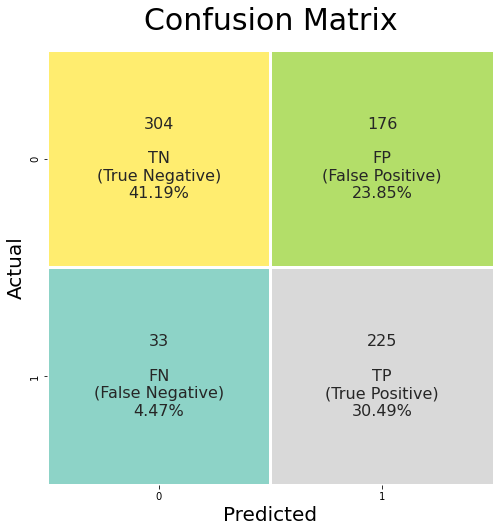

In [238]:
ConfusionMatrix(clf_xgb_pipe, X, y, 10)

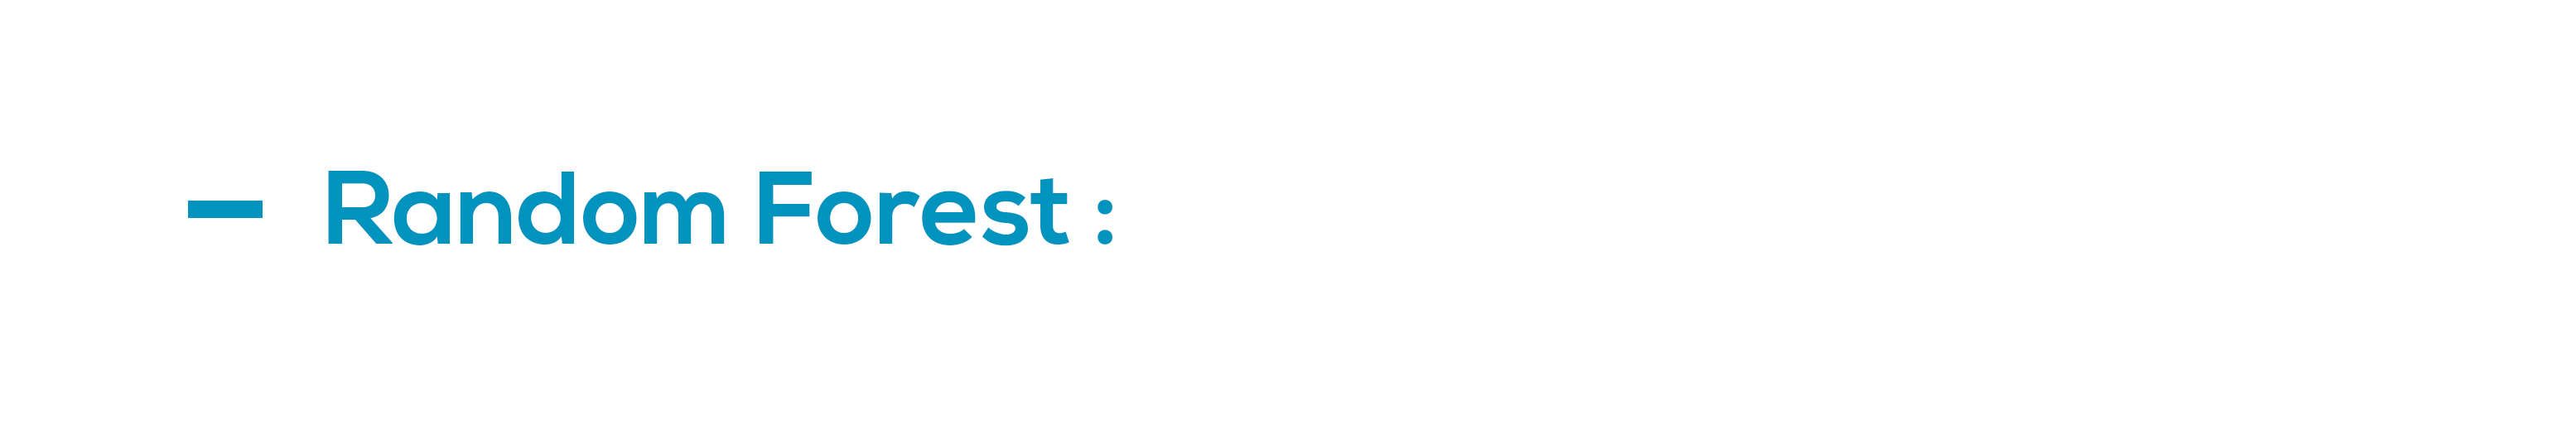

In [139]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import StratifiedKFold

In [261]:
skf = StratifiedKFold(10, shuffle=True, random_state=42)

In [262]:
RF_opt = RandomForestClassifier(
    random_state=42
)


RF_opt_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', RF_opt)
    ]
)

In [263]:
search_spaces = [
    {'estimator__n_estimators':Integer(30, 5000),
    'estimator__criterion':Categorical(["gini", "entropy"]),
    'estimator__max_depth':Integer(3, 13),
    'estimator__min_samples_split':Integer(2,15),
    'estimator__min_samples_leaf':Integer(1, 10),
    'estimator__max_features':Categorical([None,'sqrt', 'log2']),
    'estimator__max_samples':Real(0.01, 1.0, 'uniform'),
    'estimator__bootstrap':[True]},
    {'estimator__n_estimators':Integer(30, 5000),
    'estimator__criterion':Categorical(["gini", "entropy"]),
    'estimator__max_depth':Integer(3, 13),
    'estimator__min_samples_split':Integer(2,15),
    'estimator__min_samples_leaf':Integer(1, 10),
    'estimator__max_features':Categorical([None,'sqrt', 'log2']),
    'estimator__bootstrap':[False]}
]

In [264]:
opt = BayesSearchCV(
    estimator=RF_opt_pipe,
    search_spaces=search_spaces,
    scoring='f1',
    n_points=2,
    cv=skf,
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    return_train_score=True
)

In [265]:
opt.fit(X,y)

BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('noise_outlier_transformer',
                                         DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                   Pipeline(steps=[('outliers_management_iqr',
                                                                                                    outliers_management_iqr())]),
                                                                                   ['Pregnancies',
                                                                                    'Age']),
                                                                                  ('outlier_transformer_zscore',
                                                                                   Pipeline(steps=[('noise_man...
                              'estimator__max_features': Categoric

In [267]:
opt.best_params_

OrderedDict([('estimator__bootstrap', True),
             ('estimator__criterion', 'gini'),
             ('estimator__max_depth', 4),
             ('estimator__max_features', 'sqrt'),
             ('estimator__max_samples', 0.1960756345036751),
             ('estimator__min_samples_leaf', 5),
             ('estimator__min_samples_split', 4),
             ('estimator__n_estimators', 3765)])

In [268]:
opt.best_score_

0.7014366373942283

In [269]:
cv_results = pd.DataFrame( opt.cv_results_ )
cv_results = cv_results.loc[:, ['params', 'mean_test_score', 'rank_test_score',
                                'mean_train_score','rank_train_score']
                           ].sort_values(by=['mean_test_score','mean_train_score'], ascending=[False,True]).head(50)

cv_results.head()

,params,mean_test_score,rank_test_score,mean_train_score,rank_train_score
2,"{'estimator__bootstrap': True, 'estimator__cri...",0.701437,1,0.734179,74
32,"{'estimator__bootstrap': True, 'estimator__cri...",0.697355,2,0.724396,87
28,"{'estimator__bootstrap': True, 'estimator__cri...",0.693351,3,0.766532,41
48,"{'estimator__bootstrap': True, 'estimator__cri...",0.691975,4,0.723226,89
25,"{'estimator__bootstrap': True, 'estimator__cri...",0.691669,5,0.772576,39


In [239]:
clf_RF = RandomForestClassifier(
    bootstrap=True, criterion='gini',
    max_depth=4, max_features='sqrt',
    max_samples=0.1960756345036751, min_samples_leaf=5,
    min_samples_split=4, n_estimators=3765,
    random_state=42
)

clf_RF_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', clf_RF)
    ]
)

In [240]:
scores_RF = Cross_Validation_Classificaton(clf_RF_pipe, X, y, 10)
scores_RF

Accuracy                       Recall                    Precision  \
     Train Score Validation Score Train Score Validation Score Train Score   
1       0.783133         0.770270    0.810345         0.769231    0.652778   
2       0.798193         0.702703    0.827586         0.769231    0.671329   
3       0.796687         0.743243    0.810345         0.807692    0.673835   
4       0.799699         0.756757    0.810345         0.807692    0.678700   
5       0.783133         0.810811    0.818966         0.846154    0.650685   
6       0.787651         0.797297    0.801724         0.846154    0.661922   
7       0.804217         0.729730    0.823276         0.769231    0.682143   
8       0.799699         0.770270    0.818966         0.615385    0.676157   
9       0.784962         0.863014    0.802575         0.880000    0.658451   
10      0.798496         0.753425    0.828326         0.640000    0.672474   
Mean    0.793587         0.769752    0.815245         0.775077    0.667847   

                               F1                      roc_auc  \
     Validation Score Train Score Validation Score Train Score   
1            0.645161    0.723077         0.701754    0.789432   
2            0.555556    0.741313         0.645161    0.804997   
3            0.600000    0.735812         0.688525    0.799848   
4            0.617647    0.738703         0.700000    0.802163   
5            0.687500    0.725191         0.758621    0.791427   
6            0.666667    0.725146         0.745763    0.790908   
7            0.588235    0.746094         0.666667    0.808629   
8            0.695652    0.740741         0.653061    0.804159   
9            0.758621    0.723404         0.814815    0.789019   
10           0.640000    0.742308         0.640000    0.805367   
Mean         0.645504    0.734179         0.701437    0.798595   

                       
     Validation Score  
1            0.770032  
2            0.717949  
3            0.758013  
4            0.768429  
5            0.818910  
6            0.808494  
7            0.738782  
8            0.734776  
9            0.867083  
10           0.726250  
Mean         0.770872

In [241]:
scores.loc['Random Forest'] = scores_RF.loc['Mean']

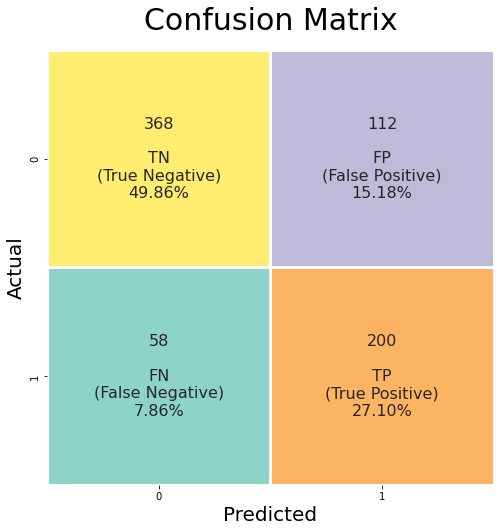

In [147]:
ConfusionMatrix(clf_RF_pipe, X, y, 10)

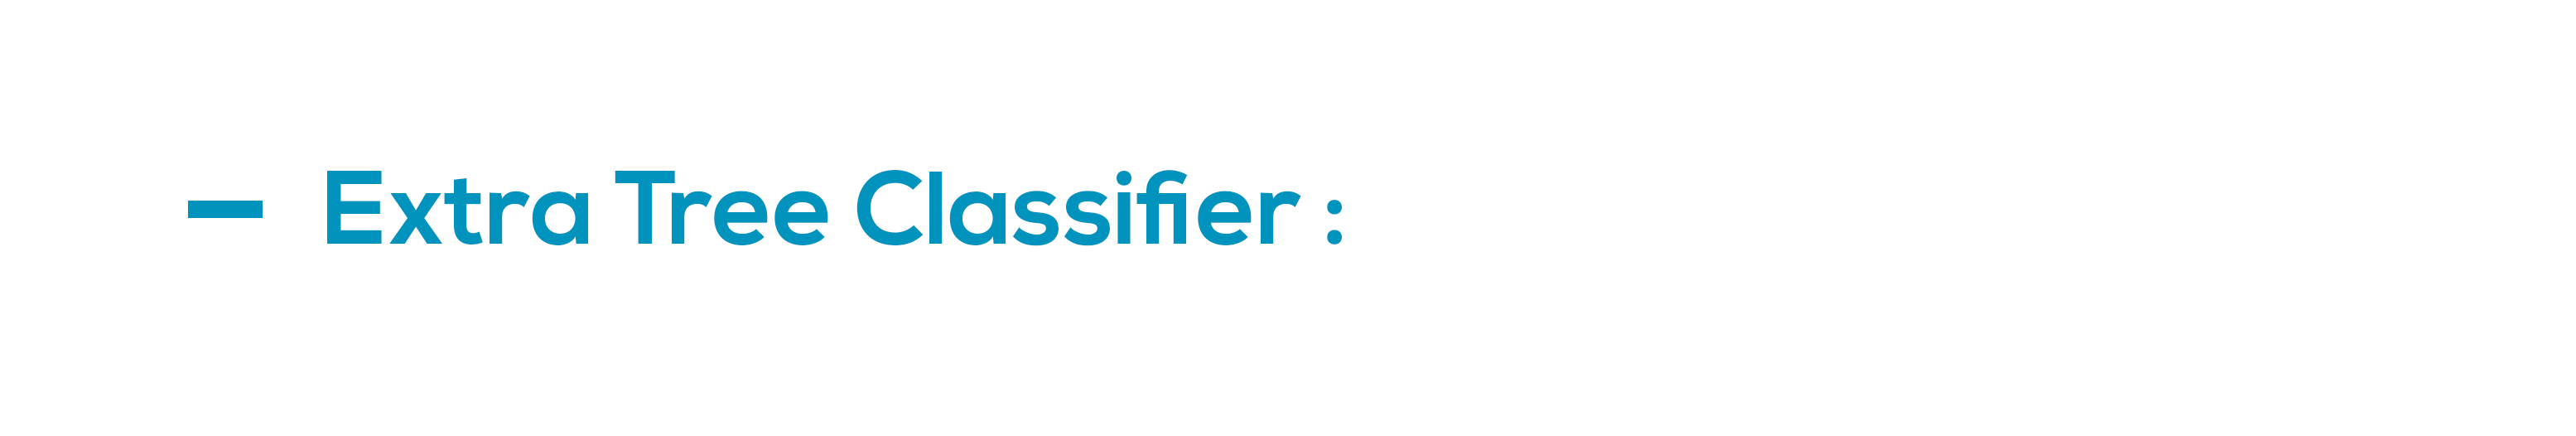

In [141]:
from sklearn.ensemble import ExtraTreesClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import StratifiedKFold

In [274]:
skf = StratifiedKFold(10, shuffle=True, random_state=42)

In [275]:
ETC_opt = ExtraTreesClassifier(
    bootstrap=True,
    warm_start=True,
    random_state=42
)

ETC_opt_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', ETC_opt)
    ]
)

In [276]:
search_spaces = {
    'estimator__n_estimators':Integer(30, 5000),
    'estimator__criterion':Categorical(["gini", "entropy"]),
    'estimator__max_depth':Integer(3, 13),
    'estimator__min_samples_split':Integer(2,15),
    'estimator__min_samples_leaf':Integer(1, 10),
    'estimator__max_features':Categorical([None,'sqrt', 'log2']),
    'estimator__max_samples':Real(0.01, 1.0, 'uniform')
}

In [277]:
opt = BayesSearchCV(
    estimator=ETC_opt_pipe,
    search_spaces=search_spaces,
    scoring='f1',
    n_points=2,
    cv=skf,
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    return_train_score=True
)

In [278]:
opt.fit(X, y)

BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('noise_outlier_transformer',
                                         DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                   Pipeline(steps=[('outliers_management_iqr',
                                                                                                    outliers_management_iqr())]),
                                                                                   ['Pregnancies',
                                                                                    'Age']),
                                                                                  ('outlier_transformer_zscore',
                                                                                   Pipeline(steps=[('noise_man...
                             'estimator__max_samples': Real(low=0.

In [279]:
pd.DataFrame( opt.cv_results_ ).to_csv(r'D:\Data Science\DataSet\Pima Indians Diabetes Database\Tuning\Modeling_ETC.csv')

In [280]:
opt.best_score_

0.7081940212596638

In [281]:
cv_results = pd.DataFrame( opt.cv_results_ )
cv_results = cv_results.loc[:, ['params', 'mean_test_score', 'rank_test_score',
                                'mean_train_score','rank_train_score']
                           ].sort_values(by=['mean_test_score','mean_train_score'], ascending=[False,True]).head(50)

cv_results.insert(1, 'Train/Test Difference %', (cv_results['mean_train_score']-cv_results['mean_test_score'])*100)
cv_results.head()

,params,Train/Test Difference %,mean_test_score,rank_test_score,mean_train_score,rank_train_score
15,"{'estimator__criterion': 'entropy', 'estimator...",8.407707,0.708194,1,0.792271,8
37,"{'estimator__criterion': 'entropy', 'estimator...",2.303942,0.706232,2,0.729271,23
14,"{'estimator__criterion': 'gini', 'estimator__m...",12.300262,0.705819,3,0.828821,4
11,"{'estimator__criterion': 'entropy', 'estimator...",9.821243,0.704414,4,0.802626,7
21,"{'estimator__criterion': 'gini', 'estimator__m...",6.207863,0.703920,5,0.765999,12


In [282]:
cv_results.loc[37]['params']

OrderedDict([('estimator__criterion', 'entropy'),
             ('estimator__max_depth', 11),
             ('estimator__max_features', 'sqrt'),
             ('estimator__max_samples', 1.0),
             ('estimator__min_samples_leaf', 10),
             ('estimator__min_samples_split', 2),
             ('estimator__n_estimators', 30)])

In [242]:
clf_ETC = ExtraTreesClassifier(
    max_depth=11, criterion='entropy',
    max_features='sqrt', max_samples=1.0,
    min_samples_leaf=10, min_samples_split=2,
    n_estimators=30, bootstrap=True,
    warm_start=True, random_state=42
)

clf_ETC_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', clf_ETC)
    ]
)

In [243]:
scores_etc = Cross_Validation_Classificaton(clf_ETC_pipe, X, y, 10)
scores_etc

Accuracy                       Recall                    Precision  \
     Train Score Validation Score Train Score Validation Score Train Score   
1       0.778614         0.810811    0.823276         0.846154    0.643098   
2       0.802711         0.689189    0.844828         0.769231    0.673540   
3       0.781627         0.783784    0.823276         0.884615    0.647458   
4       0.778614         0.770270    0.827586         0.846154    0.642140   
5       0.780120         0.756757    0.823276         0.884615    0.645270   
6       0.775602         0.797297    0.818966         0.884615    0.639731   
7       0.796687         0.729730    0.767241         0.730769    0.687259   
8       0.772590         0.810811    0.831897         0.730769    0.632787   
9       0.768421         0.876712    0.824034         0.920000    0.629508   
10      0.778947         0.767123    0.836910         0.720000    0.641447   
Mean    0.781393         0.779248    0.822129         0.821692    0.648224   

                               F1                      roc_auc  \
     Validation Score Train Score Validation Score Train Score   
1            0.687500    0.722117         0.758621    0.788953   
2            0.540541    0.749522         0.634921    0.812460   
3            0.638889    0.724858         0.741935    0.791268   
4            0.628571    0.723164         0.721311    0.789951   
5            0.605263    0.723485         0.718750    0.790110   
6            0.657143    0.718336         0.754098    0.785640   
7            0.593750    0.725051         0.655172    0.789871   
8            0.730769    0.718808         0.730769    0.786319   
9            0.766667    0.713755         0.836364    0.781230   
10           0.642857    0.726257         0.679245    0.792298   
Mean         0.649195    0.724535         0.723119    0.790810   

                       
     Validation Score  
1            0.818910  
2            0.707532  
3            0.806891  
4            0.787660  
5            0.786058  
6            0.817308  
7            0.729968  
8            0.792468  
9            0.887083  
10           0.755833  
Mean         0.788971

In [244]:
scores.loc['Extra Trees Classifier'] = scores_etc.loc['Mean']

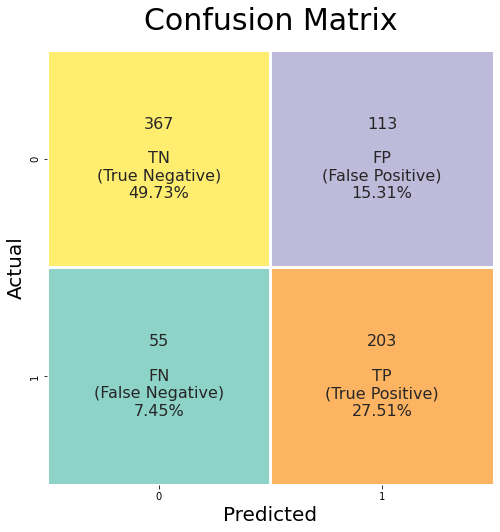

In [152]:
ConfusionMatrix(clf_ETC_pipe, X, y, 10)

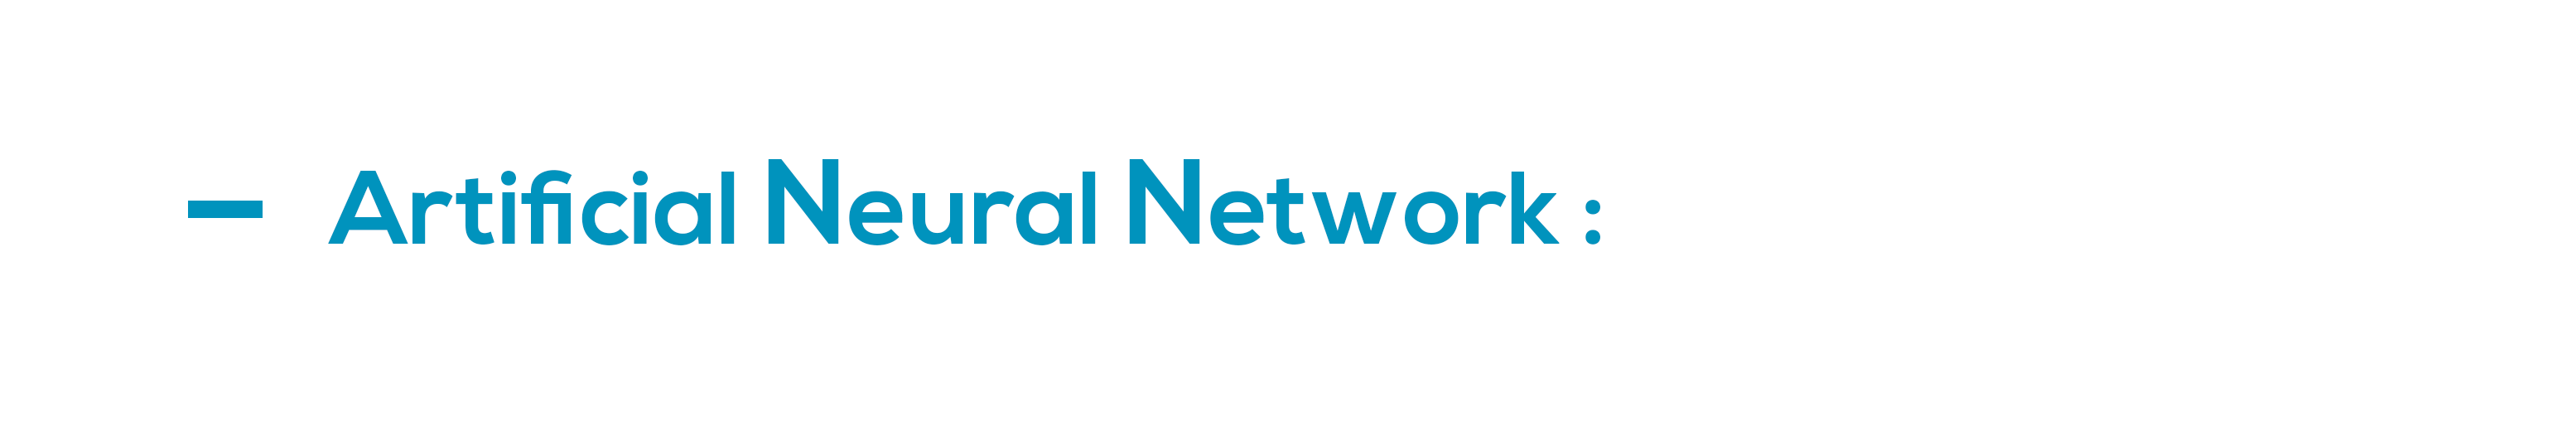

* by the rule of thumb for **binary classification** cases, especially those that are not high dimensional, a Neural Network estimator with one or maximally two hidden layer gives us the best result, in terms of accuracy. but to find out the best number of hidden layers and their neurons, we msut tune these hyperparameters.<br></br>
to do so we start with a wider range for each parameter and then we try to specify these parameters step by step :

## Step I: MLP Tuning

In [143]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [158]:
skf = StratifiedKFold(5, shuffle=True, random_state=42)

In [159]:
MLP_opt = MLPClassifier(
    random_state=42,
    warm_start=True,
    early_stopping=True,
    n_iter_no_change=30
)


MLP_opt_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', MLP_opt)
    ]
)

In [160]:
hidden_layer_sizes_1 = [
    (20,),(40,),(60,),(80,),(100,),(120,),
    (120,40),(120,80),(120,100),(120,120),
    (100,40),(100,80),(100,100),
    (80,40),(80,80),
    (60,40),(60,60),
]

In [161]:
param_grid = {
    'estimator__hidden_layer_sizes':hidden_layer_sizes_1,
    'estimator__activation':['tanh', 'relu'],
    'estimator__solver':['lbfgs', 'adam'],
    'estimator__learning_rate':['invscaling', 'adaptive'],
    'estimator__learning_rate_init':[0.001, 0.01, 0.1],
    'estimator__momentum':[0.1, 0.5, 0.9]
}

In [162]:
GS = GridSearchCV(MLP_opt_pipe, param_grid, cv=skf, scoring="f1", n_jobs=-1 ,return_train_score=True)

In [163]:
%time GS.fit(X, y)

CPU times: total: 1min 20s
Wall time: 13min 47s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('noise_outlier_transformer',
                                        DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                  Pipeline(steps=[('outliers_management_iqr',
                                                                                                   outliers_management_iqr())]),
                                                                                  ['Pregnancies',
                                                                                   'Age']),
                                                                                 ('outlier_transformer_zscore',
                                                                                  Pipeline(steps=[('noise_manag...
                         'estimator__hidden_layer_sizes': [(20,), (40,), (

In [347]:
cv_results = pd.DataFrame( GS.cv_results_ )
cv_results = cv_results.iloc[:,[16,24,4,5,6,7,8,9]].sort_values(
    by=['mean_test_score','mean_train_score'], ascending=[False,True]
)

cv_results.insert(2, 'Train/Test Difference %', (cv_results['mean_train_score']-cv_results['mean_test_score'])*100)

cv_results[cv_results['Train/Test Difference %']<4].head(24)

,mean_test_score,mean_train_score,Train/Test Difference %,param_estimator__activation,param_estimator__hidden_layer_sizes,param_estimator__learning_rate,param_estimator__learning_rate_init,param_estimator__momentum,param_estimator__solver
1123,0.698599,0.737162,3.856253,relu,"(80, 80)",invscaling,0.010,0.1,adam
1125,0.698599,0.737162,3.856253,relu,"(80, 80)",invscaling,0.010,0.5,adam
1127,0.698599,0.737162,3.856253,relu,"(80, 80)",invscaling,0.010,0.9,adam
1141,0.698599,0.737162,3.856253,relu,"(80, 80)",adaptive,0.010,0.1,adam
1143,0.698599,0.737162,3.856253,relu,"(80, 80)",adaptive,0.010,0.5,adam
1145,0.698599,0.737162,3.856253,relu,"(80, 80)",adaptive,0.010,0.9,adam
661,0.697358,0.727356,2.999858,relu,"(40,)",invscaling,0.100,0.1,adam
663,0.697358,0.727356,2.999858,relu,"(40,)",invscaling,0.100,0.5,adam
665,0.697358,0.727356,2.999858,relu,"(40,)",invscaling,0.100,0.9,adam
679,0.697358,0.727356,2.999858,relu,"(40,)",adaptive,0.100,0.1,adam


* these 24 estimators are the most accurate ones, to reach more specific parameters:<br></br>
1) all of these estimators have the same **activation=`relu`** and **solver=`adam`**<br></br>
2) for **learning_rate**, **invscaling** and **adaptive** bring the same result. so it does not make any difference which one to use. we will apply **`adaptive`** as the learning_rate<br></br>
3) since we are using adaptive learning_rate, **momentum** seems to have no effect on the result, so we continue with the default **momentum=`0.9`**<br></br>
4) for the number of neurons and hidden layers, we search around the layers of these 24 estimators

## Step II: MLP Tuning

In [229]:
MLP_opt = MLPClassifier(
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    momentum=0.9,
    random_state=42,
    warm_start=True,
    early_stopping=True,
    n_iter_no_change=30
)


MLP_opt_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', MLP_opt)
    ]
)

In [230]:
hidden_layer_sizes_2 = [
    (30,),(35,),(40,),(45,),(50,),
    (70,30),(75,30),(80,30),(85,30),(90,30),(95,30),(100,30),(105,30),(110,30),
    (70,35),(75,35),(80,35),(85,35),(90,35),(95,35),(100,35),(105,35),(110,35),
    (70,40),(75,40),(80,40),(85,40),(90,40),(95,40),(100,40),(105,40),(110,40),
    (70,45),(75,45),(80,45),(85,45),(90,45),(95,45),(100,45),(105,45),(110,45),
    (70,50),(75,50),(80,50),(85,50),(90,50),(95,50),(100,50),(105,50),(110,50),
    (70,70),(75,70),(80,70),(85,70),(90,70),
    (75,75),(75,80),(75,85),(75,90),
    (80,80),(80,85),(80,90),
    (85,85),(85,90),
    (90,90)
]

In [231]:
param_grid = {
    'estimator__hidden_layer_sizes':hidden_layer_sizes_2,
    'estimator__learning_rate_init':[0.001, 0.01, 0.1]
}

In [232]:
GS = GridSearchCV(MLP_opt_pipe, param_grid, cv=skf, scoring="f1", n_jobs=-1 ,return_train_score=True)

In [233]:
%time GS.fit(X, y)

CPU times: total: 15 s
Wall time: 1min 28s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('noise_outlier_transformer',
                                        DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                  Pipeline(steps=[('outliers_management_iqr',
                                                                                                   outliers_management_iqr())]),
                                                                                  ['Pregnancies',
                                                                                   'Age']),
                                                                                 ('outlier_transformer_zscore',
                                                                                  Pipeline(steps=[('noise_manag...
             param_grid={'estimator__hidden_layer_sizes': [(30,), (35,), (

In [363]:
cv_results = pd.DataFrame( GS.cv_results_ )
cv_results = cv_results.iloc[:,[12, 20, 4, 5]].sort_values(
    by=['mean_test_score','mean_train_score'], ascending=[False,True]
)

cv_results.insert(2, 'Train/Test Difference %', (cv_results['mean_train_score']-cv_results['mean_test_score'])*100)

cv_results.head()

,mean_test_score,mean_train_score,Train/Test Difference %,param_estimator__hidden_layer_sizes,param_estimator__learning_rate_init
61,0.708277,0.726856,1.857961,"(100, 35)",0.01
145,0.706627,0.726649,2.002261,"(105, 50)",0.01
188,0.704781,0.690566,-1.421421,"(85, 85)",0.10
73,0.703912,0.709045,0.513279,"(75, 40)",0.01
25,0.702002,0.731013,2.901069,"(85, 30)",0.01


In [364]:
cv_results[ (cv_results['mean_test_score']>0.7)&(cv_results['Train/Test Difference %']<3) ]

,mean_test_score,mean_train_score,Train/Test Difference %,param_estimator__hidden_layer_sizes,param_estimator__learning_rate_init
61,0.708277,0.726856,1.857961,"(100, 35)",0.01
145,0.706627,0.726649,2.002261,"(105, 50)",0.01
188,0.704781,0.690566,-1.421421,"(85, 85)",0.10
73,0.703912,0.709045,0.513279,"(75, 40)",0.01
25,0.702002,0.731013,2.901069,"(85, 30)",0.01


## Step III: MLP Tuning (Final)

In [250]:
MLP_opt = MLPClassifier(
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    momentum=0.9,
    random_state=42,
    warm_start=True,
    early_stopping=True,
    n_iter_no_change=30
)


MLP_opt_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', MLP_opt)
    ]
)

In [251]:
hidden_layer_sizes_3 = [
    (96,31),(97,31),(98,31),(99,31),(100,31),(101,31),(102,31),(103,31),(104,31),
    (96,32),(97,32),(98,32),(99,32),(100,32),(101,32),(102,32),(103,32),(104,32),
    (96,33),(97,33),(98,33),(99,33),(100,33),(101,33),(102,33),(103,33),(104,33),
    (96,34),(97,34),(98,34),(99,34),(100,34),(101,34),(102,34),(103,34),(104,34),
    (96,35),(97,35),(98,35),(99,35),(100,35),(101,35),(102,35),(103,35),(104,35),
    (96,36),(97,36),(98,36),(99,36),(100,36),(101,36),(102,36),(103,36),(104,36),
    (96,37),(97,37),(98,37),(99,37),(100,37),(101,37),(102,37),(103,37),(104,37),
    (96,38),(97,38),(98,38),(99,38),(100,38),(101,38),(102,38),(103,38),(104,38),
    (96,39),(97,39),(98,39),(99,39),(100,39),(101,39),(102,39),(103,39),(104,39),  
    (101,46),(102,46),(103,46),(104,46),(105,46),(106,46),(107,46),(108,46),(109,46),
    (101,47),(102,47),(103,47),(104,47),(105,47),(106,47),(107,47),(108,47),(109,47),
    (101,48),(102,48),(103,48),(104,48),(105,48),(106,48),(107,48),(108,48),(109,48),
    (101,49),(102,49),(103,49),(104,49),(105,49),(106,49),(107,49),(108,49),(109,49),
    (101,50),(102,50),(103,50),(104,50),(105,50),(106,50),(107,50),(108,50),(109,50),
    (101,51),(102,51),(103,51),(104,51),(105,51),(106,51),(107,51),(108,51),(109,51),
    (101,52),(102,52),(103,52),(104,52),(105,52),(106,52),(107,52),(108,52),(109,52),
    (101,53),(102,53),(103,53),(104,53),(105,53),(106,53),(107,53),(108,53),(109,53),
    (101,54),(102,54),(103,54),(104,54),(105,54),(106,54),(107,54),(108,54),(109,54),
    (71,36),(72,36),(73,36),(74,36),(75,36),(76,36),(77,36),(78,36),(79,36),
    (71,37),(72,37),(73,37),(74,37),(75,37),(76,37),(77,37),(78,37),(79,37),
    (71,38),(72,38),(73,38),(74,38),(75,38),(76,38),(77,38),(78,38),(79,38),
    (71,39),(72,39),(73,39),(74,39),(75,39),(76,39),(77,39),(78,39),(79,39),
    (71,40),(72,40),(73,40),(74,40),(75,40),(76,40),(77,40),(78,40),(79,40),
    (71,41),(72,41),(73,41),(74,41),(75,41),(76,41),(77,41),(78,41),(79,41),
    (71,42),(72,42),(73,42),(74,42),(75,42),(76,42),(77,42),(78,42),(79,42),
    (71,43),(72,43),(73,43),(74,43),(75,43),(76,43),(77,43),(78,43),(79,43),
    (71,44),(72,44),(73,44),(74,44),(75,44),(76,44),(77,44),(78,44),(79,44),
    (81,26),(82,26),(83,26),(84,26),(85,26),(86,26),(87,26),(88,26),(89,26),
    (81,27),(82,27),(83,27),(84,27),(85,27),(86,27),(87,27),(88,27),(89,27),
    (81,28),(82,28),(83,28),(84,28),(85,28),(86,28),(87,28),(88,28),(89,28),
    (81,29),(82,29),(83,29),(84,29),(85,29),(86,29),(87,29),(88,29),(89,29),
    (81,30),(82,30),(83,30),(84,30),(85,30),(86,30),(87,30),(88,30),(89,30),
    (81,31),(82,31),(83,31),(84,31),(85,31),(86,31),(87,31),(88,31),(89,31),
    (81,32),(82,32),(83,32),(84,32),(85,32),(86,32),(87,32),(88,32),(89,32),
    (81,33),(82,33),(83,33),(84,33),(85,33),(86,33),(87,33),(88,33),(89,33),
    (81,34),(82,34),(83,34),(84,34),(85,34),(86,34),(87,34),(88,34),(89,34)
]

hidden_layer_sizes_4 = [
    (81,81),(82,81),(83,81),(84,81),(85,81),(86,81),(87,81),(88,81),(89,81),
    (81,82),(82,82),(83,82),(84,82),(85,82),(86,82),(87,82),(88,82),(89,82),
    (81,83),(82,83),(83,83),(84,83),(85,83),(86,83),(87,83),(88,83),(89,83),
    (81,84),(82,84),(83,84),(84,84),(85,84),(86,84),(87,84),(88,84),(89,84),
    (81,85),(82,85),(83,85),(84,85),(85,85),(86,85),(87,85),(88,85),(89,85),
    (81,86),(82,86),(83,86),(84,86),(85,86),(86,86),(87,86),(88,86),(89,86),
    (81,87),(82,87),(83,87),(84,87),(85,87),(86,87),(87,87),(88,87),(89,87),
    (81,88),(82,88),(83,88),(84,88),(85,88),(86,88),(87,88),(88,88),(89,88),
    (81,89),(82,89),(83,89),(84,89),(85,89),(86,89),(87,89),(88,89),(89,89),
]

In [252]:
param_grid = [
    {'estimator__hidden_layer_sizes':hidden_layer_sizes_3,
     'estimator__learning_rate_init':[0.01]},
    {'estimator__hidden_layer_sizes':hidden_layer_sizes_4,
     'estimator__learning_rate_init':[0.1]}
]

In [253]:
GS = GridSearchCV(MLP_opt_pipe, param_grid, cv=skf, scoring="f1", n_jobs=-1 ,return_train_score=True)

In [254]:
%time GS.fit(X, y)

CPU times: total: 26 s
Wall time: 2min 58s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('noise_outlier_transformer',
                                        DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                  Pipeline(steps=[('outliers_management_iqr',
                                                                                                   outliers_management_iqr())]),
                                                                                  ['Pregnancies',
                                                                                   'Age']),
                                                                                 ('outlier_transformer_zscore',
                                                                                  Pipeline(steps=[('noise_manag...
                         {'estimator__hidden_layer_sizes': [(81, 81), (82,

In [256]:
cv_results = pd.DataFrame( GS.cv_results_ )
cv_results = cv_results.loc[:, ['params', 'mean_test_score', 'rank_test_score','mean_train_score']
                           ].sort_values(by=['mean_test_score','mean_train_score'], ascending=[False,True])

cv_results.insert(1, 'Train/Test Difference %', (cv_results['mean_train_score']-cv_results['mean_test_score'])*100)
cv_results.head()

,params,Train/Test Difference %,mean_test_score,rank_test_score,mean_train_score
314,"{'estimator__hidden_layer_sizes': (89, 33), 'e...",1.002889,0.713037,1,0.723066
206,"{'estimator__hidden_layer_sizes': (79, 40), 'e...",0.698641,0.710556,2,0.717543
101,"{'estimator__hidden_layer_sizes': (103, 48), '...",1.647657,0.708530,3,0.725007
40,"{'estimator__hidden_layer_sizes': (100, 35), '...",1.857961,0.708277,4,0.726856
121,"{'estimator__hidden_layer_sizes': (105, 50), '...",2.002261,0.706627,5,0.726649


In [257]:
GS.best_params_

{'estimator__hidden_layer_sizes': (89, 33),
 'estimator__learning_rate_init': 0.01}

In [245]:
clf_MLP = MLPClassifier(
    hidden_layer_sizes=(89,33),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    learning_rate_init=0.01,
    momentum=0.9,
    random_state=42,
    warm_start=True,
    early_stopping=True,
    n_iter_no_change=30
)

clf_MLP_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', clf_MLP)
    ]
)

In [246]:
scores_mlp = Cross_Validation_Classificaton(clf_MLP_pipe, X, y, 10)
scores_mlp

Accuracy                       Recall                    Precision  \
     Train Score Validation Score Train Score Validation Score Train Score   
1       0.805723         0.783784    0.801724         0.807692    0.691450   
2       0.783133         0.729730    0.875000         0.846154    0.638365   
3       0.756024         0.810811    0.879310         0.961538    0.603550   
4       0.748494         0.675676    0.935345         0.884615    0.588076   
5       0.739458         0.702703    0.918103         0.961538    0.580381   
6       0.745482         0.770270    0.913793         0.923077    0.587258   
7       0.778614         0.729730    0.896552         0.884615    0.628399   
8       0.757530         0.770270    0.913793         0.807692    0.600567   
9       0.775940         0.849315    0.866953         0.880000    0.631250   
10      0.729323         0.726027    0.939914         0.880000    0.568831   
Mean    0.761972         0.754832    0.894049         0.883692    0.611813   

                               F1                      roc_auc  \
     Validation Score Train Score Validation Score Train Score   
1            0.656250    0.742515         0.724138    0.804797   
2            0.578947    0.738182         0.687500    0.804398   
3            0.657895    0.715789         0.781250    0.784563   
4            0.522727    0.722130         0.657143    0.791746   
5            0.543478    0.711185         0.694444    0.780811   
6            0.615385    0.715008         0.738462    0.784443   
7            0.575000    0.738899         0.696970    0.805915   
8            0.636364    0.724786         0.711864    0.793702   
9            0.733333    0.730561         0.800000    0.796902   
10           0.564103    0.708738         0.687500    0.777827   
Mean         0.608348    0.724779         0.717927    0.792510   

                       
     Validation Score  
1            0.789263  
2            0.756410  
3            0.845353  
4            0.723558  
5            0.762019  
6            0.805288  
7            0.765224  
8            0.778846  
9            0.856667  
10           0.762917  
Mean         0.784554

In [247]:
scores.loc['Neural Network MLP'] = scores_mlp.loc['Mean']

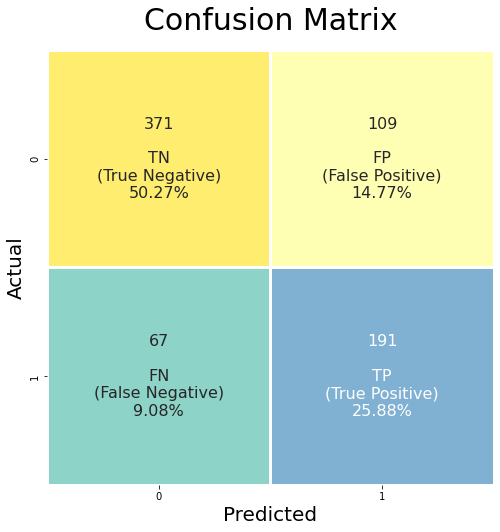

In [157]:
ConfusionMatrix(clf_MLP_pipe,X,y,10)

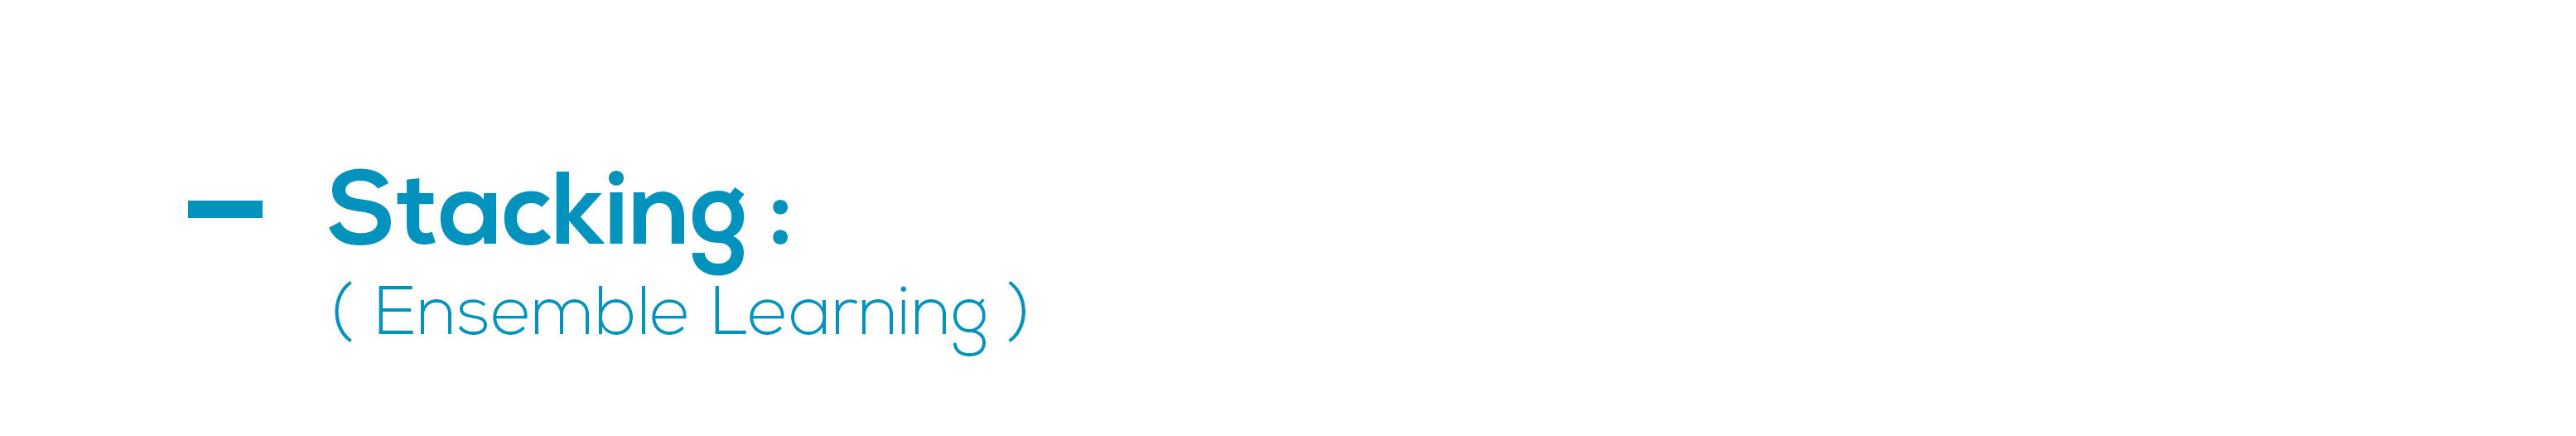

* for the **meta classifier** we use MLP neural network. again as it is a **binary classification** case, a Neural Network estimator with one or maximally two hidden layer gives us the best result, in terms of accuracy. but to find out the best number of hidden layers and their neurons, we msut tune these hyperparameters.<br></br>
to do so we start with a wider range for each parameter and then we try to specify these parameters step by step :

# Step I: meta_classifier Tuning

In [267]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [268]:
skf = StratifiedKFold(5, shuffle=True, random_state=42)

In [269]:
from mlxtend.classifier import StackingCVClassifier

SCVC = StackingCVClassifier(
    classifiers = [clf_SVC, clf_logreg, clf_gnb, clf_lgbm, clf_xgb, clf_RF, clf_ETC, clf_MLP],
    meta_classifier=MLPClassifier(
        solver='adam',
        learning_rate='adaptive',
        random_state=42,
        warm_start=True,
        early_stopping=True,
        n_iter_no_change=30
    ),
    use_probas=True,
    drop_proba_col='first',
    cv=5,
    random_state=42
)

SCVC_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', SCVC)
    ]
)

In [270]:
hidden_layer_sizes_meta_1 = [
    (20,),(40,),(60,),(80,),(100,),(120,),
    (120,40),(120,80),(120,100),(120,120),
    (100,40),(100,80),(100,100),
    (80,40),(80,80),
    (60,40),(60,60),
]

param_grid = {
    'estimator__meta_classifier__hidden_layer_sizes':hidden_layer_sizes_meta_1,
    'estimator__meta_classifier__activation':['tanh', 'relu'],
    'estimator__meta_classifier__learning_rate_init':[0.001, 0.01, 0.1]
}

In [271]:
GS = GridSearchCV(SCVC_pipe, param_grid, cv=skf, n_jobs=-1, scoring="f1",return_train_score=True)

In [272]:
GS.fit(X, y)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('noise_outlier_transformer',
                                        DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                  Pipeline(steps=[('outliers_management_iqr',
                                                                                                   outliers_management_iqr())]),
                                                                                  ['Pregnancies',
                                                                                   'Age']),
                                                                                 ('outlier_transformer_zscore',
                                                                                  Pipeline(steps=[('noise_manag...
             param_grid={'estimator__meta_classifier__activation': ['tanh'

In [162]:
cv_results = pd.DataFrame( GS.cv_results_ )
cv_results = cv_results.iloc[:,[13, 21, 4, 5, 6, 7]].sort_values(
    by=['mean_test_score','mean_train_score'], ascending=[False,True]
)

cv_results.insert(2, 'Train/Test Difference %', (cv_results['mean_train_score']-cv_results['mean_test_score'])*100)

cv_results.head(10)

,mean_test_score,mean_train_score,Train/Test Difference %,param_estimator__meta_classifier__activation,param_estimator__meta_classifier__hidden_layer_sizes,param_estimator__meta_classifier__learning_rate_init,params
70,0.701005,0.718926,1.792081,relu,"(120, 40)",0.010,{'estimator__meta_classifier__activation': 're...
14,0.700453,0.730862,3.040892,tanh,"(100,)",0.100,{'estimator__meta_classifier__activation': 'ta...
64,0.699229,0.720271,2.104194,relu,"(100,)",0.010,{'estimator__meta_classifier__activation': 're...
94,0.698187,0.724654,2.646696,relu,"(80, 80)",0.010,{'estimator__meta_classifier__activation': 're...
53,0.697578,0.721565,2.398714,relu,"(20,)",0.100,{'estimator__meta_classifier__activation': 're...
27,0.695384,0.733839,3.845474,tanh,"(120, 120)",0.001,{'estimator__meta_classifier__activation': 'ta...
39,0.695351,0.722190,2.683846,tanh,"(80, 40)",0.001,{'estimator__meta_classifier__activation': 'ta...
36,0.694849,0.721972,2.712354,tanh,"(100, 100)",0.001,{'estimator__meta_classifier__activation': 'ta...
3,0.693409,0.684796,-0.861373,tanh,"(40,)",0.001,{'estimator__meta_classifier__activation': 'ta...
16,0.693360,0.727874,3.451360,tanh,"(120,)",0.010,{'estimator__meta_classifier__activation': 'ta...


# Step II: meta_classifier Tuning (more accurate number of neurons)

In [163]:
sclf_opt = StackingCVClassifier(
    classifiers=[clf_SVC, clf_logreg, clf_gnb, clf_lgbm, clf_xgb, clf_RF, clf_ETC, clf_MLP],
    meta_classifier=MLPClassifier(
        solver='adam',
        learning_rate='adaptive',
        random_state=42,
        warm_start=True,
        early_stopping=True,
        n_iter_no_change=30
    ),
    cv=skf,
    use_probas=True,
    drop_proba_col='first',
    random_state=42
)

sclf_opt_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', sclf_opt)
    ]
)

In [164]:
hidden_layer_sizes_meta_2 = [
    (115,35),(116,35),(117,35),(118,35),(119,35),(120,35),(121,35),(122,35),(123,35),(124,35),(125,35),
    (115,36),(116,36),(117,36),(118,36),(119,36),(120,36),(121,36),(122,36),(123,36),(124,36),(125,36),
    (115,37),(116,37),(117,37),(118,37),(119,37),(120,37),(121,37),(122,37),(123,37),(124,37),(125,37),
    (115,38),(116,38),(117,38),(118,38),(119,38),(120,38),(121,38),(122,38),(123,38),(124,38),(125,38),
    (115,39),(116,39),(117,39),(118,39),(119,39),(120,39),(121,39),(122,39),(123,39),(124,39),(125,39),
    (115,40),(116,40),(117,40),(118,40),(119,40),(120,40),(121,40),(122,40),(123,40),(124,40),(125,40),
    (115,41),(116,41),(117,41),(118,41),(119,41),(120,41),(121,41),(122,41),(123,41),(124,41),(125,41),
    (115,42),(116,42),(117,42),(118,42),(119,42),(120,42),(121,42),(122,42),(123,42),(124,42),(125,42),
    (115,43),(116,43),(117,43),(118,43),(119,43),(120,43),(121,43),(122,43),(123,43),(124,43),(125,43),
    (115,44),(116,44),(117,44),(118,44),(119,44),(120,44),(121,44),(122,44),(123,44),(124,44),(125,44),
    (115,45),(116,45),(117,45),(118,45),(119,45),(120,45),(121,45),(122,45),(123,45),(124,45),(125,45),
    (95,),(96,),(97,),(98,),(99,),(100,),(101,),(102,),(103,),(104,),(105,),(106,),(107,),(108,),(109),(110,)
]


hidden_layer_sizes_meta_3 = [
    (95,),(96,),(97,),(98,),(99,),(100,),(101,),(102,),(103,),(104,),(105,),(106,),(107,),(108,),(109),(110,)
]


param_grid = [
    {'estimator__meta_classifier__hidden_layer_sizes':hidden_layer_sizes_meta_2,
     'estimator__meta_classifier__activation':['relu'],
     'estimator__meta_classifier__learning_rate_init':[0.01]},
    {'estimator__meta_classifier__hidden_layer_sizes':hidden_layer_sizes_meta_3,
     'estimator__meta_classifier__activation':['tanh'],
     'estimator__meta_classifier__learning_rate_init':[0.1]}
]

In [165]:
GS = GridSearchCV(sclf_opt_pipe, param_grid, cv=skf, n_jobs=-1, scoring="f1",return_train_score=True)

In [166]:
GS.fit(X, y)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('noise_outlier_transformer',
                                        DataFrameColumnTransformer(transformers=[('outlier_transformer_iqr',
                                                                                  Pipeline(steps=[('outliers_management_iqr',
                                                                                                   outliers_management_iqr())]),
                                                                                  ['Pregnancies',
                                                                                   'Age']),
                                                                                 ('outlier_transformer_zscore',
                                                                                  Pipeline(steps=[('noise_manag...
                          'estimator__meta_classifier__learning_rate_init'

In [169]:
cv_results = pd.DataFrame( GS.cv_results_ )
cv_results = cv_results.iloc[:,[13, 21, 4, 5, 6, 7]].sort_values(
    by=['mean_test_score','mean_train_score'], ascending=[False,True]
)

cv_results.insert(2, 'Train/Test Difference %', (cv_results['mean_train_score']-cv_results['mean_test_score'])*100)

cv_results.head()

,mean_test_score,mean_train_score,Train/Test Difference %,param_estimator__meta_classifier__activation,param_estimator__meta_classifier__hidden_layer_sizes,param_estimator__meta_classifier__learning_rate_init,params
40,0.708228,0.724289,1.606095,relu,"(122, 38)",0.01,{'estimator__meta_classifier__activation': 're...
144,0.704122,0.728657,2.453551,tanh,"(102,)",0.1,{'estimator__meta_classifier__activation': 'ta...
112,0.701632,0.733140,3.150787,relu,"(117, 45)",0.01,{'estimator__meta_classifier__activation': 're...
60,0.701005,0.718926,1.792081,relu,"(120, 40)",0.01,{'estimator__meta_classifier__activation': 're...
9,0.700869,0.723542,2.267345,relu,"(124, 35)",0.01,{'estimator__meta_classifier__activation': 're...


# Final Stacking Model:

In [293]:
meta_clf_MLP = MLPClassifier(
    hidden_layer_sizes=(102,), activation='tanh',
    solver='adam', learning_rate='adaptive',
    learning_rate_init=0.1, warm_start=True,
    early_stopping=True, n_iter_no_change=30,
    random_state=42 
)

In [294]:
skf = StratifiedKFold(5, shuffle=True, random_state=42)

clf_Stack = StackingCVClassifier(
    classifiers=[clf_SVC, clf_logreg, clf_gnb, clf_lgbm, clf_xgb, clf_RF, clf_ETC, clf_MLP],
    meta_classifier=meta_clf_MLP,
    cv=skf,
    use_probas=True,
    drop_proba_col='first',
    random_state=42
)

clf_Stack_pipe = imbpipeline(
    steps=[
        ( 'noise_outlier_transformer', noise_outlier_transformer),
        ( 'KNNImputer', DataFrameKNNImputer() ),
        ( 'FeatureSelection', FeatureSelection()),
        ( 'Scaler' , DataFrameMinMaxScaler() ),
        ( 'SMOTE', SMOTE(random_state=42, k_neighbors=40) ),
        ( 'estimator', clf_Stack)
    ]
)

In [295]:
scores_Stack = Cross_Validation_Classificaton(clf_Stack_pipe, X, y, 10)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100


In [297]:
scores_Stack

Accuracy                       Recall                    Precision  \
     Train Score Validation Score Train Score Validation Score Train Score   
1       0.727410         0.756757    0.900862         0.884615    0.569482   
2       0.795181         0.689189    0.762931         0.692308    0.686047   
3       0.784639         0.756757    0.762931         0.807692    0.667925   
4       0.786145         0.783784    0.750000         0.807692    0.674419   
5       0.790663         0.851351    0.797414         0.884615    0.667870   
6       0.790663         0.770270    0.823276         0.807692    0.660900   
7       0.792169         0.702703    0.801724         0.730769    0.669065   
8       0.807229         0.783784    0.840517         0.653846    0.681818   
9       0.786466         0.849315    0.798283         0.840000    0.661922   
10      0.789474         0.767123    0.811159         0.640000    0.663158   
Mean    0.785004         0.771103    0.804910         0.774923    0.660260   

                               F1                      roc_auc  \
     Validation Score Train Score Validation Score Train Score   
1            0.605263    0.697830         0.718750    0.767561   
2            0.545455    0.722449         0.610169    0.787716   
3            0.617647    0.712274         0.700000    0.779614   
4            0.656250    0.710204         0.724138    0.777778   
5            0.741935    0.726916         0.807018    0.792225   
6            0.636364    0.733205         0.711864    0.798212   
7            0.558824    0.729412         0.633333    0.794381   
8            0.708333    0.752896         0.680000    0.814935   
9            0.750000    0.723735         0.792453    0.789188   
10           0.666667    0.729730         0.653061    0.794468   
Mean         0.648674    0.723865         0.703079    0.789608   

                       
     Validation Score  
1            0.786058  
2            0.689904  
3            0.768429  
4            0.789263  
5            0.858974  
6            0.778846  
7            0.709135  
8            0.754006  
9            0.847083  
10           0.736667  
Mean         0.771837

In [298]:
scores.loc['Stacking'] = scores_Stack.loc['Mean']

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=138 will be ignored. Current value: min_data_in_leaf=100


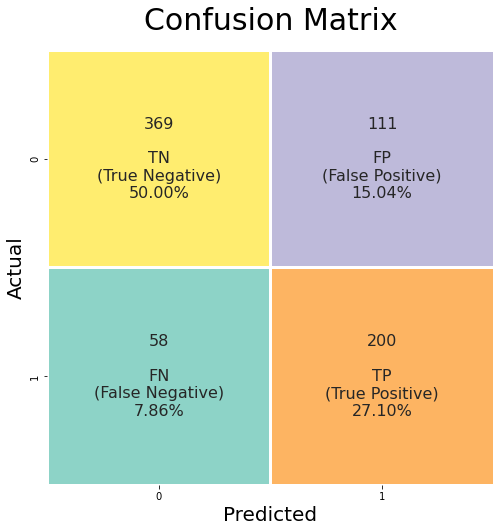

In [299]:
ConfusionMatrix(clf_Stack_pipe,X,y,10)

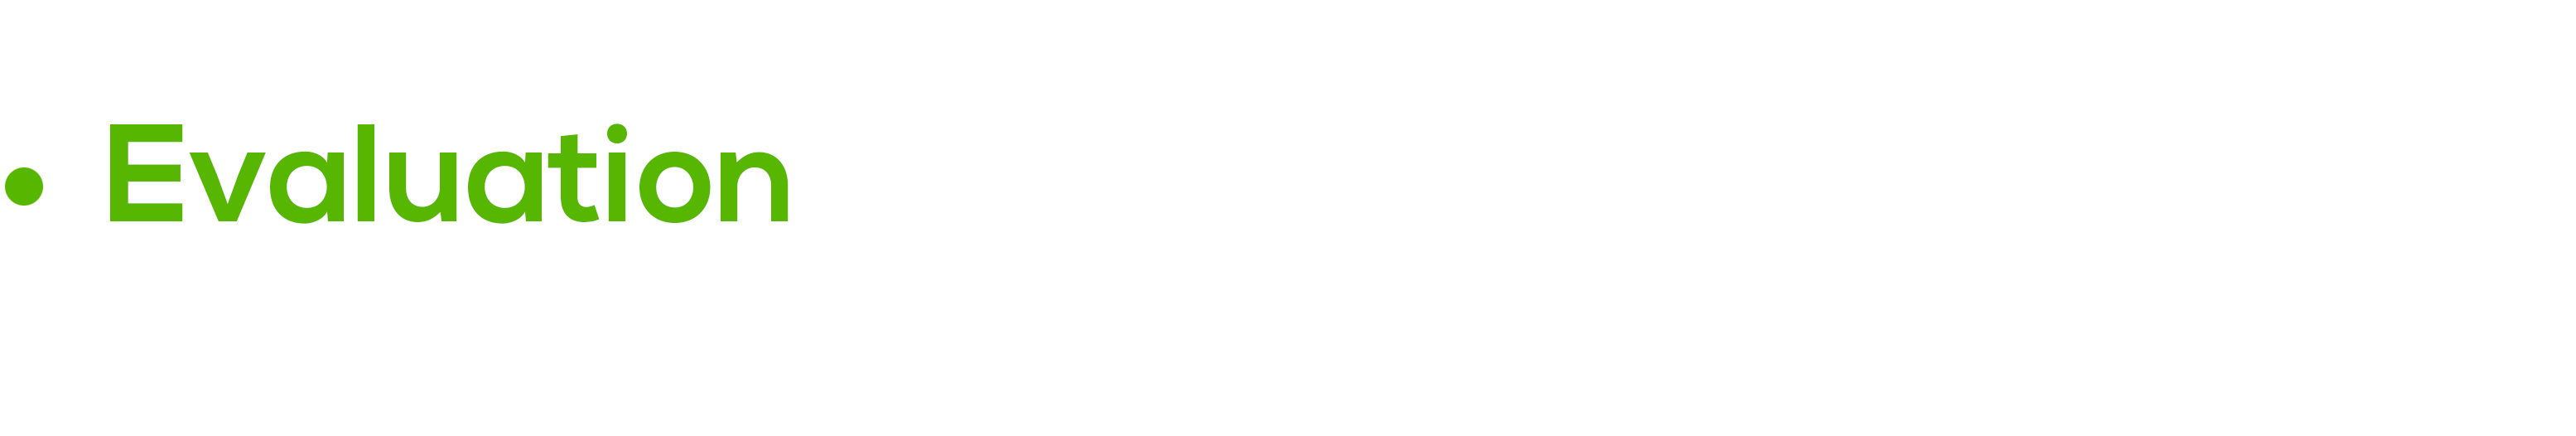

* for the modeling part of the project:<br></br>
<ul>
    <b>+</b> 3 classic Machine Learning algorithms (SVM, Logistic Regression, Naive Bayes) <br></br>
    <b>+</b> 4 Ensemble Tree base algorithm (LightGBM, XGBoost, Random Forest, Extra Tree Classifier) <br></br>
    <b>+</b> and 1 Stacking algorithm (based on all of the estimator) <br></br>
    have been tried
    </ul>
<br></br>
* here are the comparison of the algorithms in terms of `Evaluation Metrics`:

In [300]:
scores.style.background_gradient(cmap='Greens', low=0.5, high=0.8, axis=1)

# Accuracy:

In [309]:
scores['Accuracy']['Validation Score'].sort_values(ascending=False)

Extra Trees Classifier    0.779248
Stacking                  0.771103
Random Forest             0.769752
lightgbm                  0.760311
Neural Network MLP        0.754832
Logistic Regression       0.753517
Gaussian Naive Bayes      0.748038
SVC                       0.730415
xgboost                   0.716864
Name: Validation Score, dtype: float64

# Recall

In [312]:
scores['Recall']['Validation Score'].sort_values(ascending=False)

Neural Network MLP        0.883692
xgboost                   0.871846
SVC                       0.836923
Extra Trees Classifier    0.821692
Random Forest             0.775077
Stacking                  0.774923
lightgbm                  0.763538
Gaussian Naive Bayes      0.744000
Logistic Regression       0.712923
Name: Validation Score, dtype: float64

# Precision

In [313]:
scores['Precision']['Validation Score'].sort_values(ascending=False)

Extra Trees Classifier    0.649195
Stacking                  0.648674
Random Forest             0.645504
Logistic Regression       0.637537
lightgbm                  0.634445
Gaussian Naive Bayes      0.623119
Neural Network MLP        0.608348
SVC                       0.581756
xgboost                   0.562190
Name: Validation Score, dtype: float64

# F1 Score

In [314]:
scores['F1']['Validation Score'].sort_values(ascending=False)

Extra Trees Classifier    0.723119
Neural Network MLP        0.717927
Stacking                  0.703079
Random Forest             0.701437
lightgbm                  0.688822
SVC                       0.684531
xgboost                   0.682326
Gaussian Naive Bayes      0.672530
Logistic Regression       0.668424
Name: Validation Score, dtype: float64

# Area Under the ROC curve

In [316]:
scores['roc_auc']['Validation Score'].sort_values(ascending=False)

Extra Trees Classifier    0.788971
Neural Network MLP        0.784554
Stacking                  0.771837
Random Forest             0.770872
lightgbm                  0.760936
SVC                       0.754920
xgboost                   0.752590
Gaussian Naive Bayes      0.747000
Logistic Regression       0.743962
Name: Validation Score, dtype: float64

* **`Extra Tree Classifier`** has the highest ranking in all of the **Evaluation Metrics** except **Recall score**, which means our best estimator is the **`Extra Tree Classifier`** <br></br>
* **`Extremely Randomized Trees Classifier` (Extra Trees Classifier)** is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [317]:
Cross_Validation_Classificaton(clf_ETC_pipe, X, y, 10)

Accuracy                       Recall                    Precision  \
     Train Score Validation Score Train Score Validation Score Train Score   
1       0.778614         0.810811    0.823276         0.846154    0.643098   
2       0.802711         0.689189    0.844828         0.769231    0.673540   
3       0.781627         0.783784    0.823276         0.884615    0.647458   
4       0.778614         0.770270    0.827586         0.846154    0.642140   
5       0.780120         0.756757    0.823276         0.884615    0.645270   
6       0.775602         0.797297    0.818966         0.884615    0.639731   
7       0.796687         0.729730    0.767241         0.730769    0.687259   
8       0.772590         0.810811    0.831897         0.730769    0.632787   
9       0.768421         0.876712    0.824034         0.920000    0.629508   
10      0.778947         0.767123    0.836910         0.720000    0.641447   
Mean    0.781393         0.779248    0.822129         0.821692    0.648224   

                               F1                      roc_auc  \
     Validation Score Train Score Validation Score Train Score   
1            0.687500    0.722117         0.758621    0.788953   
2            0.540541    0.749522         0.634921    0.812460   
3            0.638889    0.724858         0.741935    0.791268   
4            0.628571    0.723164         0.721311    0.789951   
5            0.605263    0.723485         0.718750    0.790110   
6            0.657143    0.718336         0.754098    0.785640   
7            0.593750    0.725051         0.655172    0.789871   
8            0.730769    0.718808         0.730769    0.786319   
9            0.766667    0.713755         0.836364    0.781230   
10           0.642857    0.726257         0.679245    0.792298   
Mean         0.649195    0.724535         0.723119    0.790810   

                       
     Validation Score  
1            0.818910  
2            0.707532  
3            0.806891  
4            0.787660  
5            0.786058  
6            0.817308  
7            0.729968  
8            0.792468  
9            0.887083  
10           0.755833  
Mean         0.788971

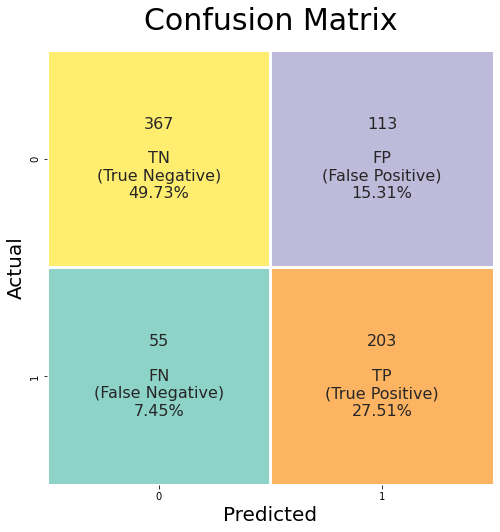

In [318]:
ConfusionMatrix(clf_ETC_pipe, X, y, 10)

# ROC curve:

In [319]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

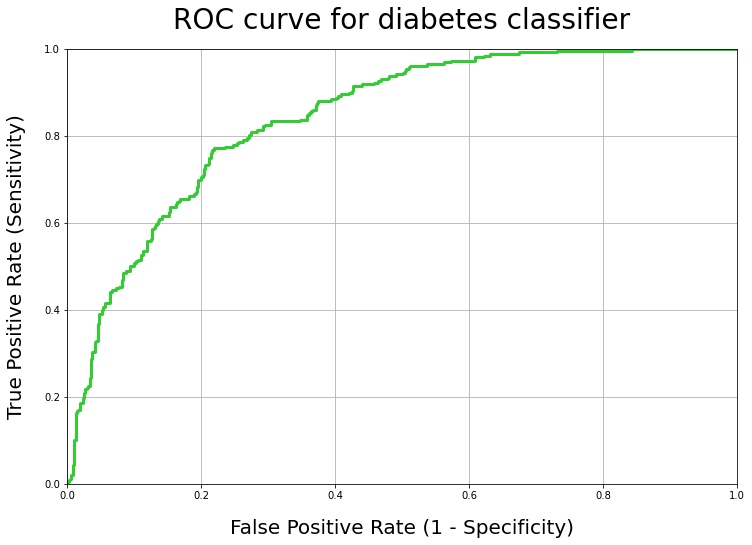

In [327]:
# calculating of The probability of the positive class (using cross_val_predict)

y_pred_prob = cross_val_predict(clf_ETC_pipe, X, y, cv=skf, method='predict_proba')[:, 1]

# roc_curve( y_valid, model.pred_proba(X_valid)[:, 1] )
 
fpr, tpr, thresholds = roc_curve( y, y_pred_prob )

# 1st array = False Positive Rate
# 2nd array = True Positive Rate
# 3rd array = threshold

plt.figure( figsize=(12,8) )

plt.plot(fpr, tpr, c='limegreen', linewidth=3)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title('ROC curve for diabetes classifier', fontsize=28, pad=20)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=20, labelpad=18)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=20, labelpad=18)
plt.grid(True)

# Testing New Data (Unseen Data)
* earlier we dropped **30** random rows from the original data set as **`X_test`**. the idea was not show these 30 row to the machine at any point during the project until the very end, to treat these 30 rows will be treated as completely new data.<br></br>
* the point is to see how ***`robust`*** our final model is and how well it will predict unseen data

In [328]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [330]:
clf_ETC_pipe.fit(X, y)
y_pred = clf_ETC_pipe.predict(X_test)

In [334]:
Test_Data_Eval = pd.DataFrame(
    {
        'accuracy': [accuracy_score(y_test, y_pred)],
        'precision': [precision_score(y_test, y_pred)],
        'recall': [recall_score(y_test, y_pred)],
        'f1': [f1_score(y_test, y_pred)],
        'roc_auc_score': [roc_auc_score(y_test, y_pred)]
    }
)

In [335]:
Test_Data_Eval

,accuracy,precision,recall,f1,roc_auc_score
0,0.766667,0.6,0.9,0.72,0.8


* as you can see the evaluation scores are pretty close the ones we measured during the project, hence our model is well **`Robust`**

# Confusion Matrix

In [337]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

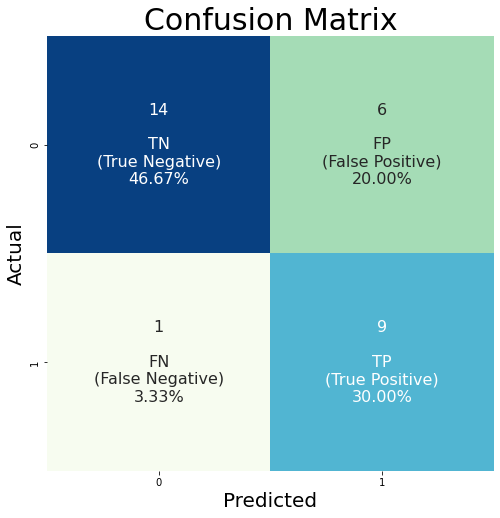

In [338]:
group_names_short = ["TN", "FP", "FN", "TP"]
group_names_long = ["(True Negative)", "(False Positive)", "(False Negative)", "(True Positive)"]

group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [ f'{v1}\n\n{v2}\n{v3}\n{v4}' for (v1, v2, v3, v4) in zip(group_counts, group_names_short,
                                                           group_names_long, group_percentages) ]
labels = np.asarray(labels).reshape(2, 2)

plt.figure( figsize=(8,8) )
sns.heatmap(cf_matrix, annot=labels, annot_kws={"size":16}, fmt='', cmap='GnBu', cbar=False)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title("Confusion Matrix", fontsize=30)
plt.show()

In [340]:
# Saving the Final pipeline as a joblib file
import joblib

In [341]:
# joblib.dump(Our Model, "name  of the project.joblib")

joblib.dump(clf_ETC_pipe, "Data Science -  Classification - Pima Indians Diabetes - (Vandad Saneinejad).joblib")

['Data Science -  Classification - Pima Indians Diabetes - (Vandad Saneinejad).joblib']